# Credit Default Payment Prediction Algorithm

## Executive Summary

> This project aims to build a state-of-the-art credit scoring and default prediction system for financial service providers with a stack of machine learning algorithms. Due to data source limits, the project is to conduct through the most recent machine learning techniques, starting from logistic regression, decision tree, random forest and gradient boosting machine.

In this project, the dataset is from Kaggle ([Link](https://www.kaggle.com/c/GiveMeSomeCredit)). The primary data is from individual credit card usage behaviour. We would focus on logistic regression, decision tree, random forest models and gradient boosting machine with data about individuals' credit behaviour in this project.

## 1. Download the Dataset

- Install required libraries
- Download data from Kaggle
- View dataset files
- Load training set with Pandas
- Load test set with Pandas
- Imports

### Install Required Libraries

In [4]:
# install and import the libraries
!pip install opendatasets pandas numpy matplotlib plotly seaborn tqdm sklearn  --quiet

import pandas as pd
import numpy as np
import seaborn as sns 
import opendatasets as od
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

### Download Data from Kaggle

In [5]:
dataset_url = "https://www.kaggle.com/c/GiveMeSomeCredit/overview"

In [6]:
%%time
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: inkasaras
Your Kaggle Key: ··········


100%|██████████| 5.16M/5.16M [00:00<00:00, 40.5MB/s]


Extracting archive ./GiveMeSomeCredit/GiveMeSomeCredit.zip to ./GiveMeSomeCredit


CPU times: user 1.33 s, sys: 225 ms, total: 1.56 s
Wall time: 3min 28s


In [7]:
data_dir = './GiveMeSomeCredit'

In [8]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/joaopedrosdmm/credit-score


'https://jovian.ai/joaopedrosdmm/credit-score'

### Loading Data Set



In [9]:
import random
sample_frac = 1

In [10]:
selected_cols = "SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents".split(",")
print(selected_cols)

['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


In [11]:
def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_frac

In [12]:
random.seed(42)

In [13]:
df_train = pd.read_csv(data_dir + "/cs-training.csv", 
                       usecols=selected_cols, 
                       skiprows=skip_row)

In [14]:
df_test = pd.read_csv(data_dir + "/cs-test.csv", usecols=selected_cols)


### Imports

In [15]:
# Import our model and performance assessement classes from sklearn

# Model packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

# Metrics packages
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

## 2. Dataset Preparation
- Dataset Description
- Exploratory Data Analysis
- Data Cleaning

### Dataset Description

Let's first take a look at the Data Dictionary, which will give explanations for the data in each column:


- **SeriousDlqin2yrs** - Person experienced 90 days past due delinquency or worse

- **RevolvingUtilizationOfUnsecuredLines** - Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

- **Age** - Age of borrower in years

- **NumberOfTime30-59DaysPastDueNotWorse** - Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

- **DebtRatio** - Monthly debt payments, alimony,living costs divided by monthy gross income

- **MonthlyIncome** - Monthly income

- **NumberOfOpenCreditLinesAndLoans** - Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

- **NumberOfTimes90DaysLate** - Number of times borrower has been 90 days or more past due.

- **NumberRealEstateLoansOrLines** - Number of mortgage and real estate loans including home equity lines of credit

- **NumberOfTime60-89DaysPastDueNotWorse**- Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

- **NumberOfDependents** - Number of dependents in family excluding themselves (spouse, children etc.)



#### Variables

##### - The Dependent Variable

The dependent variable in our dataset is `SeriousDlqin2yrs`. i.e. the target of an individual experienced 90 days past due default or worse. It is a binary indicator with the value of 1 flagging a default event ( A person did not conduct debt payments over 90 days), 0 otherwise. 




##### - Independent Variables

On the other hand, input variables in the dataset are two types: basic information about borrowers' age, family, monthly income; credit cards use information such as credit lines, defaulting times within 60-89 days or 30-59 days but not worse (a person did not pay on the date but paid back with a specific time frame), a ratio of the sum of debt payments and living costs to monthly incomes.

### Exploratory Data Analysis


In [16]:
#Define matplot and sns params and 
#sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12, 6)

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [18]:
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [19]:
df_train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [20]:
df_train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

##### Outlier Analysis

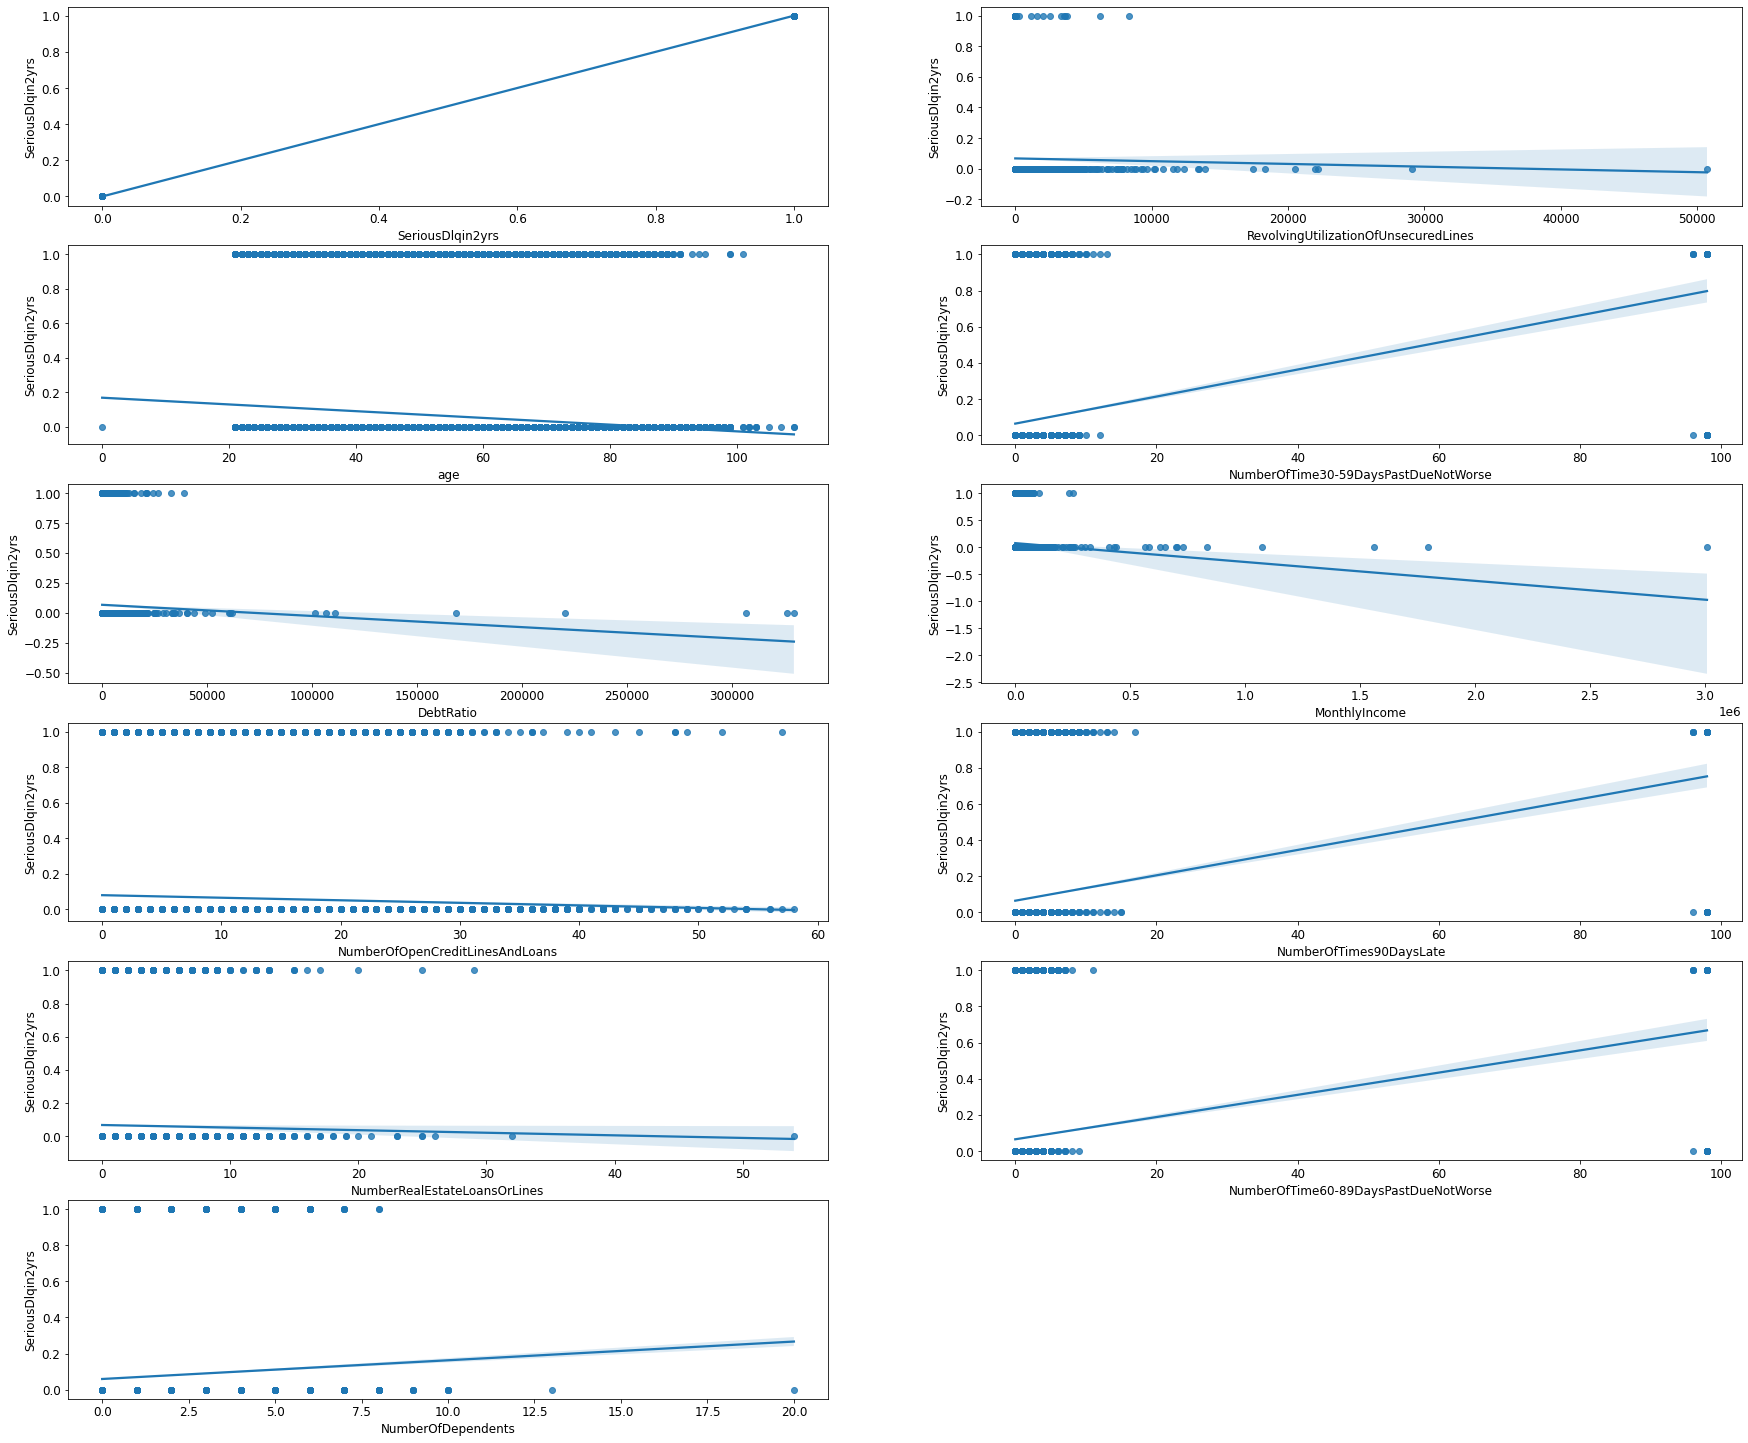

In [21]:
fig = plt.figure(figsize=[30,30])
for col,i in zip(df_train.columns,range(1,13)):
    axes = fig.add_subplot(7,2,i)
    sns.regplot(data=df_train, x=df_train[col], y=df_train["SeriousDlqin2yrs"],ax=axes)
plt.show()

From the above graphs we can observe:

- In the columns **NumberOfTime30-59DaysPastDueNotWorse** , **NumberOfTime60-89DaysPastDueNotWorse** and **NumberOfTimes90DaysLate**, we see an anomaly in ranges beyond 90 which is common across all 3 features.
- There are some unusually high values for **DebtRatio** and **RevolvingUtilizationOfUnsecuredLines**.

##### Balance of Classes

Proportion of People Who Defaulted: 0.06684


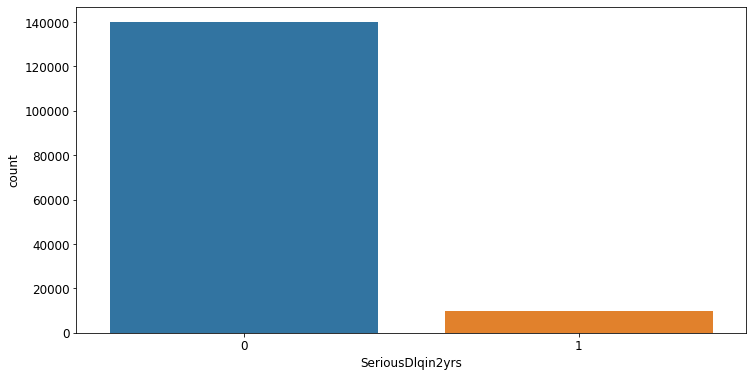

In [22]:
sns.countplot(x="SeriousDlqin2yrs", data=df_train)
print("Proportion of People Who Defaulted: {}".format(df_train["SeriousDlqin2yrs"].sum() / len(df_train)))

In [23]:
# Identifyng weight ratio of the train dataset
weight_ratio = float(len(df_train["SeriousDlqin2yrs"][df_train["SeriousDlqin2yrs"] == 0]))/float(len(df_train["SeriousDlqin2yrs"][df_train["SeriousDlqin2yrs"] == 1]))
print(weight_ratio)

13.961101137043686


We have an imbalanced dataset, in other words, since only about 7% of our data in the target column is a 1, if the model always guesses that the outcome is not a 1, it will be right 93% of the time. This might be troublesome for some of our models.

##### Null Values and Proportions

In [24]:
null_val_sums = df_train.isnull().sum()
pd.DataFrame({"Column": null_val_sums.index, "Number of Null Values": null_val_sums.values,
             "Proportion": null_val_sums.values / len(df_train) })

,Column,Number of Null Values,Proportion
0,SeriousDlqin2yrs,0,0.000000
1,RevolvingUtilizationOfUnsecuredLines,0,0.000000
2,age,0,0.000000
3,NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
4,DebtRatio,0,0.000000
5,MonthlyIncome,29731,0.198207
6,NumberOfOpenCreditLinesAndLoans,0,0.000000
7,NumberOfTimes90DaysLate,0,0.000000
8,NumberRealEstateLoansOrLines,0,0.000000
9,NumberOfTime60-89DaysPastDueNotWorse,0,0.000000


Our models are not able to work with missing numerical data. Therefore we have to use imputation to fill in missing values, we will do this in the Data Cleaning Section.

##### RevolvingUtilizationOfUnsecuredLines

In [25]:
df_train["RevolvingUtilizationOfUnsecuredLines"].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

We can see a massive difference between the 75th Quantile and the Max Value.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


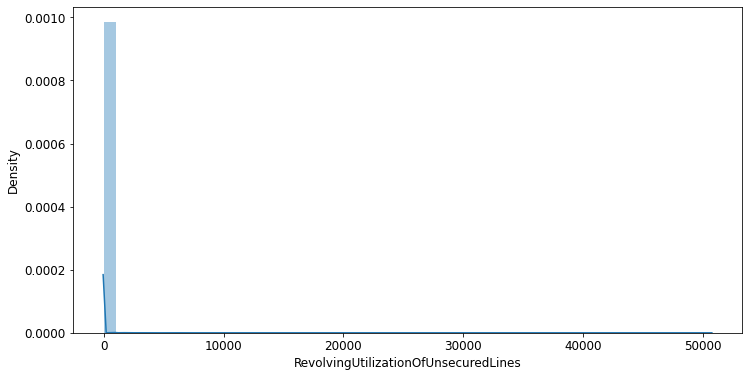

In [26]:
sns.distplot(df_train["RevolvingUtilizationOfUnsecuredLines"])

In [27]:
default_prop = []
for i in range(int(df_train["RevolvingUtilizationOfUnsecuredLines"].max())):
    temp_ = df_train.loc[df_train["RevolvingUtilizationOfUnsecuredLines"] >= i]
    default_prop.append([i, temp_["SeriousDlqin2yrs"].mean()])

Text(0.5, 1.0, 'Proportion of Defaulters As Minimum Revolving Utilization Of Unsecured Lines Increases')

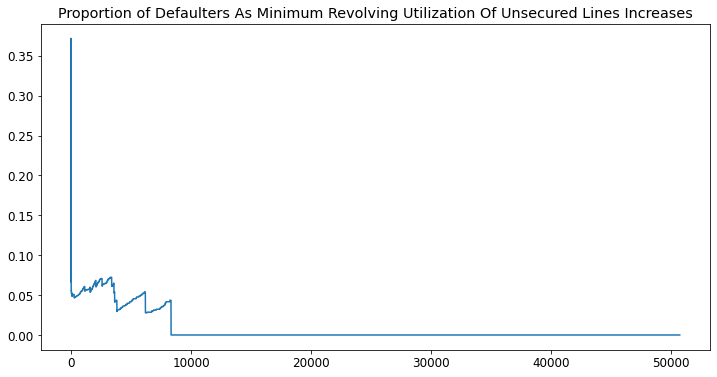

In [28]:
sns.lineplot(x=[i[0] for i in default_prop], y=[i[1] for i in default_prop])
plt.title("Proportion of Defaulters As Minimum Revolving Utilization Of Unsecured Lines Increases")

In [29]:
print("Proportion of Defaulters with Total Amount of Money Owed Not Exceeding Total Credit Limit: {}"\
     .format(df_train.loc[(df_train["RevolvingUtilizationOfUnsecuredLines"] >= 0) & (df_train["RevolvingUtilizationOfUnsecuredLines"] <= 1)]["SeriousDlqin2yrs"].mean()))

Proportion of Defaulters with Total Amount of Money Owed Not Exceeding Total Credit Limit: 0.05991996127598361


In [30]:
print("Proportion of Defaulters with Total Amount of Money Owed Not Exceeding or Equal to 13 times of Total Credit Limit:\n{}"\
     .format(df_train.loc[(df_train["RevolvingUtilizationOfUnsecuredLines"] >= 0) & (df_train["RevolvingUtilizationOfUnsecuredLines"] < 13)]["SeriousDlqin2yrs"].mean()))

Proportion of Defaulters with Total Amount of Money Owed Not Exceeding or Equal to 13 times of Total Credit Limit:
0.06685273968029273


This field basically represents the ratio of the amount owed by the credit limit of a customer. A ratio higher than 1 is considered to be a serious defaulter. A Ratio of 10 functionally also seems possible, let's see how many of these customers have the Revolving Utilization of Unsecured Lines greater than 10.

In [31]:
df_train[df_train['RevolvingUtilizationOfUnsecuredLines']>10].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,241.000000,241.000000,241.000000,241.000000,241.000000,173.00000,241.000000,241.000000,241.000000,241.000000,228.000000
mean,0.070539,3564.023932,50.630705,0.186722,571.918644,8467.67052,5.763485,0.074689,1.186722,0.087137,0.688596
std,0.256587,5123.802683,14.565389,0.579502,1772.948412,6564.06825,3.114160,0.579711,1.065750,0.559651,1.038659
min,0.000000,11.385230,24.000000,0.000000,0.000800,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,941.000000,39.000000,0.000000,0.217813,4500.00000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2012.000000,48.000000,0.000000,0.402560,7000.00000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,4116.000000,62.000000,0.000000,59.000000,10091.00000,7.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.00000,21.000000,8.000000,9.000000,7.000000,4.000000


Here if you see the difference between the 50th and 75 quantile for Revolving Utilization of Unsecured Lines, you'll observe that there is a massive increase from 13 to 1891.25. Since 13 seems like a reasonable ratio too (but way too high), let's check how many of these counts lie above 13.

In [32]:
df_train[df_train['RevolvingUtilizationOfUnsecuredLines']>13].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,238.000000,238.000000,238.000000,238.000000,238.000000,170.000000,238.000000,238.000000,238.000000,238.000000,225.000000
mean,0.058824,3608.797826,50.634454,0.163866,579.117900,8520.041176,5.689076,0.071429,1.176471,0.071429,0.693333
std,0.235790,5140.423232,14.617658,0.522123,1782.962163,6606.889618,3.032170,0.580214,1.064558,0.542637,1.043346
min,0.000000,14.000000,24.000000,0.000000,0.000800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,951.000000,39.000000,0.000000,0.216587,4608.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2023.500000,48.000000,0.000000,0.391176,7000.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,4128.750000,62.000000,0.000000,82.250000,10178.750000,7.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.000000,21.000000,8.000000,9.000000,7.000000,4.000000


Despite owing thousands, these 238 people do not show any default which means this might be another error. Even if it is not an error, these numbers will add huge bias and variance to our final predictions. Therefore, the best decision is to remove these values.

##### Late Payment Columns

- NumberOfTimes90DaysLate
- NumberOfTime60-89DaysPastDueNotWorse
- NumberOfTime30-59DaysPastDueNotWorse

In [33]:
late_pay_cols = ["NumberOfTimes90DaysLate", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfTime30-59DaysPastDueNotWorse"]

In [34]:
df_train["NumberOfTimes90DaysLate"].value_counts().sort_index()

0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64

In [35]:
df_train["NumberOfTime60-89DaysPastDueNotWorse"].value_counts().sort_index()

0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [36]:
df_train["NumberOfTime30-59DaysPastDueNotWorse"].value_counts().sort_index()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [37]:
df_train.loc[df_train["NumberOfTimes90DaysLate"] > 17][late_pay_cols].describe()

,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTime30-59DaysPastDueNotWorse
count,269.000000,269.000000,269.000000
mean,97.962825,97.962825,97.962825
std,0.270628,0.270628,0.270628
min,96.000000,96.000000,96.000000
25%,98.000000,98.000000,98.000000
50%,98.000000,98.000000,98.000000
75%,98.000000,98.000000,98.000000
max,98.000000,98.000000,98.000000


In [38]:
distinct_triples_counts = dict()
for arr in df_train.loc[df_train["NumberOfTimes90DaysLate"] > 17][late_pay_cols].values:
    triple = ",".join(list(map(str, arr)))
    if triple not in distinct_triples_counts:
        distinct_triples_counts[triple] = 0
    else:
        distinct_triples_counts[triple] += 1
distinct_triples_counts

{'96,96,96': 4, '98,98,98': 263}

In [39]:
print("Unique values in '30-59 Days' values that are more than or equal to 90:",np.unique(df_train[df_train['NumberOfTime30-59DaysPastDueNotWorse']>=90]
                                                                                          ['NumberOfTime30-59DaysPastDueNotWorse']))


print("Unique values in '60-89 Days' when '30-59 Days' values are more than or equal to 90:",np.unique(df_train[df_train['NumberOfTime30-59DaysPastDueNotWorse']>=90]
                                                                                                       ['NumberOfTime60-89DaysPastDueNotWorse']))


print("Unique values in '90 Days' when '30-59 Days' values are more than or equal to 90:",np.unique(df_train[df_train['NumberOfTime30-59DaysPastDueNotWorse']>=90]
                                                                                                    ['NumberOfTimes90DaysLate']))


print("Unique values in '60-89 Days' when '30-59 Days' values are less than 90:",np.unique(df_train[df_train['NumberOfTime30-59DaysPastDueNotWorse']<90]
                                                                                           ['NumberOfTime60-89DaysPastDueNotWorse']))


print("Unique values in '90 Days' when '30-59 Days' values are less than 90:",np.unique(df_train[df_train['NumberOfTime30-59DaysPastDueNotWorse']<90]
                                                                                        ['NumberOfTimes90DaysLate']))


print("Proportion of positive class with special 96/98 values:",
      round(df_train[df_train['NumberOfTime30-59DaysPastDueNotWorse']>=90]['SeriousDlqin2yrs'].sum()*100/
      len(df_train[df_train['NumberOfTime30-59DaysPastDueNotWorse']>=90]['SeriousDlqin2yrs']),2),'%')

Unique values in '30-59 Days' values that are more than or equal to 90: [96 98]
Unique values in '60-89 Days' when '30-59 Days' values are more than or equal to 90: [96 98]
Unique values in '90 Days' when '30-59 Days' values are more than or equal to 90: [96 98]
Unique values in '60-89 Days' when '30-59 Days' values are less than 90: [ 0  1  2  3  4  5  6  7  8  9 11]
Unique values in '90 Days' when '30-59 Days' values are less than 90: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17]
Proportion of positive class with special 96/98 values: 54.65 %


We can see from the following that when records in column 'NumberOfTime30-59DaysPastDueNotWorse' are more than 90, the other columns that records number of times payments are past due X days also have the same values. We will classify these as special labels since the proportion of positive class is abnormally high at 54.65%.

These 96 and 98 values can be viewed as accounting errors. Hence, we would replace them with the maximum value before 96 i.e. 13, 11 and 17.

##### DebtRatio

In [40]:
df_train["DebtRatio"].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

We can see a massive difference between the 75th Quantile and the Max Value.

In [41]:
quantiles = [0.75,0.8,0.81,0.85,0.9,0.95,0.975,0.99]

for i in quantiles:
    print(i*100,'% quantile of debt ratio is: ',df_train.DebtRatio.quantile(i))

75.0 % quantile of debt ratio is:  0.86825377325
80.0 % quantile of debt ratio is:  4.0
81.0 % quantile of debt ratio is:  14.0
85.0 % quantile of debt ratio is:  269.1499999999942
90.0 % quantile of debt ratio is:  1267.0
95.0 % quantile of debt ratio is:  2449.0
97.5 % quantile of debt ratio is:  3489.024999999994
99.0 % quantile of debt ratio is:  4979.040000000037


There is a huge rise in quantile post 81%. So, our main aim would be to check the potential outliers beyond 81% quantiles. However, since our data is 150,000, let's consider 95% and 97.5% quantiles for our further analysis.

In [42]:
df_train[df_train['DebtRatio'] >= df_train['DebtRatio'].quantile(0.95)][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,7501.000000,379.000000
mean,0.055193,0.084433
std,0.228371,0.278403
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


Here we can observe:

- Out of 7501 customers who have debt ratio greater than 95% i.e. the number of times their debt is higher than their income, only 379 have Monthly Income values.
- The Max for Monthly Income is 1 and Min is 0 which makes us wonder that are data entry errors. Let's check whether the Serious Delinquency in 2 years and Monthly Income values are equal.

In [43]:
df_train[(df_train["DebtRatio"] > df_train["DebtRatio"].quantile(0.95)) & (df_train['SeriousDlqin2yrs'] == df_train['MonthlyIncome'])].count()

SeriousDlqin2yrs                        331
RevolvingUtilizationOfUnsecuredLines    331
age                                     331
NumberOfTime30-59DaysPastDueNotWorse    331
DebtRatio                               331
MonthlyIncome                           331
NumberOfOpenCreditLinesAndLoans         331
NumberOfTimes90DaysLate                 331
NumberRealEstateLoansOrLines            331
NumberOfTime60-89DaysPastDueNotWorse    331
NumberOfDependents                      331
dtype: int64

There are 331 out of 379 rows where Monthly Income is equal to the Serious Delinquencies in 2 years. Hence we will remove these 331 outliers from our analysis as their current values aren't useful for our predictive modelling and will add to the bias and variance.

##### MonthlyIncome

In [44]:
df_train["MonthlyIncome"].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

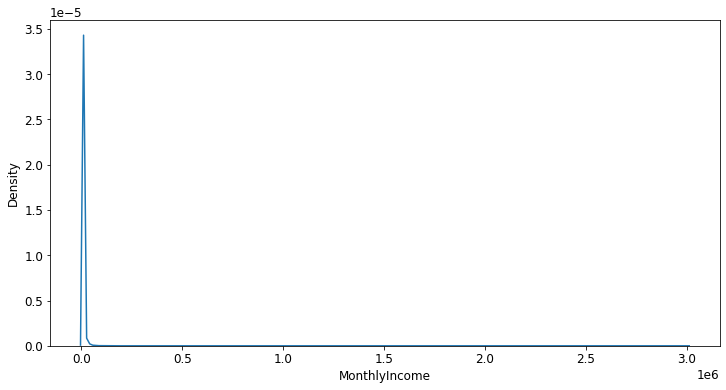

In [45]:
sns.kdeplot(df_train["MonthlyIncome"].dropna())

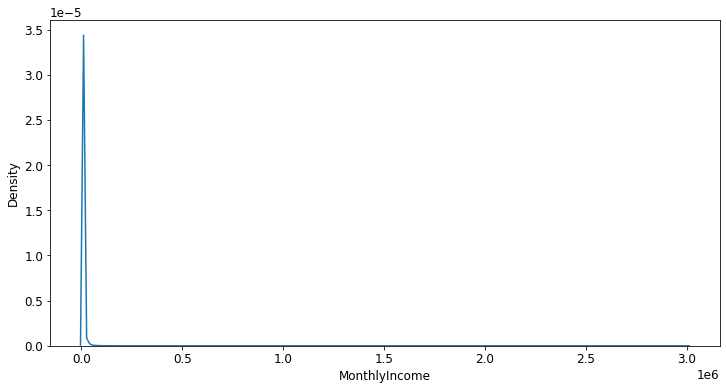

In [46]:
sns.kdeplot(df_train.loc[df_train["DebtRatio"] <= df_train["DebtRatio"].quantile(0.975)]["MonthlyIncome"].dropna())

Text(11.5, 450, '$\\mu$=8.41')

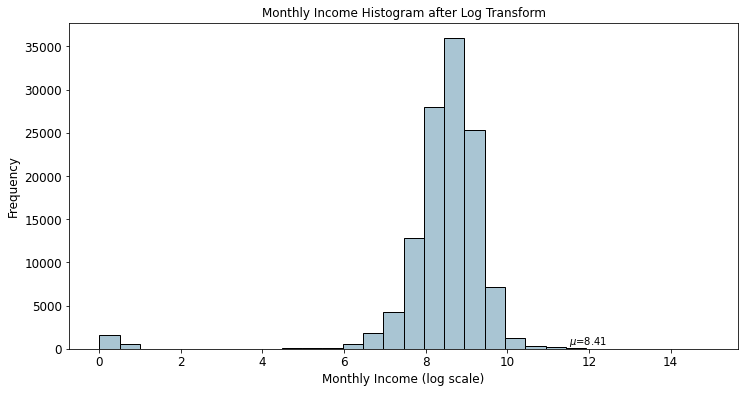

In [47]:
income_log = np.log((1+df_train['MonthlyIncome']))

income_log_mean = np.round(np.mean(income_log),2)

fig,ax = plt.subplots()
income_log.hist(bins=30,color='#A9C5D3',edgecolor='black',grid=False)

ax.set_title('Monthly Income Histogram after Log Transform', 
             fontsize=12)
#plt.axvline(income_log_mean, color='r')
ax.set_xlabel('Monthly Income (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

##### Age

In [48]:
df_train["age"].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

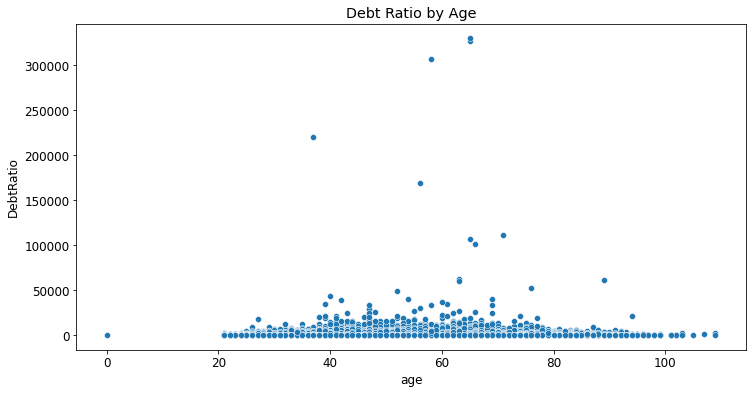

In [49]:
fig = plt.title('Debt Ratio by Age')
sns.scatterplot(x='age', y='DebtRatio', data=df_train);

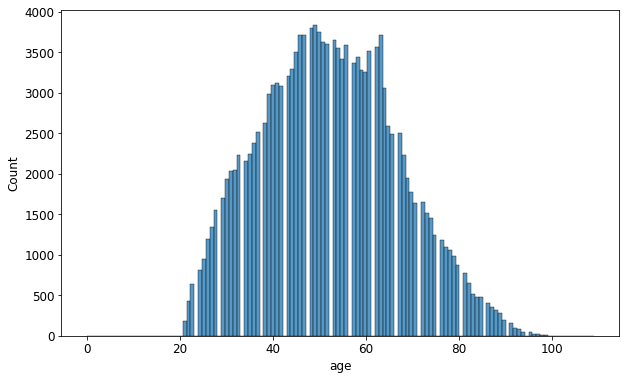

In [50]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(df_train["age"])

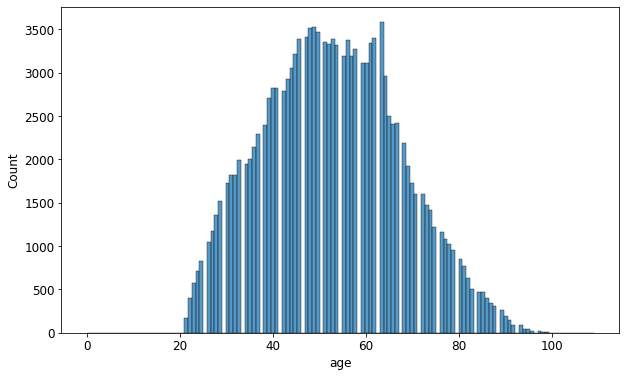

In [51]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(df_train.loc[df_train["SeriousDlqin2yrs"] == 0]["age"])

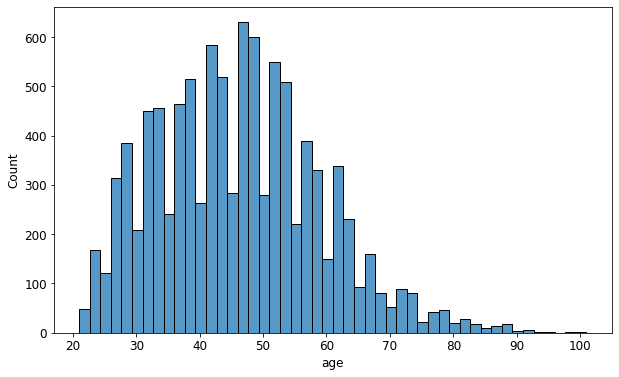

In [52]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(df_train.loc[df_train["SeriousDlqin2yrs"] == 1]["age"])

##### NumberOfOpenCreditLinesAndLoans

In [53]:
df_train["NumberOfOpenCreditLinesAndLoans"].describe()

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

In [54]:
df_train["NumberOfOpenCreditLinesAndLoans"].value_counts()

6     13614
7     13245
5     12931
8     12562
4     11609
9     11355
10     9624
3      9058
11     8321
12     7005
2      6666
13     5667
14     4546
1      4438
15     3645
16     3000
17     2370
0      1888
18     1874
19     1433
20     1169
21      864
22      685
23      533
24      422
25      337
26      239
27      194
28      150
29      114
30       88
31       74
32       52
33       47
34       35
35       27
36       18
38       13
40       10
39        9
42        8
45        8
43        8
37        7
48        6
49        4
54        4
41        4
52        3
46        3
57        2
51        2
56        2
47        2
50        2
44        2
58        1
53        1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

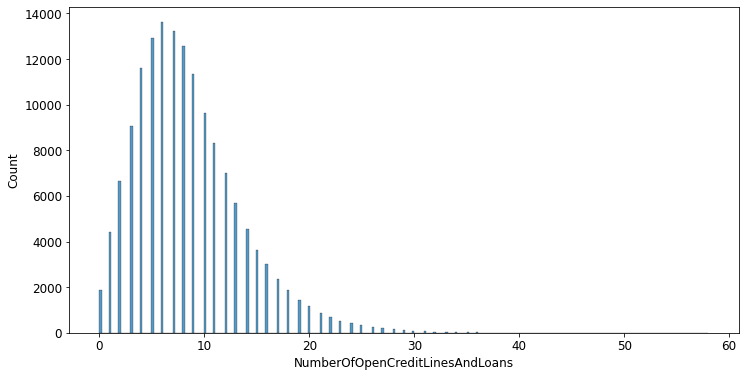

In [55]:
sns.histplot(df_train["NumberOfOpenCreditLinesAndLoans"])

##### NumberRealEstateLoansOrLines

In [56]:
df_train["NumberRealEstateLoansOrLines"].describe()

count    150000.000000
mean          1.018240
std           1.129771
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

In [57]:
df_train["NumberRealEstateLoansOrLines"].value_counts()

0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
15        7
14        7
17        4
16        4
25        3
18        2
23        2
19        2
20        2
26        1
54        1
21        1
29        1
32        1
Name: NumberRealEstateLoansOrLines, dtype: int64

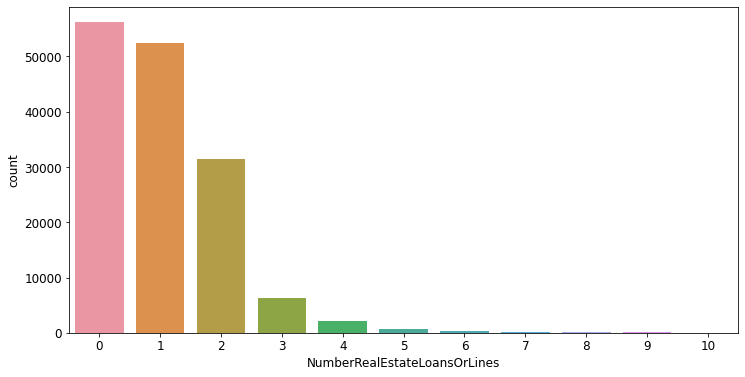

In [58]:
sns.countplot(x="NumberRealEstateLoansOrLines", data=df_train.loc[df_train["NumberRealEstateLoansOrLines"] <= 10])

In [59]:
df_train.loc[df_train["NumberRealEstateLoansOrLines"] > 13]["SeriousDlqin2yrs"].describe()

count    38.000000
mean      0.210526
std       0.413155
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: SeriousDlqin2yrs, dtype: float64

##### NumberOfDependents

In [60]:
df_train["NumberOfDependents"].describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [61]:
df_train["NumberOfDependents"].value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: NumberOfDependents, dtype: int64

In [62]:
df_train.loc[df_train["NumberOfDependents"] <= 10]["SeriousDlqin2yrs"].describe()

count    146074.000000
mean          0.067411
std           0.250733
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SeriousDlqin2yrs, dtype: float64

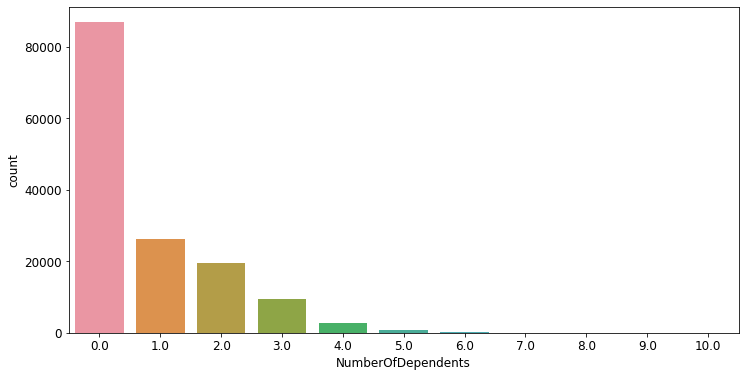

In [63]:
sns.countplot(x="NumberOfDependents", data=df_train.loc[df_train["NumberOfDependents"] <= 10])

##### Correlation Matrix

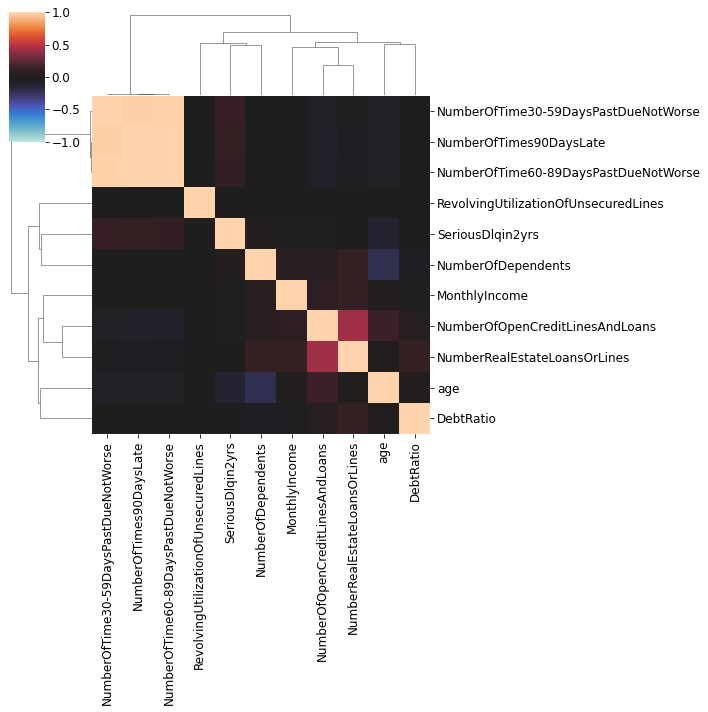

In [64]:
def corrplot(df, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        df.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )

corrplot(df_train, annot=None)

##### Observations

- Around 7% of samples defaulted
- MonthlyIncome and NumberOfDependents have 29731 (19.82%) and 3924 (2.61%) null values respectively
- We also notice that when NumberOfTimes90DaysLate has values above 17, there are 267 instances where the three columns NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTime30-59DaysPastDueNotWorse share the same values, specifically 96 and 98.
    - We can see that sharing the same values of 96 and 98 respectively is not logical since trivial calculations can reveal that being 30 days past due for 96 times for a single person within a timespan of 2 years is not possible.
- RevolvingUtilizationOfUnsecuredLines
    - Defined as ratio of the total amount of money owed to total credit limit
    - Distribution of values is right-skewed, consider removing outliers
    - It is expected that as this value increases, the proportion of people defaulting should increase as well
    - However, we can see that as the minimum value of this column is set to 13, the proportion of defaulters is smaller than that belonging to the pool of clients with total amount of money owed not exceeding total credit limit.
    - Thus we should remove those samples with RevolvingUtilizationOfUnsecuredLines's value more than equal to 13
- Age
    - There seems to be more younger people defaulting and the distribution seems fine on the whole
- NumberOfTimes90DaysLate
    - It is interesting to note that there are no one who is 90 or more days past due between 17 and 96 times.
    - Has a medium to high correlation with defaults
- NumberOfTime60-89DaysPastDueNotWorse
    - It is interesting to note that there are no one who is 60-89 days past due between 11 and 96 times.
    - Has a medium to high correlation with defaults
- NumberOfTime30-59DaysPastDueNotWorse
    - It is interesting to note that there are no one who is 30-59 days past due between 13 and 96 times.
    - Has a medium to high correlation with defaults
- DebtRatio
    - 2.5% of clients owe around 3490 or more times what they own
    - For the people who have monthly income in this 5%, only 379 people have values for their monthly incomes and the values are either 0 or 1.
    - There are 331 out of 379 rows where Monthly Income is equal to the Serious Delinquencies, 0 or 1, in the majority of the cases.
- MonthlyIncome
    - Distribution of values is skewed, we can consider imputation with median.
    - We can also consider imputing with normally distributed values with its mean and standard deviation.
- Numberof Dependents
    - We can consider imputing with its mode, which is zero.

In [65]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/joaopedrosdmm/credit-score


'https://jovian.ai/joaopedrosdmm/credit-score'

### Data Cleaning

In [66]:
#Seletct input and target cols that will be used in our model
input_cols = ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 
              'age', 'MonthlyIncome', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', 'NumberOfDependents']

target_col = 'SeriousDlqin2yrs'

In [67]:
print("Correlation with SeriousDlqin2yrs:\n")
print(df_train[input_cols].corrwith(df_train["SeriousDlqin2yrs"]))

Correlation with SeriousDlqin2yrs:

RevolvingUtilizationOfUnsecuredLines   -0.001802
NumberOfTime30-59DaysPastDueNotWorse    0.125587
NumberOfTimes90DaysLate                 0.117175
NumberOfTime60-89DaysPastDueNotWorse    0.102261
age                                    -0.115386
MonthlyIncome                          -0.019746
DebtRatio                              -0.007602
NumberOfOpenCreditLinesAndLoans        -0.029669
NumberRealEstateLoansOrLines           -0.007038
NumberOfDependents                      0.046048
dtype: float64


##### Baseline Score

In [68]:
from sklearn.model_selection import cross_val_score

# Function to help us score our diferent arrangement of features
def score_dataset(X, y, model=XGBClassifier(n_jobs=-1, random_state = 42, eval_metric="auc", scale_pos_weight=13.9)):
    # AUC
    score = cross_val_score(model, X, y, cv=5, scoring="roc_auc")
    score = score.mean()

    return score

In [69]:
#Define X and y
X = df_train.copy()
y = X.pop('SeriousDlqin2yrs')

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

#Baseline score to judge our feature engineering against.
baseline_score = score_dataset(X_scaled, y)
print(f"Baseline score: {baseline_score:.5f} AUC")

Baseline score: 0.86491 AUC


##### Remove Outliers and Invalid Data

- Set NumberOfTimes90DaysLate => 90 equal to 17.
- Set NumberOfTime60-89DaysPastDueNotWorse  => 90 equal to 11.
- Set NumberOfTime30-59DaysPastDueNotWorse => 90 equal to 13.
- Remove samples with values of DebtRatio above its 95 percentile and with label equal to monthly income.
- Set RevolvingUtilizationOfUnsecuredLines <= 13

Set Late Payments higher than 90 to a new value.

In [70]:
df_train.loc[df_train['NumberOfTime30-59DaysPastDueNotWorse'] >= 90, 'NumberOfTime30-59DaysPastDueNotWorse'] = 13
df_train.loc[df_train['NumberOfTime60-89DaysPastDueNotWorse'] >= 90, 'NumberOfTime60-89DaysPastDueNotWorse'] = 11
df_train.loc[df_train['NumberOfTimes90DaysLate'] >= 90, 'NumberOfTimes90DaysLate'] = 17

Since, these values exist in Test Set as well. Therefore, replacing them with maximum values before 96 and 98 i.e. 19, 9 and 18.

In [71]:
#df_test.loc[df_test['NumberOfTime30-59DaysPastDueNotWorse'] >= 90, 'NumberOfTime30-59DaysPastDueNotWorse'] = 19
#df_test.loc[df_test['NumberOfTime60-89DaysPastDueNotWorse'] >= 90, 'NumberOfTime60-89DaysPastDueNotWorse'] = 9
#df_test.loc[df_test['NumberOfTimes90DaysLate'] >= 90, 'NumberOfTimes90DaysLate'] = 18

Remove DebtRatio 95% quantile when SeriousDlqin2yrs equals MonthlyIncome

In [72]:
df_train = df_train.loc[(df_train["DebtRatio"] <= df_train["DebtRatio"].quantile(0.985)) | (df_train['SeriousDlqin2yrs'] != df_train['MonthlyIncome'])]

In [73]:
#df_test = df_test.loc[(df_test["DebtRatio"] <= df_test["DebtRatio"].quantile(0.95)) | (df_test['SeriousDlqin2yrs'] != df_test['MonthlyIncome'])]

Remove RevolvingUtilizationOfUnsecuredLines higher than 13

In [74]:
df_train = df_train.loc[df_train['RevolvingUtilizationOfUnsecuredLines']<=13]

In [75]:
#df_test = df_test[df_test['RevolvingUtilizationOfUnsecuredLines']<=13]

Reset index so we don't have some weird stuff happening later on.

In [76]:
df_train = df_train.reset_index(drop=True)

In [77]:
df_test= df_test.reset_index(drop=True)

In [78]:
df_train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149656.000000,149656.000000,149656.000000,149656.000000,149656.000000,1.199930e+05,149656.000000,149656.000000,149656.000000,149656.000000,145745.000000
mean,0.066887,0.322951,52.299427,0.268810,347.400364,6.673493e+03,8.455625,0.120924,1.017340,0.084447,0.756952
std,0.249827,0.370451,14.774421,0.882102,2019.453829,1.439754e+04,5.147170,0.865058,1.129573,0.568332,1.114892
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029779,41.000000,0.000000,0.174824,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153473,52.000000,0.000000,0.366165,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.555893,63.000000,0.000000,0.863914,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,12.462747,109.000000,13.000000,329664.000000,3.008750e+06,58.000000,17.000000,54.000000,11.000000,20.000000


##### Imputation


- Impute NumberOfDependents with its mode.
- Impute MonthlyIncome with its median.

We choose to replace the `NumberOfDependents` missing values with the mode, which is the most frequently occuring value in the column.

In [79]:
# Assign median, mode values
mode_NumberOfDependents_train_val = df_train['NumberOfDependents'].mode()[0]
mode_NumberOfDependents_test = df_test['NumberOfDependents'].mode()[0]

# Replace missing values
df_train['NumberOfDependents'].fillna(int(mode_NumberOfDependents_train_val),inplace=True)
df_test['NumberOfDependents'].fillna(int(mode_NumberOfDependents_test),inplace=True)

We will use the mean value of `MonthlyIncome` to impute the missing values.

In [80]:
# Assign median, mode values
median_MonthlyIncome_train_val = df_train['NumberOfDependents'].median()
median_MonthlyIncome_test = df_test['NumberOfDependents'].median()

# Replace missing values
df_train['MonthlyIncome'].fillna(int(median_MonthlyIncome_train_val),inplace=True)
df_test['MonthlyIncome'].fillna(int(median_MonthlyIncome_test),inplace=True)

In [81]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149656 entries, 0 to 149655
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149656 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149656 non-null  float64
 2   age                                   149656 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149656 non-null  int64  
 4   DebtRatio                             149656 non-null  float64
 5   MonthlyIncome                         149656 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149656 non-null  int64  
 7   NumberOfTimes90DaysLate               149656 non-null  int64  
 8   NumberRealEstateLoansOrLines          149656 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149656 non-null  int64  
 10  NumberOfDependents                    149656 non-null  float64
dtype

## 3. Feature Engineering

In [82]:
X = df_train.copy()
y = X.pop(target_col)

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [83]:
#Baseline score to judge our feature engineering against after first outliner removal.
baseline_score = score_dataset(X_scaled, y)
print(f"Baseline score after first outliner removal: {baseline_score:.5f} AUC")

Baseline score after first outliner removal: 0.86505 AUC


#### Mutual Information

In [84]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [85]:
mi_scores = make_mi_scores(X_scaled, y, discrete_features=False)

In [86]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

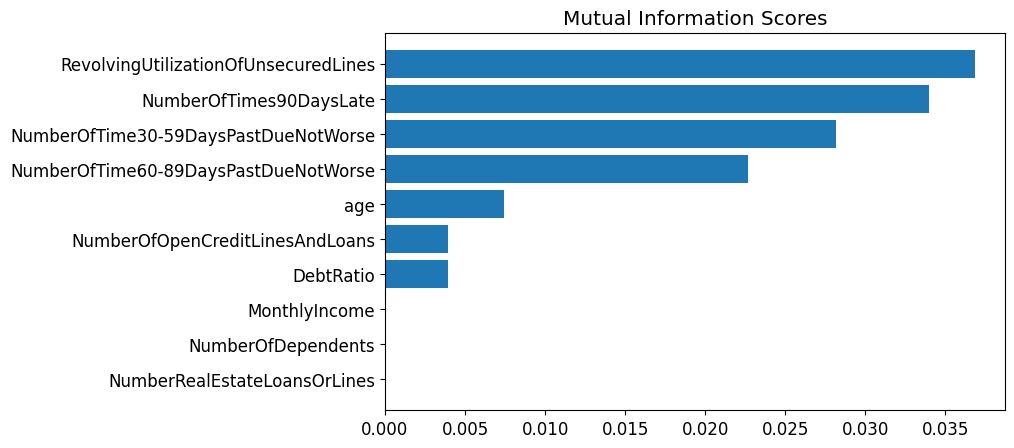

In [87]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

#### PCA

In [88]:
#Import PCA
from sklearn.decomposition import PCA

#Function that apply PCA
def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings

In [89]:
# Use `apply_pca` for the train
pca, X_pca, loadings = apply_pca(X)

# Dataframe with merger of df_train and X_pca
df_train_PCA = pd.concat([df_train, X_pca], axis=1)

In [90]:
# Use `apply_pca` for the test 
X_test = df_test[input_cols].copy()

# USe `apply_pca` for the test data-frame
pca_test, X_pca_test, loadings_test = apply_pca(X_test)

# Dataframe with merger of df_test and X_pca
df_test_PCA = pd.concat([df_test, X_pca_test], axis=1)

In [91]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)

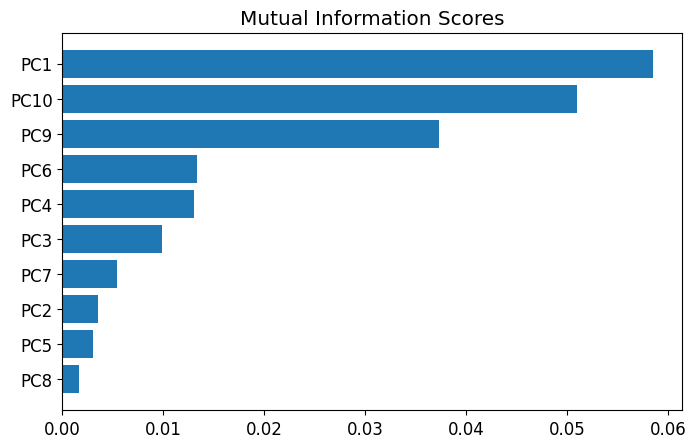

In [92]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

######  Interpret Component Loadings

In [93]:
print(loadings)

                                           PC1       PC2       PC3       PC4  \
RevolvingUtilizationOfUnsecuredLines  0.273035 -0.152403  0.385121  0.210660   
age                                  -0.164616  0.145698 -0.602831 -0.208187   
NumberOfTime30-59DaysPastDueNotWorse  0.509753  0.185770 -0.088919 -0.015380   
DebtRatio                            -0.024520  0.141968 -0.140566  0.769854   
MonthlyIncome                        -0.030050  0.267868  0.219399 -0.530813   
NumberOfOpenCreditLinesAndLoans      -0.131508  0.619564 -0.043636  0.014105   
NumberOfTimes90DaysLate               0.551183  0.082170 -0.155146 -0.054185   
NumberRealEstateLoansOrLines         -0.092261  0.620743  0.110985  0.173237   
NumberOfTime60-89DaysPastDueNotWorse  0.552754  0.122038 -0.165117 -0.057651   
NumberOfDependents                    0.043073  0.195705  0.588999 -0.033719   

                                           PC5       PC6       PC7       PC8  \
RevolvingUtilizationOfUnsecuredLines  0

PC1, PC9, PC10 are the PCA we want to analyze, since they are the most informative:

- PC1: Seems to be a mix of all NumberOfTimesLate cols and RevolvingUtilizationOfUnsecuredLines col with a slighly less weight

- PC9: NumberOfTime30-59DaysPastDueNotWorse

- PC10: NumberOfTimes90DaysLate 

From PC9 and PC10 we get the feeling that NumberOfTime30-59DaysPastDueNotWorse and NumberOfTimes90DaysLate are the most important cols from the set NumberOfTimesLate.

##### Variance

In [94]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

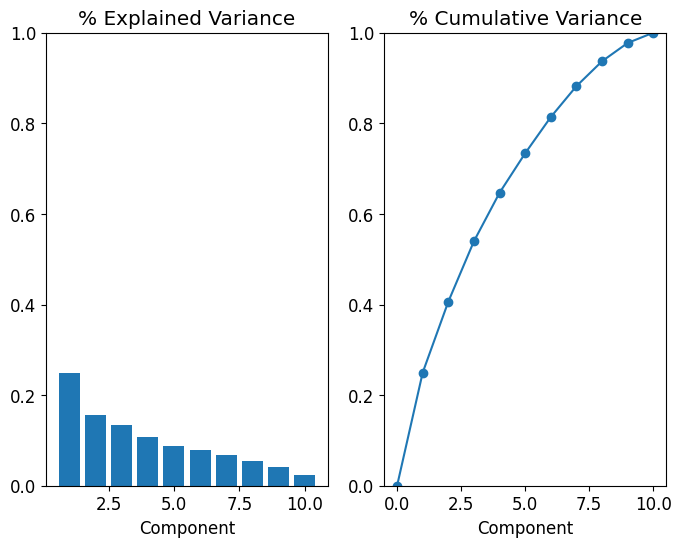

In [95]:
# Look at explained variance
plot_variance(pca);

###### Outliners

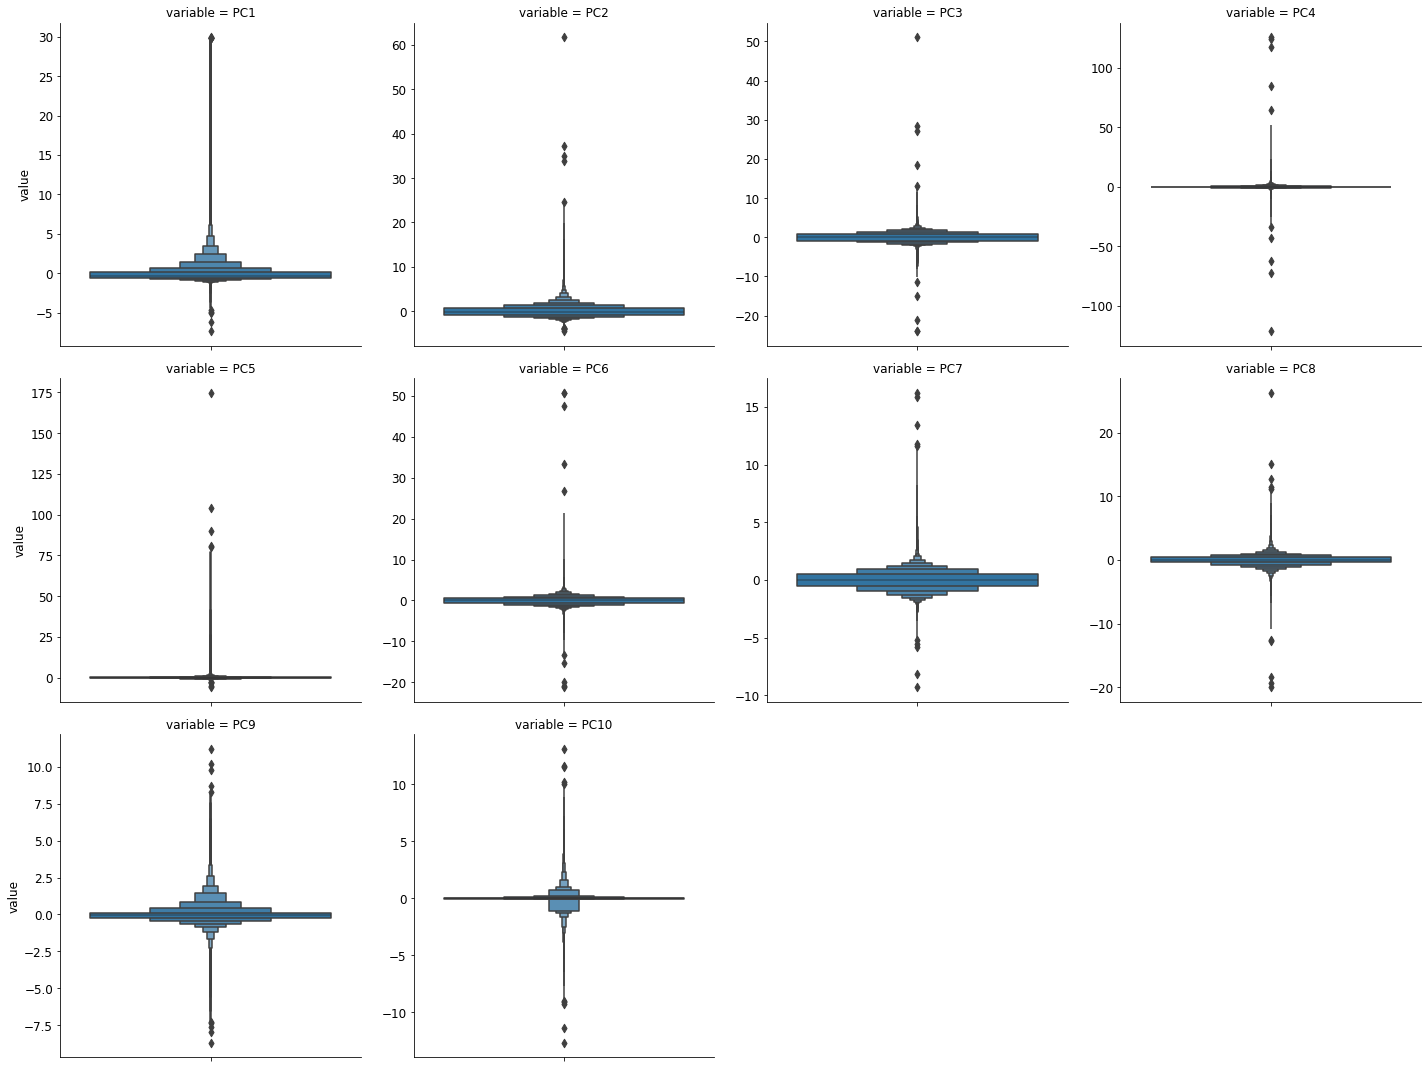

In [96]:
sns.catplot(
    y="value",
    col="variable",
    data=X_pca.melt(),
    kind='boxen',
    sharey=False,
    col_wrap=4
);

In [97]:
# Dataframe with merger of df_train and X_pca
df_r = df_train_PCA.copy()

In [98]:
# You can change PC1 to PC2, PC6, PC7, PC8, PC9
component = "PC1"

idx = X_pca[component].sort_values(ascending=False).index

df_r.loc[idx, [target_col] + input_cols]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,age,MonthlyIncome,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
96723,1,1.000000,13,17,11,27,2000.0,0.018491,0,0,3.0
36951,1,1.000000,13,17,11,25,3992.0,0.000000,0,0,2.0
136394,1,1.000000,13,17,11,33,2600.0,0.000000,0,0,4.0
79237,0,1.000000,13,17,11,27,1821.0,0.000000,0,0,2.0
143901,1,1.000000,13,17,11,31,2200.0,0.000000,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
36529,0,0.001782,0,0,0,65,0.0,326442.000000,6,1,0.0
60024,0,0.000000,0,0,0,65,0.0,329664.000000,9,3,0.0
136821,0,0.000000,0,0,0,68,1794060.0,0.002776,15,1,0.0
30526,0,0.003032,0,0,0,53,8000.0,5.967504,58,54,0.0


In [99]:
#Function to remove outliners
def remove_outliers(df):
    return df[(df['PC1'] >= -5) & 
              (df['PC1'] <= 30) & 
              (df['PC2'] <= 25) &
              (df['PC3'] >= -10) & 
              (df['PC3'] <= 10) & 
              (df['PC4'] >= -40) & 
              (df['PC4'] <= 50) &
              (df['PC5'] <= 75) & 
              (df['PC6'] >= -12.5) & 
              (df['PC6'] <= 20) &
              (df['PC7'] >= -5) & 
              (df['PC7'] <= 12) &
              (df['PC8'] >= -10) & 
              (df['PC8'] <= 10) &
              (df['PC9'] >= -7) & 
              (df['PC9'] <= 7.5) &
              (df['PC10'] >= -9) & 
              (df['PC10'] <= 10)]

In [100]:
# Dataframe with merger of df_train and X_pca
df_remove_outliner = df_train_PCA.copy()

In [101]:
#Remove outliners
df_remove_outliner = remove_outliers(df_remove_outliner)

In [102]:
# Reset Index to prevent errors when removing rows
df_remove_outliner = df_remove_outliner.reset_index(drop=True)

In [103]:
#Calculate the Score when outliners are removed
X = df_remove_outliner.copy()
y = X.pop(target_col)
#We have to make sure we use the same features as in the baseline score
X = X[input_cols]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

#Score for the removal of outliners identified in the PCA
score = score_dataset(X_scaled, y)
print(f"Score when outliners are removed: {score:.5f} AUC")

Score when outliners are removed: 0.86476 AUC


We see no improvement in the score when we remove outliners. For this reason we will not continue using this strategy.

#### Create New Features

In [104]:
#Creating New Features

def mathematical_transforms(df):
    X = pd.DataFrame()  # dataframe to hold new features

    # MonthlyIncomePerPerson: Monthly Income divided by the number of dependents
    X['MonthlyIncomePerPerson'] = df['MonthlyIncome'] / (df['NumberOfDependents'] + 1)

    # MonthlyDebt: Monthly Income multiplied by the Debt Ratio
    X['MonthlyDebt'] = df['MonthlyIncome'] * df['DebtRatio']
    
    # Monthly Income minus MonthlyDebt divided by the number of dependents
    X['MonthlyDebtPerPerson'] =  X['MonthlyDebt'] / (df['NumberOfDependents'] + 1) 

    # Monthly Income Log
    X["Income_log"] = np.log((1+df_train['MonthlyIncome']))

    # Difference between Number of Open Credit Lines and Loans and Number of Real Estate Lines and Loans
    X['RevolvingLines'] = df['NumberOfOpenCreditLinesAndLoans'] - df['NumberRealEstateLoansOrLines']

    # Monthly Debt by Revolving Lines
    X['RevolvingLinesbyMonthlyDebt'] = (X['RevolvingLines']) / (X['MonthlyDebt'] + 1) 

    # Monthly Debt by Revolving Lines
    X['MonthlyDebtbyRevolvingLines'] = (X['MonthlyDebt']) / (X['RevolvingLines'] + 1)

    # Monthly Debt by Revolving Lines
    X['MonthlyDebtPerPersonByRevolvingLines'] = (X['MonthlyDebtPerPerson']) / (X['RevolvingLines'] + 1)
    
    # Monthly Debt by Revolving Lines
    X['RevolvingLinesMonthlyByDebtPerPerson'] = (X['MonthlyDebtPerPerson']) / (X['RevolvingLines'] + 1)
    
    # Monthly Income divided by 1000.
    X['incomeDivByThousand'] = df['MonthlyIncome'] / 1000

    # Monthly Income minus MonthlyDebt
    X['MonthlyDelta'] = df['MonthlyIncome'] - X['MonthlyDebt']

    # Monthly Income minus MonthlyDebt divided by the number of dependents
    X['MonthlyDeltaPerPerson'] =  X['MonthlyDelta'] / (df['NumberOfDependents'] + 1) 

    # Monthly Delta per person by Revolving Lines
    X['MonthlyDeltaPerPersonbyRevolvingLines'] = X['MonthlyDeltaPerPerson'] / ( X['RevolvingLines'] + 1)

    # Monthly Delta multipled by Revolving utilization of Unsecured Lines
    X['RevolvingUtilizationMonthlyDelta'] = X['MonthlyDelta'] * df['RevolvingUtilizationOfUnsecuredLines']

    # Monthly Delta per person multipled by Revolving utilization of Unsecured Lines
    X['RevolvingUtilizationMonthlyDeltaPerPerson'] = X['MonthlyDeltaPerPerson'] * df['RevolvingUtilizationOfUnsecuredLines']

    # Monthly Delta per person multipled by Revolving utilization of Unsecured Lines
    X["multiplyNumberOfTimesLateRevolvingUtilizationOfUnsecuredLines"] = df['NumberOfTimesLate'] * df['RevolvingUtilizationOfUnsecuredLines']

    # Monthly Delta per person multipled by Revolving utilization of Unsecured Lines
    X["sumNumberOfTimesLateRevolvingUtilizationOfUnsecuredLines"] = df['NumberOfTimesLate'] + df['RevolvingUtilizationOfUnsecuredLines']

    # Monthly Delta per person multipled by Revolving utilization of Unsecured Lines
    X["divNumberOfTimesLateRevolvingUtilizationOfUnsecuredLines"] = df['NumberOfTimesLate']/ (df['RevolvingUtilizationOfUnsecuredLines'] +1)

    return X


def counts(df):
    X = pd.DataFrame()

    # Sum of all the Number of times Late
    X["NumberOfTimesLate"] = df[['NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTime30-59DaysPastDueNotWorse']].sum(axis=1)

    return X


def conditional(df):
    X = pd.DataFrame()

    # isRetired: Person whose monthly income is 0 and age is greater than 65 (Assumed Retirement Age)
    X['isRetired'] = np.where((df['age'] > 65), 1, 0)
        
    # If RevolvingLines exists then 1 else 0
    X['hasRevolvingLines']=np.where((df['RevolvingLines']>0),1,0)

    # If the Number of Real Estates is greater than 2
    X['hasMultipleRealEstates'] = np.where((df['NumberRealEstateLoansOrLines']>=2),1,0)

    return X


def pca_inspired(df):
    X = pd.DataFrame()
    
    # Feature inspired in PC!
    X["Feature1"] = df["NumberOfTime30-59DaysPastDueNotWorse"]*0.2 + df["NumberOfTimes90DaysLate"]*0.4 + df["RevolvingUtilizationOfUnsecuredLines"]*0.4

    #Feature inspired in PC10
    X["Feature2"] = df["NumberOfTimes90DaysLate"] + df["RevolvingUtilizationOfUnsecuredLines"]

    return X

In [105]:
def create_features(df):
    #Define X and y of train and validation data
    X = df.copy()
    y = X.pop(target_col)

    #Create new features
    X = X.join(counts(X))
    X = X.join(mathematical_transforms(X))
    X = X.join(conditional(X))
    X = X.join(pca_inspired(X))

    # Standardize
    X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)
    
    return X_scaled , y

#### Define X and y for train, validation and test data

In [106]:
#Define target and inputs for training and validation data 
X_train_val, y_train_val = create_features(df_train_PCA)

In [107]:
#Define target and inputs for test data 
X_test, y_test = create_features(df_test_PCA)

In [108]:
# Import Split function
from sklearn.model_selection import train_test_split

#Split the training and validation data (target and inputs)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [109]:
#Baseline score to judge our feature engineering against after first outliner removal.
baseline_score = score_dataset(X_train[input_cols], y_train)
print(f"Baseline score with input cols: {baseline_score:.5f} AUC")

Baseline score with input cols: 0.86761 AUC


#### Mutual Information Scores for all features

In [110]:
mi_scores = make_mi_scores(X_train_val, y_train_val, discrete_features=False)

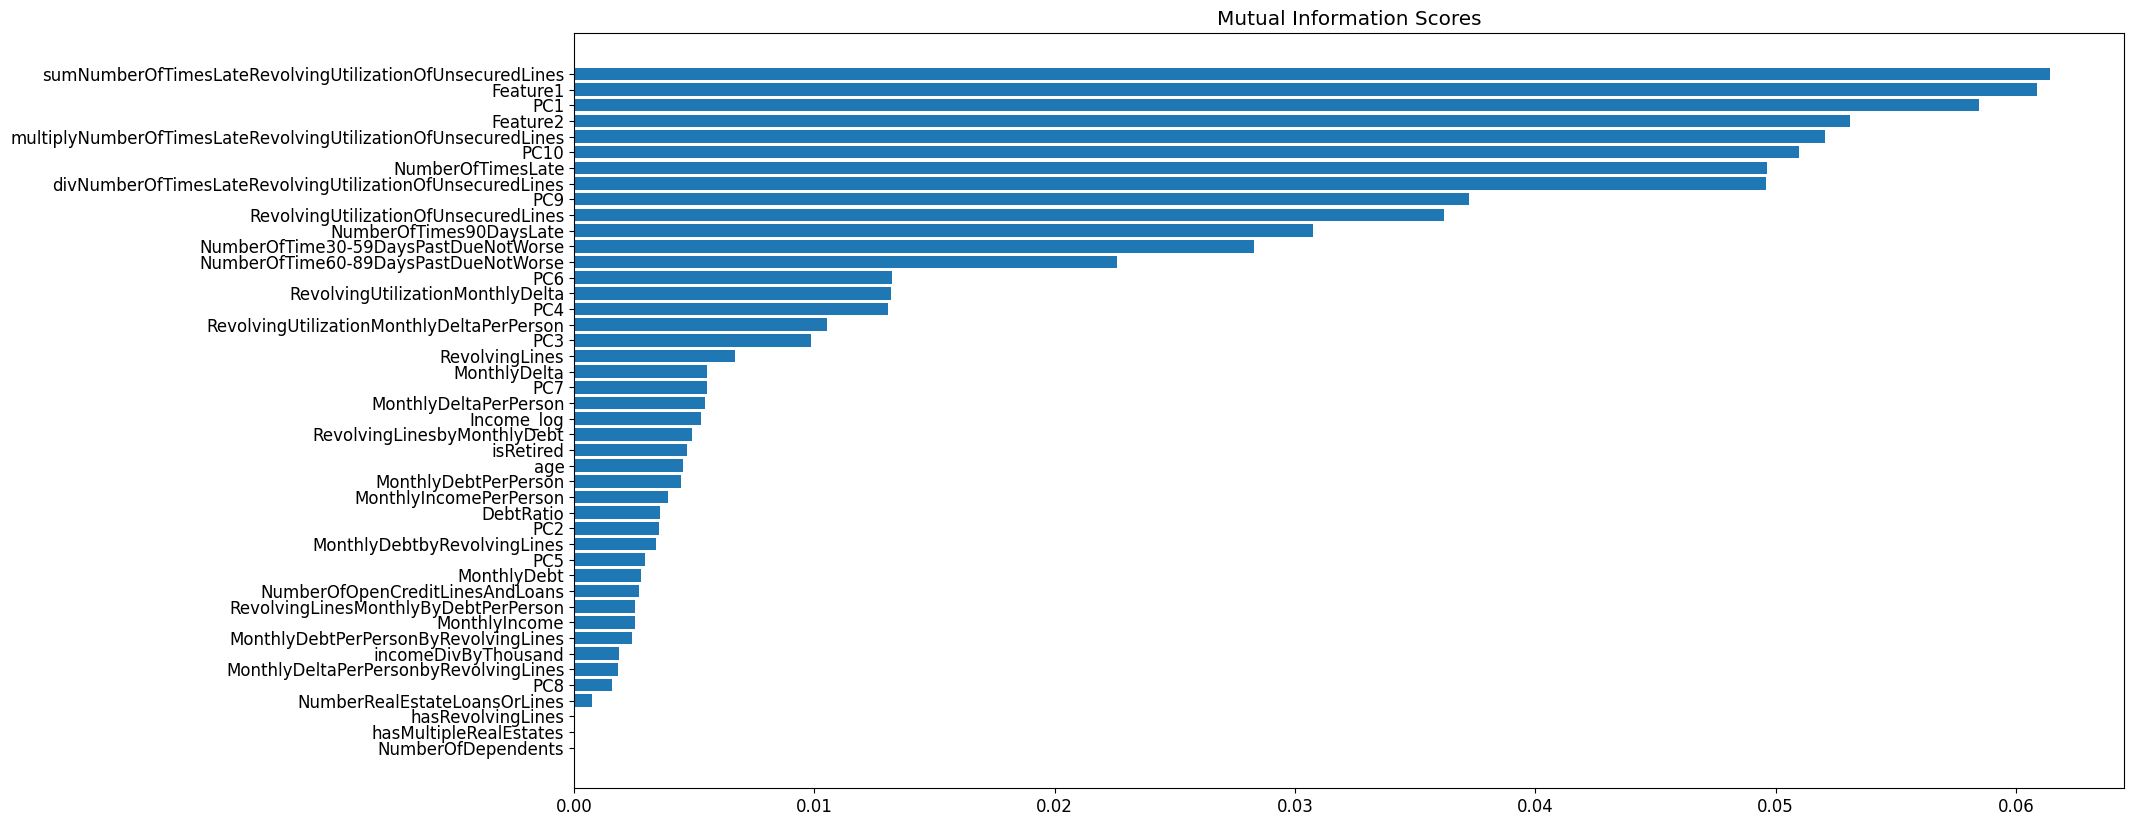

In [111]:
plt.figure(dpi=100, figsize=(20, 10))
plot_mi_scores(mi_scores)

#### Drop uninformative features - Score

In [112]:
def drop_uninformative(df, mi_scores):
    return df.loc[:, mi_scores > 0.01]

In [113]:
X_train_val_drop_uninformative = X_train_val.copy()
X_train_val_drop_uninformative = X_train_val_drop_uninformative.loc[:, mi_scores > 0.015]

In [114]:
#Score when we drop uninformative features
score_uninformative = score_dataset(X_train_val_drop_uninformative, y_train_val)
print(f"Score when ninformative features are removed: {score_uninformative:.5f} AUC")

Score when ninformative features are removed: 0.85885 AUC


#### Score features

In [115]:
#Select PCA features columns
PCA_cols = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"]

In [116]:
#Select New features columns
new_features_cols = [ "NumberOfTimesLate", "isRetired", "hasMultipleRealEstates", "hasRevolvingLines", "MonthlyIncomePerPerson", "MonthlyDebt", 'RevolvingLines', 
                     'MonthlyDebtbyRevolvingLines', "incomeDivByThousand", 'MonthlyDelta', 'MonthlyDeltaPerPerson', 'RevolvingUtilizationMonthlyDelta', 
                     'RevolvingUtilizationMonthlyDeltaPerPerson', "multiplyNumberOfTimesLateRevolvingUtilizationOfUnsecuredLines", 
                     "sumNumberOfTimesLateRevolvingUtilizationOfUnsecuredLines", "divNumberOfTimesLateRevolvingUtilizationOfUnsecuredLines", 
                     "Feature1", "Feature2"]

In [117]:
    model = XGBClassifier(n_jobs=-1, 
                            random_state = 42,
                            eval_metric="auc",
                            scale_pos_weight=13.9,
                            n_estimator=1000)

In [118]:
model.fit(X_train[input_cols], y_train, early_stopping_rounds=5, eval_set=[(X_valid[input_cols], y_valid)], verbose=False )

XGBClassifier(eval_metric='auc', n_estimator=1000, n_jobs=-1, random_state=42,
              scale_pos_weight=13.9)

In [119]:
 preds = model.predict(X_valid[input_cols])

In [120]:
accuracy = accuracy_score(y_valid, preds)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 79.10%


In [121]:
auc_score = roc_auc_score(y_valid, preds, average='weighted')
print(auc_score)

0.7793399720436534


In [122]:
#Merge all feature cols into a single list
feature_cols = np.append(PCA_cols, new_features_cols).tolist()

In [123]:
def sort_features(X_train, X_valid, y_train, y_valid, feature_cols):
      # Baseline score
      best_score = 0.78

      best_cols = input_cols
      cols = []

      model = XGBClassifier(n_jobs=-1, 
                            random_state = 42,
                            eval_metric="auc",
                            scale_pos_weight=13.9,
                            n_estimator=1000)

      for i in range(len(feature_cols)):

        cols = np.append(best_cols, feature_cols[i])

        print(feature_cols[i])

        model.fit(X_train[cols], y_train, early_stopping_rounds=5, eval_set=[(X_valid[cols], y_valid)], verbose=False )

        preds = model.predict(X_valid[cols])
    
        accuracy = accuracy_score(y_valid, preds)
        print("Accuracy: {:.2f}%".format(accuracy * 100))

        auc_score = roc_auc_score(y_valid, preds, average='weighted')
        print("AUC Score:".format(auc_score))

        score = cross_val_score(model, X_valid[cols], y_valid, cv=5, scoring="roc_auc")
        score = score.mean()
        print(score)

        
        if auc_score > best_score:
          best_score = auc_score
          best_cols = np.append(best_cols, feature_cols[i])
    
      return best_cols, best_score

    


In [124]:
best_feature_cols_new, best_score_new = sort_features(X_train, X_valid, y_train, y_valid, feature_cols)

PC1
Accuracy: 79.32%
AUC Score:
0.8521385687540814
PC2
Accuracy: 79.59%
AUC Score:
0.8513676586167873
PC3
Accuracy: 79.57%
AUC Score:
0.851668791358373
PC4
Accuracy: 79.59%
AUC Score:
0.8511036014393861
PC5
Accuracy: 79.61%
AUC Score:
0.8514032777453799
PC6
Accuracy: 79.55%
AUC Score:
0.8515021006809949
PC7
Accuracy: 79.50%
AUC Score:
0.8525116169259384
PC8
Accuracy: 79.45%
AUC Score:
0.851085359099762
PC9
Accuracy: 79.53%
AUC Score:
0.8518825180983705
PC10
Accuracy: 79.46%
AUC Score:
0.8515602012537047
NumberOfTimesLate
Accuracy: 79.40%
AUC Score:
0.8523336446876828
isRetired
Accuracy: 79.59%
AUC Score:
0.8513676586167873
hasMultipleRealEstates
Accuracy: 79.59%
AUC Score:
0.8513676586167873
hasRevolvingLines
Accuracy: 79.59%
AUC Score:
0.851755453760109
MonthlyIncomePerPerson
Accuracy: 79.66%
AUC Score:
0.8513724244435015
MonthlyDebt
Accuracy: 79.66%
AUC Score:
0.8510822162033207
RevolvingLines
Accuracy: 79.52%
AUC Score:
0.8509755366244611
MonthlyDebtbyRevolvingLines
Accuracy: 79.51%

In [125]:
best_feature_cols_new = best_feature_cols_new.tolist()

In [126]:
best_feature_cols_new

['RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'age',
 'MonthlyIncome',
 'DebtRatio',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents',
 'PC1',
 'PC2',
 'MonthlyIncomePerPerson',
 'Feature1']

In [127]:
best_score_new

0.7824718748919636

In [128]:
def score_features(X, y, feature_cols, baseline_score):

  # Baseline score
  best_score = baseline_score

  best_cols = input_cols
  cols = []

  for i in range(len(feature_cols)):

      cols = np.append(best_cols, feature_cols[i])
      print(best_cols)

      score = cross_val_score( XGBClassifier(n_jobs=-1, random_state = 42, eval_metric="auc", scale_pos_weight=13.9), X[cols], y, cv=5, scoring="roc_auc")
      score = score.mean()

      print(feature_cols[i], score)
      
      if score > best_score:
        best_score = score
        best_cols = np.append(best_cols, feature_cols[i])

  return best_cols, best_score

In [129]:
best_feature_cols, best_score = score_features(X_train, y_train, feature_cols, baseline_score)

['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'age', 'MonthlyIncome', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', 'NumberOfDependents']
PC1 0.8678751150712299
['RevolvingUtilizationOfUnsecuredLines'
 'NumberOfTime30-59DaysPastDueNotWorse' 'NumberOfTimes90DaysLate'
 'NumberOfTime60-89DaysPastDueNotWorse' 'age' 'MonthlyIncome' 'DebtRatio'
 'NumberOfOpenCreditLinesAndLoans' 'NumberRealEstateLoansOrLines'
 'NumberOfDependents' 'PC1']
PC2 0.8675897978333623
['RevolvingUtilizationOfUnsecuredLines'
 'NumberOfTime30-59DaysPastDueNotWorse' 'NumberOfTimes90DaysLate'
 'NumberOfTime60-89DaysPastDueNotWorse' 'age' 'MonthlyIncome' 'DebtRatio'
 'NumberOfOpenCreditLinesAndLoans' 'NumberRealEstateLoansOrLines'
 'NumberOfDependents' 'PC1']
PC3 0.8675209663813248
['RevolvingUtilizationOfUnsecuredLines'
 'NumberOfTime30-59DaysPastDueNotWorse' 'NumberOfTimes90DaysLate'
 

In [130]:
best_feature_cols = best_feature_cols.tolist()

In [131]:
best_feature_cols

['RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'age',
 'MonthlyIncome',
 'DebtRatio',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents',
 'PC1',
 'PC7',
 'PC8',
 'MonthlyIncomePerPerson']

In [132]:
best_score

0.8681151806593199

#### Define X and y for the best features

In [133]:
X_train = X_train[best_feature_cols_new]
X_valid = X_valid[best_feature_cols_new]
X_test = X_test[best_feature_cols_new]

#### Saving Processed Data to Disk

It can be useful to save processed data to disk, especially for really large datasets, to avoid repeating the preprocessing steps every time you start the Jupyter notebook. The parquet format is a fast and efficient format for saving and loading Pandas dataframes.

In [134]:
!pip install pyarrow --quiet

In [135]:
X_train.to_parquet('X_train.parquet')
X_valid.to_parquet('X_valid.parquet')
X_test.to_parquet('X_test.parquet')

In [136]:
%%time
pd.DataFrame(y_train).to_parquet('y_train.parquet')
pd.DataFrame(y_valid).to_parquet('y_valid.parquet')
pd.DataFrame(y_test).to_parquet('y_test.parquet')

CPU times: user 42.3 ms, sys: 4.02 ms, total: 46.4 ms
Wall time: 45.8 ms


We can read the data back using `pd.read_parquet`.

In [137]:
%%time

X_train = pd.read_parquet('X_train.parquet')
X_valid = pd.read_parquet('X_valid.parquet')
X_test = pd.read_parquet('X_test.parquet')

y_train = pd.read_parquet('y_train.parquet')[target_col]
y_valid = pd.read_parquet('y_valid.parquet')[target_col]
y_test = pd.read_parquet('y_test.parquet')[target_col]

CPU times: user 102 ms, sys: 90.1 ms, total: 192 ms
Wall time: 174 ms


Let's verify that the data was loaded properly.

In [138]:
X_train

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,age,MonthlyIncome,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,PC1,PC2,MonthlyIncomePerPerson,Feature1
58544,-0.606794,0.828918,-0.139787,-0.148587,-0.020267,0.215157,-0.171865,0.300044,-0.015351,-0.666017,0.020274,0.234261,0.559425,0.015038
29641,-0.291703,-0.304738,-0.139787,-0.148587,0.859633,0.796306,-0.171872,-0.865646,1.755230,-0.666017,-0.399989,0.555588,1.496756,-0.274834
126693,0.107848,0.828918,-0.139787,-0.148587,0.859633,0.353190,-0.171968,-0.282801,-0.900641,-0.666017,0.149637,-0.448501,0.782056,0.215263
112594,-0.803182,-0.304738,-0.139787,-0.148587,1.739532,-0.026646,-0.171971,-0.282801,-0.015351,-0.666017,-0.509486,-0.045561,0.169421,-0.418138
18338,-0.585281,-0.304738,-0.139787,-0.148587,-0.697112,-0.406481,1.798803,-0.282801,0.869940,-0.666017,-0.293085,0.225623,-0.443213,-0.357087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1.827637,-0.304738,-0.139787,-0.148587,-0.291005,0.118755,-0.171896,-0.671364,-0.015351,1.140937,0.235299,-0.481029,-0.160830,0.318950
103694,-0.403637,-0.304738,-0.139787,-0.148587,-1.577011,-0.277337,-0.171453,1.465733,-0.900641,-0.666017,-0.184081,-0.107406,-0.234918,-0.306196
131932,1.827637,-0.304738,-0.139787,-0.148587,1.333424,-0.406481,-0.172027,-1.448490,-0.900641,-0.666017,0.143191,-1.510830,-0.443213,0.318950
146867,0.452120,-0.304738,-0.139787,-0.148587,0.995002,0.262485,-0.171772,0.494325,-0.015351,-0.666017,-0.285244,0.161544,0.635759,-0.066435


In [139]:
y_train

58544     0
29641     0
126693    0
112594    0
18338     0
         ..
119879    0
103694    1
131932    0
146867    0
121958    0
Name: SeriousDlqin2yrs, Length: 112242, dtype: int64

## 4. Model Selection
1. Logistic Regression Model

2. Decision Tree Model

3. Random Forest Model

4. XGBoosting Model


#### Helper Functions

Let's define a few helper functions to evaluate models, generate test predictions and plot 

In [140]:
# Plots a confusion matrix and shows the respective accuracy_scores
def predict_and_plot(inputs, targets, model, name='', normalize=None):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    auc = roc_auc_score(targets, preds, average='weighted')
    print("AUC Score: {:.2f}".format(auc))
  
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds


# Calculates AUC and plots the ROC curve
def make_auc(model,inputs,target):

    probs = model.predict_proba(inputs)

    preds = probs[:,1]

    fpr,tpr,threshold = metrics.roc_curve(target,preds)

    roc_auc = metrics.auc(fpr,tpr)

    plt.title( "Receiver Operating Characteristic")
    plt.plot(fpr,tpr,"b",label="AUC = %0.2f" % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    return plt.show()


#Submit results to Kaggle
def submit(test_preds, fname):
    sub_df = pd.read_csv(data_dir+'/sampleEntry.csv')
    sub_df["Probability"] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df


# Logistic Regression Helper Funtions
# Plots a confusion matrix and shows the respective accuracy scores and AUC scores (only used in Logistic Regression)
def plot_and_scores(preds, targets, model, name='', normalize=None):
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    auc = roc_auc_score(targets, preds, average='weighted')
    print("AUC Score: {:.2f}".format(auc))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));


# Function that plots ROC curve (only used in Logistic Regression)
def plot_ROC(fpr, tpr, label):
  roc_auc = metrics.auc(fpr,tpr)

  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr, tpr, "b", label=label)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')  
  
  return plt.show()

### Logistic Regression


Logistic regression is a machine learning algorithm that solves a classification problem. Logistic regression fits a range of features to an S shape curve with the help of a cost function called **Sigmoid function** also known as logistic function. The function maps predicted values to probabilities between 0 and 1.



We will try two different approaches to tackle this problem: 

*   Logistic Regression with class weights, thus balancing the "strength" of the positive values in the target.
*   Logistic Regression without class weight, but with adjustments to the model's threshold (by default 0.5) to improve the model


#### Train

In [141]:
#?LogisticRegression

In [142]:
# Assign the logistic regression model 
log_model = LogisticRegression(solver='liblinear')

# training the model
log_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [143]:
# Assign the logistic regression model with class weight
log_model_weight = LogisticRegression(solver='saga', class_weight="balanced")

# training the model
log_model_weight.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(class_weight='balanced', solver='saga')

#### Evaluating Results




Regarding the model performance and to evaluate our results, we will use the following tools: **Confusion Matrix**, **Receiver Operating Characteristic** (ROC) and **Area Under the ROC Curve** (AUC)

##### Confusion Matrix

Before diving into the confusion matrix, we should master the concepts below. These concepts are terms we use to describe the results of classification models.

1. True Positive ($\text{TP}$) is an outcome where the model correctly predicts the positive class.

2. True Negative ($\text{TN}$) is an outcome where the model correctly predicts the negative class

3. False Positive ($\text{FP}$) is an outcome where the model incorrectly predicts the positive class.

4. False Negative ($\text{FN}$) is an outcome where the model incorrectly predicts the negative class


<img src="https://i.imgur.com/UM28BCN.png" width="480">



Accuracy: 93.54%
AUC Score: 0.55


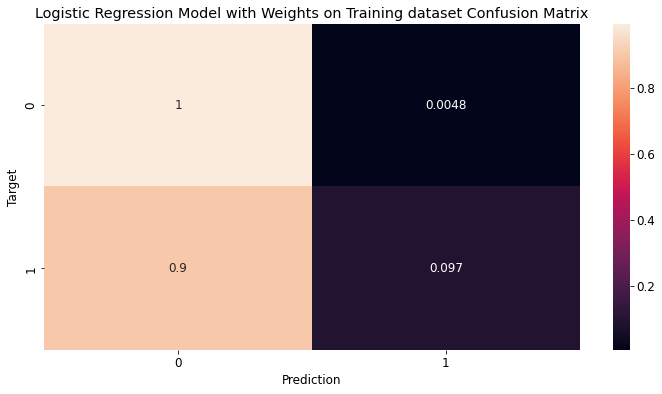

In [144]:
# Predictions and plot of confusion matrix from Logistic Regression Model without Weights on Training dataset
preds_train = predict_and_plot(X_train, y_train, log_model,'Logistic Regression Model with Weights on Training dataset',normalize='true')

Accuracy: 80.08%
AUC Score: 0.78


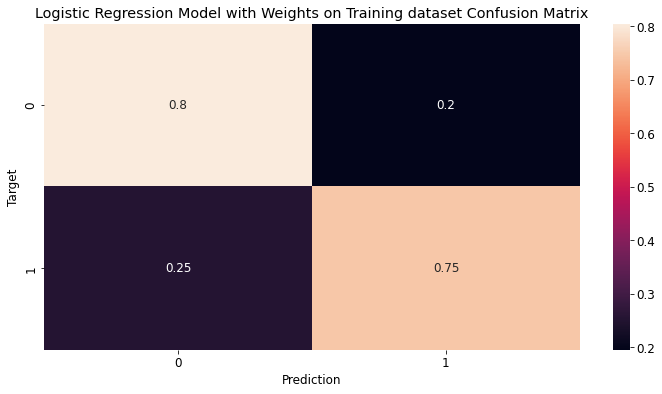

In [145]:
# Predictions and plot of confusion matrix from Logistic Regression Model with Weights on Training dataset
preds_train_weight = predict_and_plot(X_train, y_train, log_model_weight,'Logistic Regression Model with Weights on Training dataset',normalize='true')

Accuracy: 93.41%
AUC Score: 0.54


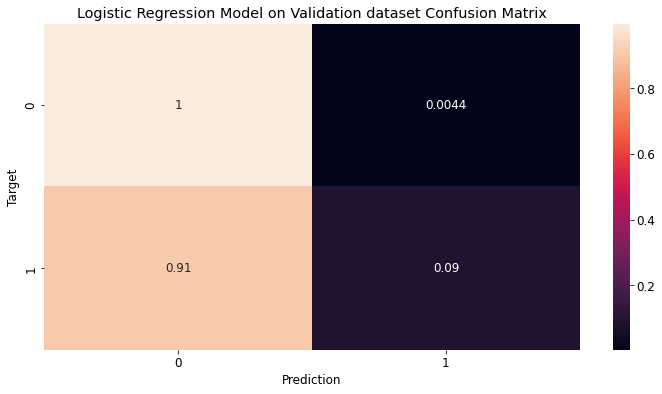

In [146]:
# Predictions and plot of confusion matrix from Logistic Regression Model without Weights on Validation dataset
preds_valid = predict_and_plot(X_valid, y_valid, log_model,'Logistic Regression Model on Validation dataset',normalize='true')

Accuracy: 79.64%
AUC Score: 0.77


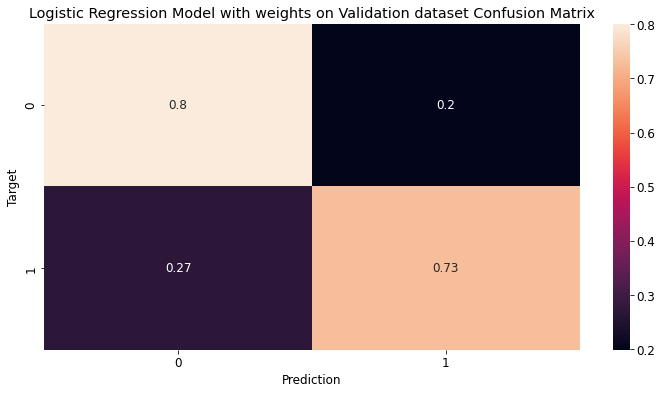

In [147]:
# Predictions and plot of confusion matrix from Logistic Regression Model without Weights on Validation dataset
preds_valid_weight = predict_and_plot(X_valid, y_valid, log_model_weight,'Logistic Regression Model with weights on Validation dataset',normalize='true')

In [148]:
#Predict target value with the test data set
preds_test_weight = log_model_weight.predict(X_test)

In [149]:
#Use helper function, submit, to create a file with the predicted target
submit(preds_test_weight, 'logistic_weight_submission.csv')

,Id,Probability
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
101498,101499,0
101499,101500,0
101500,101501,0
101501,101502,0


Our model without class weight is doing too well on negatives but extremely poorly on positives in the train and validation dataset, with a AUC of 0.5. It's not ideal if our project aims to identify those with high risks of defaulting on credit.

The model with class weight, has a significant improvement in AUC score in the train, validation dataset. This model is the best model we will come up with. So, if you don't want to get into, how to improve the model without class weight with threshold adjustment, you can skip to the Decision Tree model.

If you like to know how to improve the first model (without class weight) by changing its threshold, checkout the improve model section.

If you like to understand better some key aspects to improve our model, please read the concepts and definitions section.

#### Concepts and Definitions

Most of the definition and information bellow was taken from: 

*   [Classification section of the Machine Learning Crash Course from Google](https://developers.google.com/machine-learning/crash-course/classification/video-lecture)

*  [ROC and AUC, Clearly Explained from StatQuest on youtube](https://www.youtube.com/watch?v=4jRBRDbJemM)


 ##### Accuracy

Accuracy is a standard metric that shows the overall ability of model performance. It measures the number of correct predictions divided by the total number of predictions.

$$ACC = \frac{TP+TN}{TP+FP+TN+FN}$$



In some cases, we accuracy score is a good evaluation metric. However, if there are two categories, and 85% of inputs belong to one of those categories, then a model that always predicts a fixed value (the more common category) is 85% accurate.

In other words since only about 7% of our data in the target column is a 1, if the model always guesses that the outcome is not a 1, it will be right 93% of the time.

This demonstrates why accuracy is generally not the preferred performance metric for classifiers, especially when dealing with skewed data such as ours (where one class or outcome is much more frequent than others).

For these reasons, we'll use a different metric called the AUC Score, or area under curve. 

##### Precision

Precision is used when we don't want to overpredict positives. In our case, if we target high precision, and then we would miss some observations that are good but rejected by our algorithms.



$$\text {Precision} = \frac{\text{TP}} {\text{TP + FP}}$$

##### Sensitivity (or Recall)

Sensitivity is used when you cannot afford to make any mistakes of missing positives. One practical application demanding high recall is medical diagnosis, such as cancer diagnosis. Because we would rather make mistakes in diagnosing that patients might have cancer. In this case, we can set up rules to do additional tests for those who are potentially diagnosed as having cancer when the results are unclear.

In our project, we choose to have a high recall rate to increase our model performance.


$$\text {Sensitivity} = \frac{\text{TP}} {\text{TP + FN}}$$

##### Classification: Thresholding 

Logistic regression returns a probability. You can use the returned probability "as is" (for example, the probability that the user will click on this ad is 0.00023) or convert the returned probability to a binary value (for example, this email is spam).

A logistic regression model that returns 0.9995 for a particular email message is predicting that it is very likely to be spam. Conversely, another email message with a prediction score of 0.0003 on that same logistic regression model is very likely not spam. However, what about an email message with a prediction score of 0.6? In order to map a logistic regression value to a binary category, you must define a classification threshold (also called the decision threshold). A value above that threshold indicates "spam"; a value below indicates "not spam." It is tempting to assume that the classification threshold should always be 0.5, but thresholds are problem-dependent, and are therefore values that you must tune.

The following sections take a closer look at metrics you can use to evaluate a classification model's predictions, as well as the impact of changing the classification threshold on these predictions.

Note: "Tuning" a threshold for logistic regression is different from tuning hyperparameters such as learning rate. Part of choosing a threshold is assessing how much you'll suffer for making a mistake. For example, mistakenly labeling a non-spam message as spam is very bad. However, mistakenly labeling a spam message as non-spam is unpleasant, but hardly the end of your job.

##### ROC: Receiver Operating Characteristic

The ROC graphs provide a simple way to summarize all the information from the different classification thresholds. Instead of having one confusion matrix for each classification thresholds, we can simply use the ROC to summarize them all.

The ROC plots two parameters:

*   True Positive Rate

*   False Positive Rate

**True Positive Rate** (TPR) is a synonym for recall and is therefore defined as follows:

$$\text {TPR}=\text {Sensitvity} = \frac{\text{TP}} {\text{TP + FN}}$$

**False Positive Rate** (FPR) is defined as follows:

$$\text {FPR} =\text{1- Specificity} = \frac{FP}{FP+TN}$$

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.


![](https://developers.google.com/machine-learning/crash-course/images/ROCCurve.svg)






##### AUC: Area Under the ROC Curve

To compute the points in an ROC curve, we could evaluate a logistic regression model many times with different classification thresholds, but this would be inefficient. Fortunately, there's an efficient, sorting-based algorithm that can provide this information for us, called AUC.


AUC makes it easy to compare one ROC curve to another. If the AUC is higher with a Logistic Regression model then a Random Forest model, we would rather use the Logistics Regression model.


AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve.


![](https://developers.google.com/machine-learning/crash-course/images/AUC.svg)

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. For example, given the following examples, which are arranged from left to right in ascending order of logistic regression predictions:


AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

AUC is desirable for the following two reasons:

AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
AUC is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.
However, both these reasons come with caveats, which may limit the usefulness of AUC in certain use cases:

Scale invariance is not always desirable. For example, sometimes we really do need well calibrated probability outputs, and AUC won’t tell us about that.

Classification-threshold invariance is not always desirable. In cases where there are wide disparities in the cost of false negatives vs. false positives, it may be critical to minimize one type of classification error. For example, when doing email spam detection, you likely want to prioritize minimizing false positives (even if that results in a significant increase of false negatives). AUC isn't a useful metric for this type of optimization.

#### Improve Model

In [150]:
# Precision for model without weights
precision = precision_score(y_valid, preds_valid)
print('Using Scikit-Learn library, the precision value is {0:.2f} %'.format(precision*100))

Using Scikit-Learn library, the precision value is 59.53 %


In [151]:
# Recall (or Sensitivity)  for model without weights
sensitivity_score = recall_score(y_valid, preds_valid)
print('Using Scikit-Learn library, the recall value is {0:.2f} %'.format(sensitivity_score*100))

Using Scikit-Learn library, the recall value is 8.99 %


In [152]:
# Precision for model without weights
precision = precision_score(y_valid, preds_valid_weight)
print('Using Scikit-Learn library, the precision value is {0:.2f} %'.format(precision*100))

Using Scikit-Learn library, the precision value is 21.07 %


In [153]:
# Recall (or Sensitivity)  for model without weights
sensitivity_score = recall_score(y_valid, preds_valid_weight)
print('Using Scikit-Learn library, the recall value is {0:.2f} %'.format(sensitivity_score*100))

Using Scikit-Learn library, the recall value is 72.92 %


##### Choose the right Threshold for our Model

In [154]:
# predict probabilities and keep probabilities for the positive outcomes only
y_probs_train = log_model.predict_proba(X_train)[:,1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, y_probs_train)

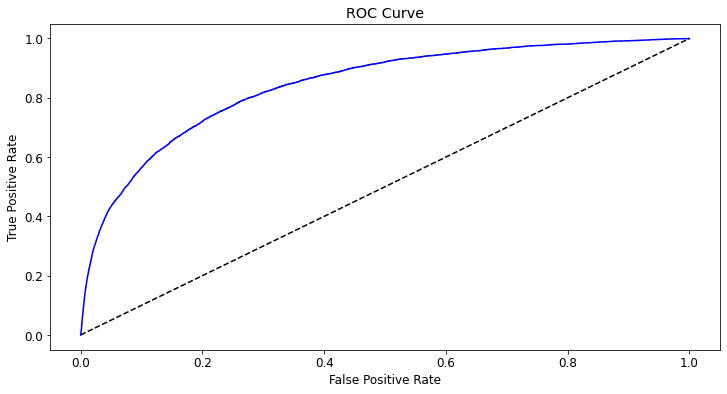

In [155]:
plot_ROC(fpr, tpr, 'Logistic Regression without weight class')

In [156]:
# predict probabilities and keep probabilities for the positive outcomes only
y_probs_train_w = log_model_weight.predict_proba(X_train)[:,1]

# calculate roc curves
fpr_w, tpr_w, thresholds_w = roc_curve(y_train, y_probs_train_w)

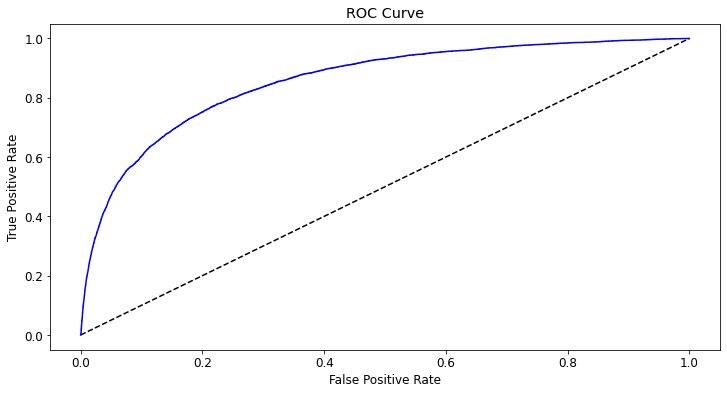

In [157]:
plot_ROC(fpr_w, tpr_w, 'Logistic Regression with weight class ROC Curve')

The idea of using the ROC curve for tuning the threshold is to identify that threshold that gives best confusion matrix. Depending on our project we should decide what TPR and FPR we can live with. 

We will use three approaches to calculate the optimal threshold:

1. The threshold t that satisfies the equation:

$$TPR(t) = {1-FPR(t)}$$

It is equivalent to find the value of t for which the True Positive Rate is equal to the True Negative Rate (which is 1-FPR).

This is a general way of tuning the threshold, often found in academic papers and used by several data scientists.

We want to find the threshold that satisfies the following:

$$t = argmin{|TPR(t)+FPR(t)-1|}$$

This is a very common approach because we convert a root finding problem into an optimization problem.

We can calculate all the scores generated by our model and find the one that minimizes the argument above.



2. The geometric mean or known as G-mean is the geometric mean of sensitivity (known as recall) and specificity. So, it will be one of the unbiased evaluation metrics for imbalanced classification.

3. The final approach we will use is the following:

$$t = argmax {(TPR(t) - FPR(t))}$$


In [158]:
#Function that plots |FPR + TPR - 1| -> first aproach to thresold improvement
def plot_threshold(fpr, tpr, thresholds):
  plt.scatter(thresholds,np.abs(fpr+tpr-1))
  plt.xlabel("Threshold for the model with the weight class")
  plt.ylabel("|FPR + TPR - 1|")
  return plt.show()

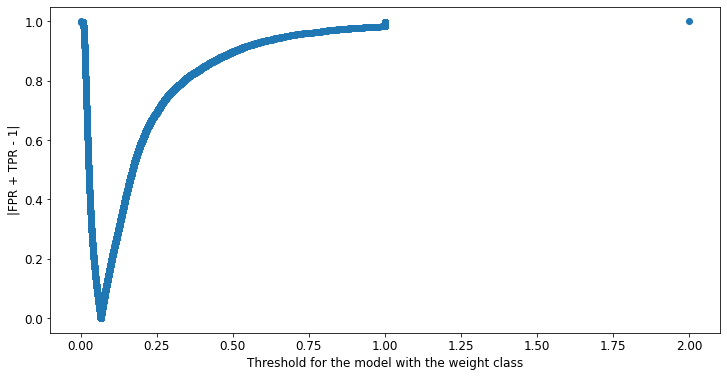

In [159]:
#First aproach for the model without the weight class
plot_threshold(fpr, tpr, thresholds)

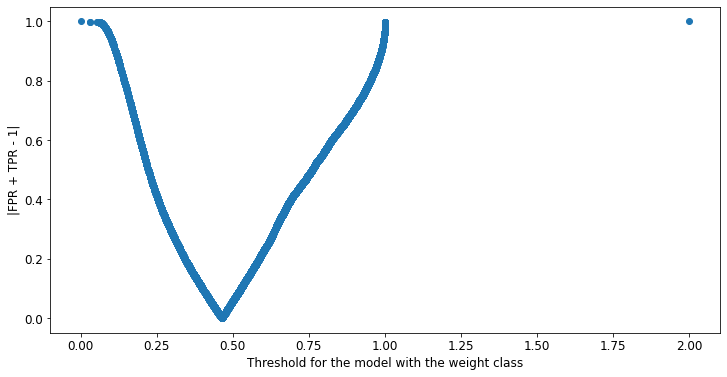

In [160]:
#First aproach for the model with the weight class
plot_threshold(fpr_w, tpr_w, thresholds_w)

As we can see, for the Logistic regression model that uses weight class the optimal threshold is very close to the Logistic regression default threshold of 0,5. This was to be expect if we did atribute the correct weights.

In [161]:
#First approach for the model without the weight class
best_threshold_1 = thresholds[np.argmin(np.abs(tpr+fpr-1))]
print(best_threshold_1)

0.06589732312744168


In [162]:
#Second approach for the model without the weight class
best_threshold_2 = thresholds[np.argmax(np.sqrt(tpr * (1-fpr)))]
print(best_threshold_2)

0.06878120459415117


In [163]:
#Third approach for the model without the weight class
best_threshold_3 = thresholds[np.argmax(tpr - fpr)]
print(best_threshold_3)

0.05934350894355931


In [164]:
# Function that calculates if probability, y_probs, is higher or equal the the threshold value and returns a 0 or 1.
def predict(y_probs, threshold):
  y_pred_with_threshold = (y_probs >= threshold).astype(int)
  return y_pred_with_threshold

In [165]:
# Calculate using predict function where the probability, y_probs is higher or equal the the threshold value for the training data
y_pred_train_1 = predict(y_probs_train, best_threshold_1)
y_pred_train_2 = predict(y_probs_train, best_threshold_2)
y_pred_train_3 = predict(y_probs_train, best_threshold_3)

# predict probabilities and keep probabilities for the positive outcomes only
y_probs_valid = log_model.predict_proba(X_valid)[:,1]

# Calculate using predict function where the probability, y_probs is higher or equal the the threshold value for the validation data
y_pred_valid_1 = predict(y_probs_valid, best_threshold_1)
y_pred_valid_2 = predict(y_probs_valid, best_threshold_2)
y_pred_valid_3 = predict(y_probs_valid, best_threshold_3)

Accuracy: 76.15%
AUC Score: 0.76


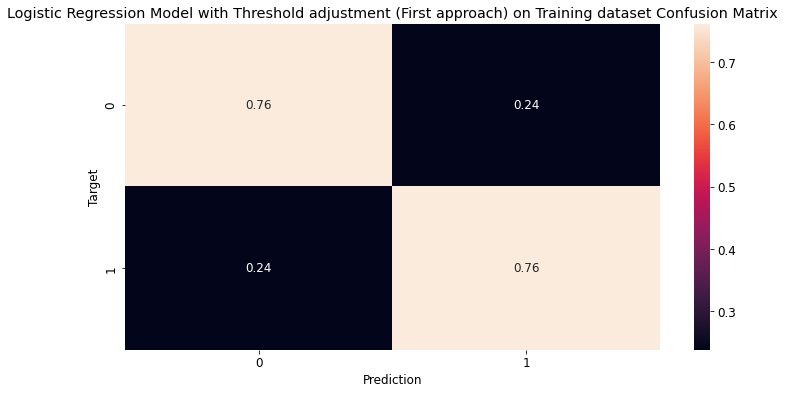

In [166]:
plot_and_scores(y_pred_train_1, y_train, log_model,'Logistic Regression Model with Threshold adjustment (First approach) on Training dataset',normalize='true')

Accuracy: 75.76%
AUC Score: 0.75


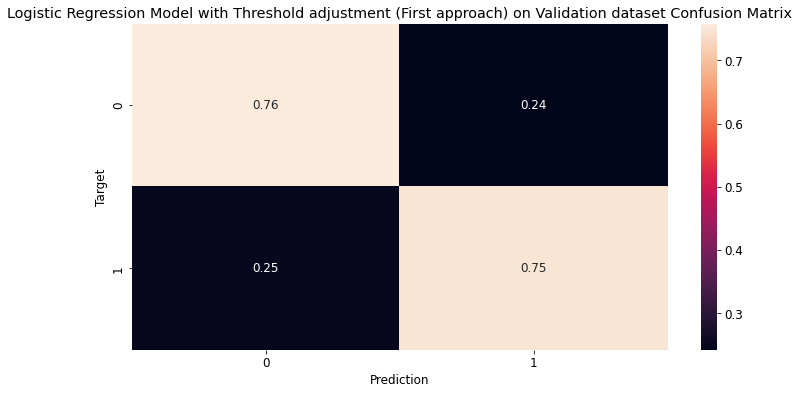

In [167]:
plot_and_scores(y_pred_valid_1, y_valid, log_model,'Logistic Regression Model with Threshold adjustment (First approach) on Validation dataset',normalize='true')

Accuracy: 76.98%
AUC Score: 0.76


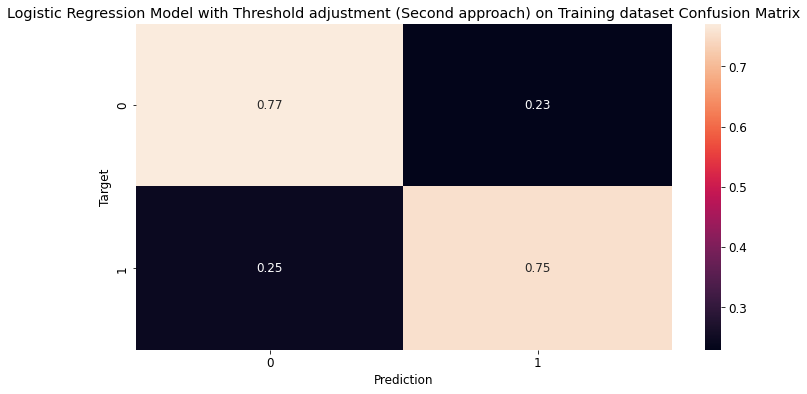

In [168]:
plot_and_scores(y_pred_train_2, y_train, log_model,'Logistic Regression Model with Threshold adjustment (Second approach) on Training dataset',normalize='true')

Accuracy: 76.53%
AUC Score: 0.75


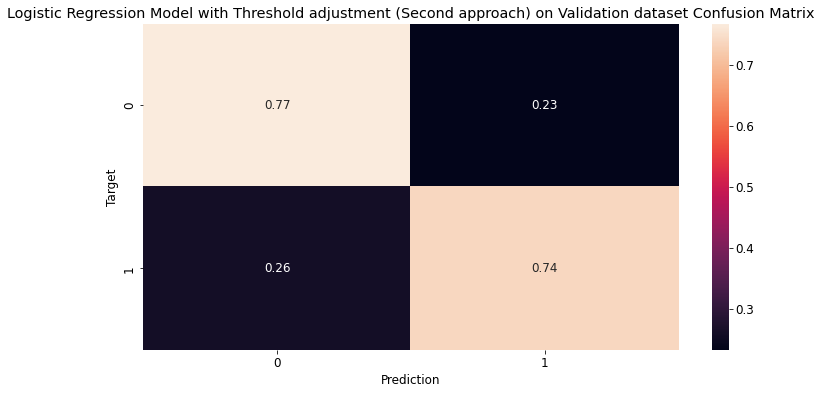

In [169]:
plot_and_scores(y_pred_valid_2, y_valid, log_model,'Logistic Regression Model with Threshold adjustment (Second approach) on Validation dataset',normalize='true')

Accuracy: 74.09%
AUC Score: 0.76


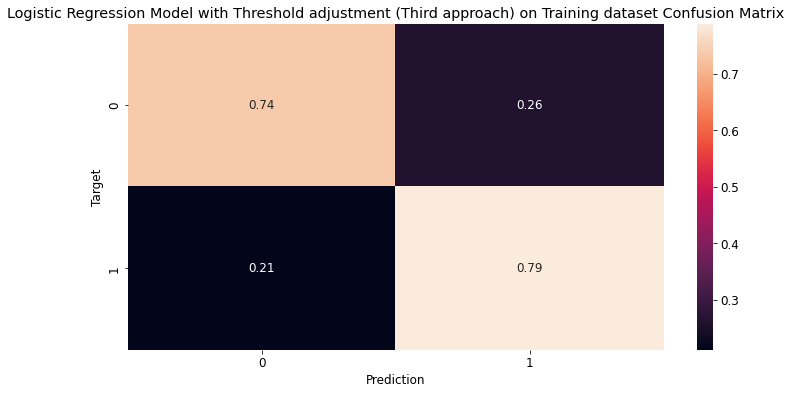

In [170]:
plot_and_scores(y_pred_train_3, y_train, log_model,'Logistic Regression Model with Threshold adjustment (Third approach) on Training dataset',normalize='true')

Accuracy: 73.65%
AUC Score: 0.75


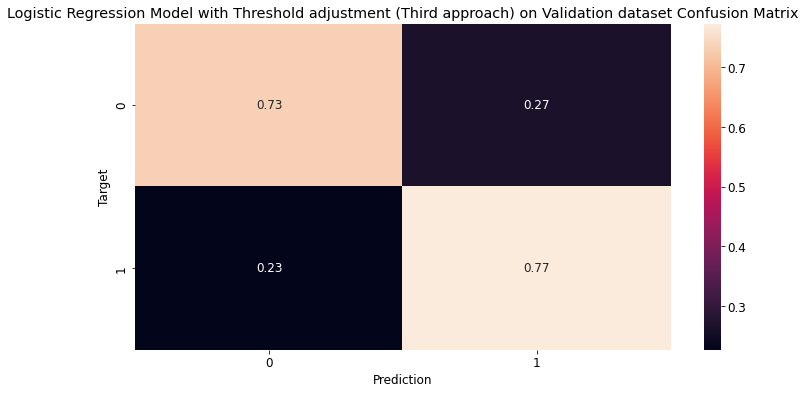

In [171]:
plot_and_scores(y_pred_valid_3, y_valid, log_model,'Logistic Regression Model with Threshold adjustment (Third approach) on Validation dataset',normalize='true')

After all this work, our model that uses class weight is still better than our non threshold adjusted model. The simplest solution was the best solution after all.

Also, it seems that the second approach to find the best thershold was the most accurate.

Now we will adjust our weighted model thershold to see if we can improve AUC score.


In [172]:
#First approach for the model with the weight class
best_threshold_w_1 = thresholds_w[np.argmin(np.abs(tpr_w+fpr_w-1))]
print(best_threshold_w_1)

0.4647085647909739


In [173]:
#Second approach for the model with the weight class
best_threshold_w_2 = thresholds_w[np.argmax(np.sqrt(tpr_w * (1-fpr_w)))]
print(best_threshold_w_2)

0.46373028867094096


In [174]:
#Third approach for the model with the weight class
best_threshold_w_3 = thresholds_w[np.argmax(tpr_w - fpr_w)]
print(best_threshold_w_3)

0.46373028867094096


In [175]:
# Calculate using predict function where the probability, y_probs is higher or equal the the threshold value for the training data
y_pred_train_w_1 = predict(y_probs_train_w , best_threshold_w_1)
y_pred_train_w_2 = predict(y_probs_train_w , best_threshold_w_2)
y_pred_train_w_3 = predict(y_probs_train_w , best_threshold_w_3)

# predict probabilities and keep probabilities for the positive outcomes only
y_probs_valid_w = log_model_weight.predict_proba(X_valid)[:,1]

# Calculate using predict function where the probability, y_probs is higher or equal the the threshold value for the validation data
y_pred_valid_w_1 = predict(y_probs_valid_w , best_threshold_w_1)
y_pred_valid_w_2 = predict(y_probs_valid_w , best_threshold_w_2)
y_pred_valid_w_3 = predict(y_probs_valid_w , best_threshold_w_3)

Accuracy: 77.70%
AUC Score: 0.78


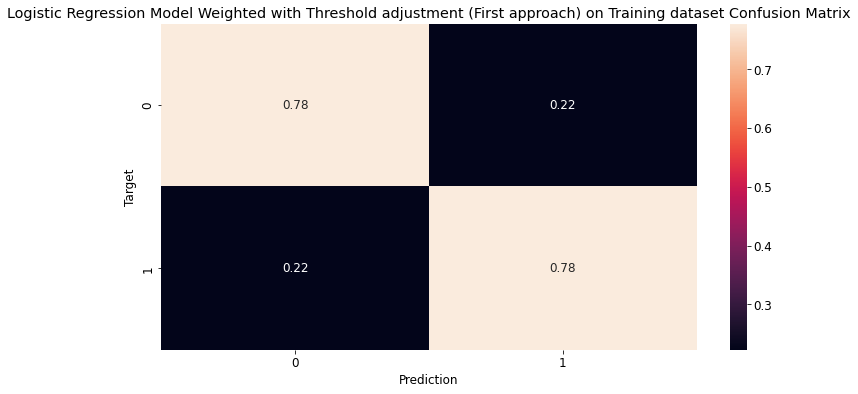

In [176]:
plot_and_scores(y_pred_train_w_1, y_train, log_model_weight,'Logistic Regression Model Weighted with Threshold adjustment (First approach) on Training dataset',normalize='true')

Accuracy: 77.25%
AUC Score: 0.77


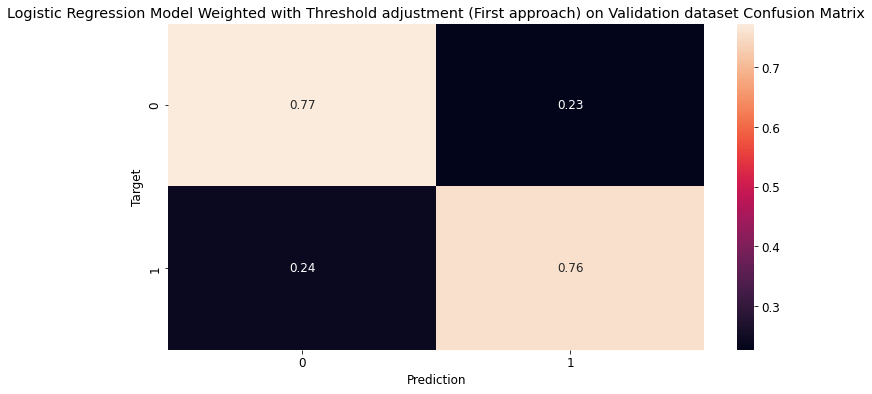

In [177]:
plot_and_scores(y_pred_valid_w_1, y_valid, log_model_weight,'Logistic Regression Model Weighted with Threshold adjustment (First approach) on Validation dataset',normalize='true')

Since our Second and Third aproach are has almost the same value we will plot only the second aproach

Accuracy: 77.64%
AUC Score: 0.78


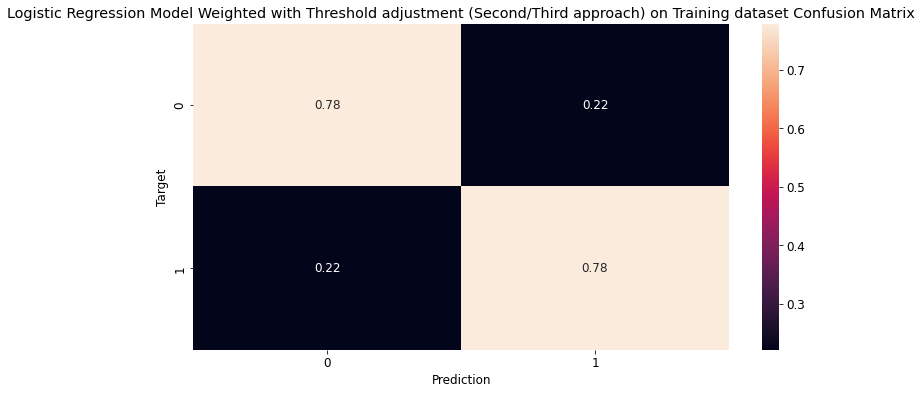

In [178]:
plot_and_scores(y_pred_train_w_2, y_train, log_model_weight,'Logistic Regression Model Weighted with Threshold adjustment (Second/Third approach) on Training dataset',normalize='true')

Accuracy: 77.20%
AUC Score: 0.77


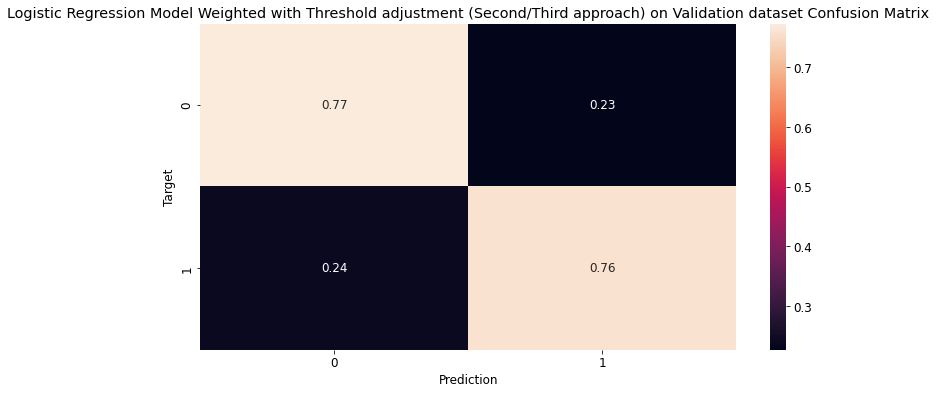

In [179]:
plot_and_scores(y_pred_valid_w_2, y_valid, log_model_weight,'Logistic Regression Model Weighted with Threshold adjustment (Second/Third approach) on Validation dataset',normalize='true')

Submit to kaggle models with threshold optimization


In [180]:
#Predict probabilities and keep probabilities for the positive outcomes only
y_probs_test_w = log_model_weight.predict_proba(X_test)[:,1]

#We will use the second aproach threshold, to predict 
y_pred_test_w = predict(y_probs_test_w , best_threshold_w_2)

#Use helper function, submit, to create a file with the predicted target
submit(y_pred_test_w, 'logistic_weight_threshold_submission.csv')

,Id,Probability
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
101498,101499,0
101499,101500,1
101500,101501,0
101501,101502,0


In [181]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/joaopedrosdmm/credit-score


'https://jovian.ai/joaopedrosdmm/credit-score'

### Decision Tree

Decision trees are supervised machine learning algorithms that solve classification and regression problems. A decision tree is constructed by learning a sequence of **If-Else conditions** about individual features to divide the training data into subsets and eventually infer the label. One of the significant differences from linear models is that tree-based models can capture non-linear relationships between features and labels.

##### Concepts and Definitions


- **Node** : A node is a point that involves either a question or a prediction. Those questions are if-else statements in order to split data till the end where a decision tree made predictions for the label.

- **Root** : The root is an initial node at which the tree starts growing. The root node has no parent node, and it involves a question that generates two children nodes through two branches. 

- **Internal Node**: An internal node is a node that not only has a parent, but also gives rise to two children nodes.

- **Leaf** : A leaf is a node that has one parent node but no children node involving no questions. It's where a prediction for an entry is made. The ultimate goal of a decision tree is to produce the purest leaves.

- **max_depth**: In a decision tree, the parameter controls the maximum number of branches to be separated the top (root nodes)from an extreme-end (the leaf). It's a parameter for the `DescirionTreeClassifer()` estimator. It means the number of times for a decision model to split data. The above diagram splits the entire dataset twice so that the `max_depth` is equal to 2. 


Classification Process

Decision trees begin with the root node and grow by applying splitting conditions at each non-leaf node until reaching the leaf node. Tree models divide the labelled dataset into a homogeneous dataset at the end node.

###### **Entropy** 



Entropy is a method to measure impurity

$$\text{Entropy} = - \Sigma_j p_j log_2 p_j $$


Where $p_j$ the probability of an object being classified to a particular class

When all samples of a node are split into the same class, the value of $\text{Entropy}$ will be 0. On the other hand, the entropy reaches the maximum value of 1, when the data is the uniform class distribution. 

###### **Gini index**

Gini index is a criterion to minimize the probability of misclassification.

The Gini Index is the loss function used by the decision tree to decide which column should be used for splitting the data, and at what point the column should be split. A lower Gini index indicates a better split. A perfect split (only one class on each side) has a Gini index of 0. 

$$\text{Gini} = 1 - \Sigma_j p_j^2$$

$$\text{Gini} = 1- (p_1^2+p_2^2) = 1-{0.5}^2 +{0.5}^2) = 0.5$$


Where $p_j$ the probability of an object being classified to a particular class

###### **Classification Error**


$$ \text{ClassificationError} = 1 - maxp_j$$ 


Where $p_j$ the probability of an object being classified to a particular class

###### **Information Gain**

Information Gain(IG) can help us identify the purest node. Tree models learn patterns and features in such a way to produce the **purest** leaf.

As nodes grow recursively, the obtention of an internal node or a leaf depends on the state of its predecessors. At each node, the question a tree asks involves one feature `f` and splits data with a point `sp`, aiming at the largest information gain(IG).


$$\text{IG(f, sp} =  \text{I(parent)} - \biggl(\frac{N_\text{left}}{N} \times \text{I(left)} + \frac{N_\text{right}}{N} \times \text{I(right)}\biggl)$$


We repeat this splitting procedure at each child node down to the empty leaves. In other words, the procedure will not pause until all samples belong to the same class.


#### Train

In [182]:
tree_model = DecisionTreeClassifier(random_state=42)

The Gini score is a metric to evaluate the purity of a node or a leaf. In general, the smaller the Gini score is, the pure the node or leaf can be. The `gini =0` means the node is pure, indicating that the node only contains a single class of samples. 

In [183]:
# Set entropy as criterion method
tree_model.criterion='gini'

In [184]:
# Train the model 
tree_model.fit(X_train, y_train)

# Make probabilities with train dataset
probs_train = tree_model.predict_proba(X_train)

Accuracy: 99.97%
AUC Score: 1.00


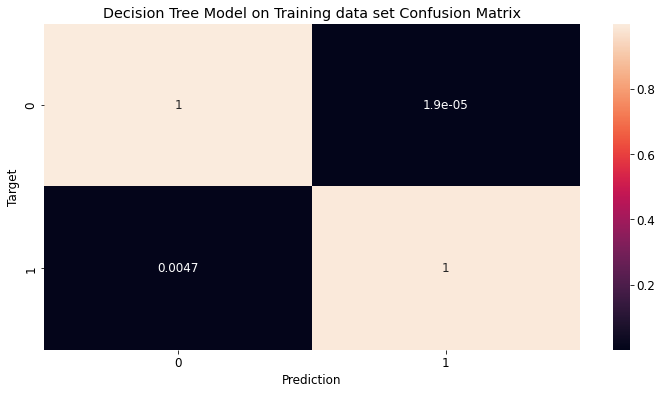

In [185]:
# Make predictions and plot of confusion matrix from Decision Tree Model on Training dataset
preds_train = predict_and_plot(X_train, y_train, tree_model,'Decision Tree Model on Training data set',normalize='true')

In [186]:
pd.value_counts(preds_train)

0    104802
1      7440
dtype: int64

Accuracy: 89.68%
AUC Score: 0.61


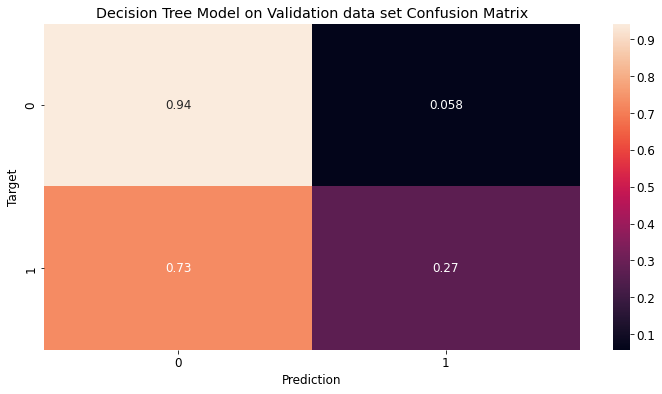

In [187]:
# Make predictions and plot of confusion matrix from Decision Tree Model on Validation dataset
preds_valid = predict_and_plot(X_valid, y_valid, tree_model,'Decision Tree Model on Validation data set',normalize='true')

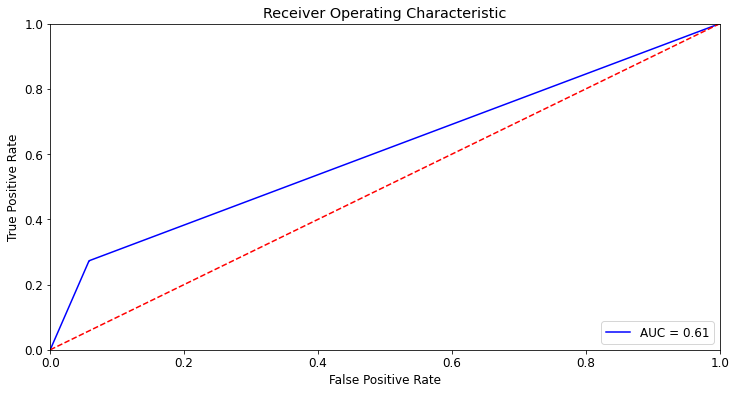

In [188]:
make_auc(tree_model, X_valid, y_valid)

Our decision tree, is clearly **overfitting**. 

Now let's use decision tree with class weight

In [189]:
model = DecisionTreeClassifier(random_state=42, class_weight="balanced" )

In [190]:
# Set entropy as criterion method
model.criterion='gini'

In [191]:
# Train the model 
model.fit(X_train, y_train)

# Make probabilities with train dataset
probs_train = model.predict_proba(X_train)

Accuracy: 99.93%
AUC Score: 1.00


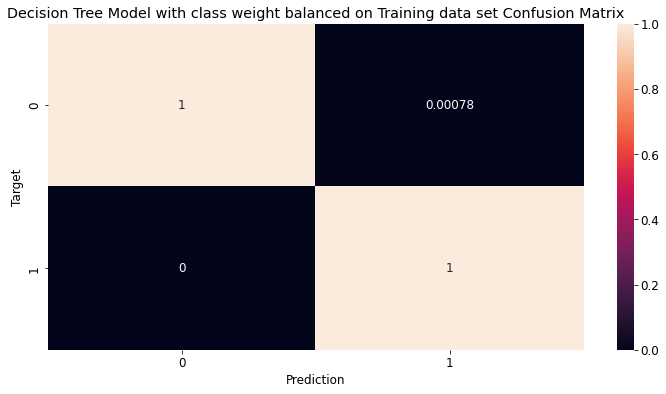

In [192]:
# Make predictions and plot of confusion matrix from Decision Tree Model with class weight balanced on Training dataset
preds_train = predict_and_plot(X_train, y_train, model,'Decision Tree Model with class weight balanced on Training data set',normalize='true')

Accuracy: 89.74%
AUC Score: 0.59


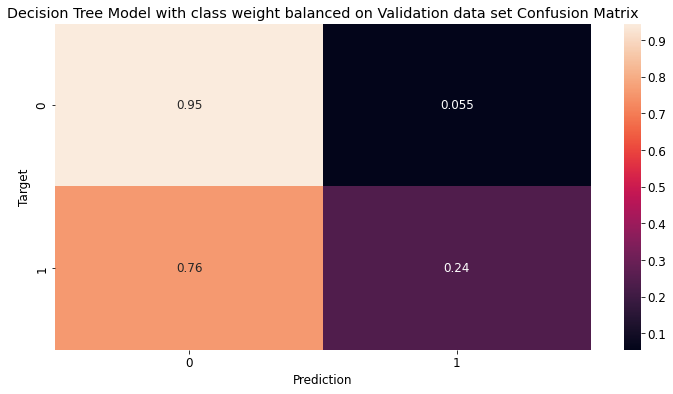

In [193]:
# Make predictions and plot of confusion matrix from Decision Tree Model with class weight balanced on Validation dataset
preds_valid = predict_and_plot(X_valid, y_valid, model,'Decision Tree Model with class weight balanced on Validation data set',normalize='true')

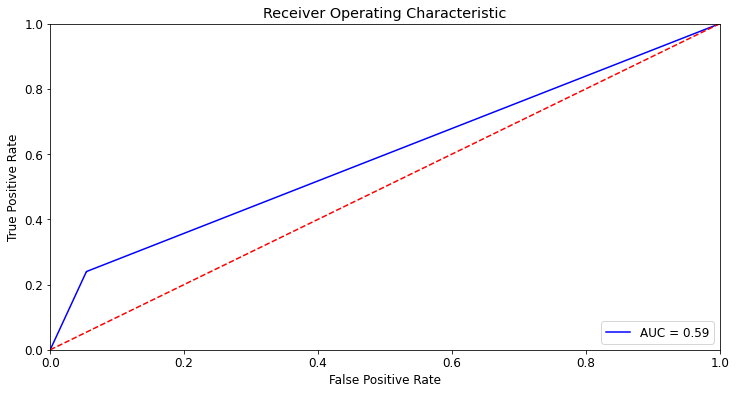

In [194]:
make_auc(model, X_valid, y_valid)

We will go ahead and use the model with class weight balanced

#### Visualization

We can visualize the decision tree _learned_ from the training data.

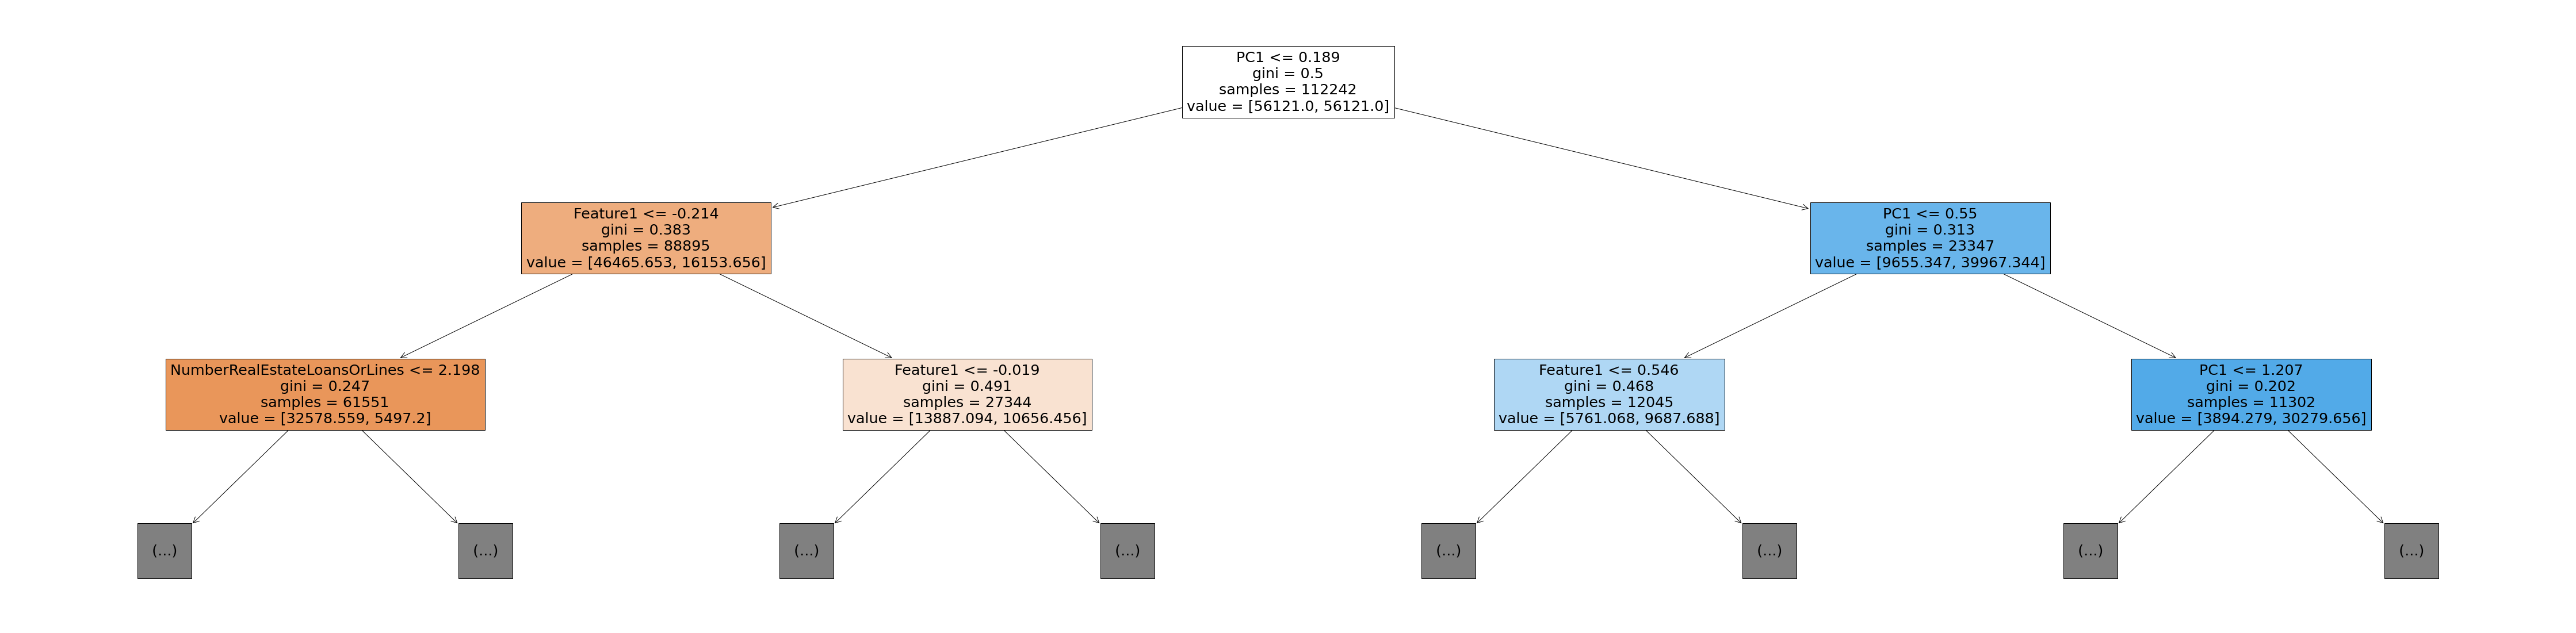

In [195]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [196]:
model.tree_.max_depth

56

We can also display the tree as text, which can be easier to follow for deeper trees.

In [197]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- PC1 <= 0.19
|   |--- Feature1 <= -0.21
|   |   |--- NumberRealEstateLoansOrLines <= 2.20
|   |   |   |--- NumberOfOpenCreditLinesAndLoans <= 0.01
|   |   |   |   |--- age <= -0.26
|   |   |   |   |   |--- PC1 <= 0.07
|   |   |   |   |   |   |--- PC1 <= 0.00
|   |   |   |   |   |   |   |--- age <= -1.61
|   |   |   |   |   |   |   |   |--- PC2 <= -0.03
|   |   |   |   |   |   |   |   |   |--- MonthlyIncomePerPerson <= -0.14
|   |   |   |   |   |   |   |   |   |   |--- DebtRatio <= -0.17
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- DebtRatio >  -0.17
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- MonthlyIncomePerPerson >  -0.14
|   |   |   |   |   |   |   |   |   |   |--- PC2 <= -0.81
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- PC2 >  -0.81
|   |   |   |   |   

#### Hyperparameter Tuning and Overfitting

In this section, we'll look at some strategies for reducing overfitting. The process of reducing overfitting is known as _regularlization_.


The `DecisionTreeClassifier` accepts several arguments, some of which can be modified to reduce overfitting.

In [198]:
#?DecisionTreeClassifier

These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are _learned_ from the data. We'll explore a couple of hyperparameters:

- `max_depth`
- `max_leaf_nodes`

##### `max_depth`

By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, which may lead to better generalization

In [199]:
model = DecisionTreeClassifier(max_depth=3, random_state=42, class_weight="balanced")

In [200]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)

Accuracy: 70.47%
AUC Score: 0.76


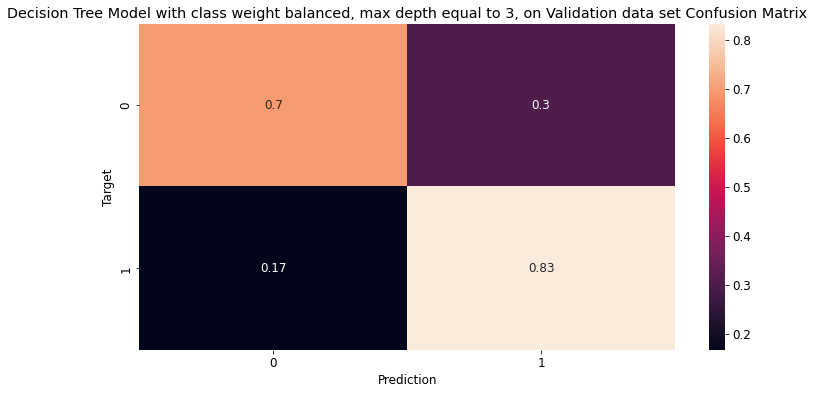

In [201]:
# Make predictions and plot of confusion matrix from Decision Tree Model with class weight balanced, max depth equal to 3, on Validation dataset
preds_valid = predict_and_plot(X_valid, y_valid, model,'Decision Tree Model with class weight balanced, max depth equal to 3, on Validation data set',normalize='true')

Great, while the training accuracy of the model has gone down, the validation accuracy of the model has increased significantly.

In [202]:
model.classes_

array([0, 1])

In [203]:
str(model.classes_.tolist())

'[0, 1]'

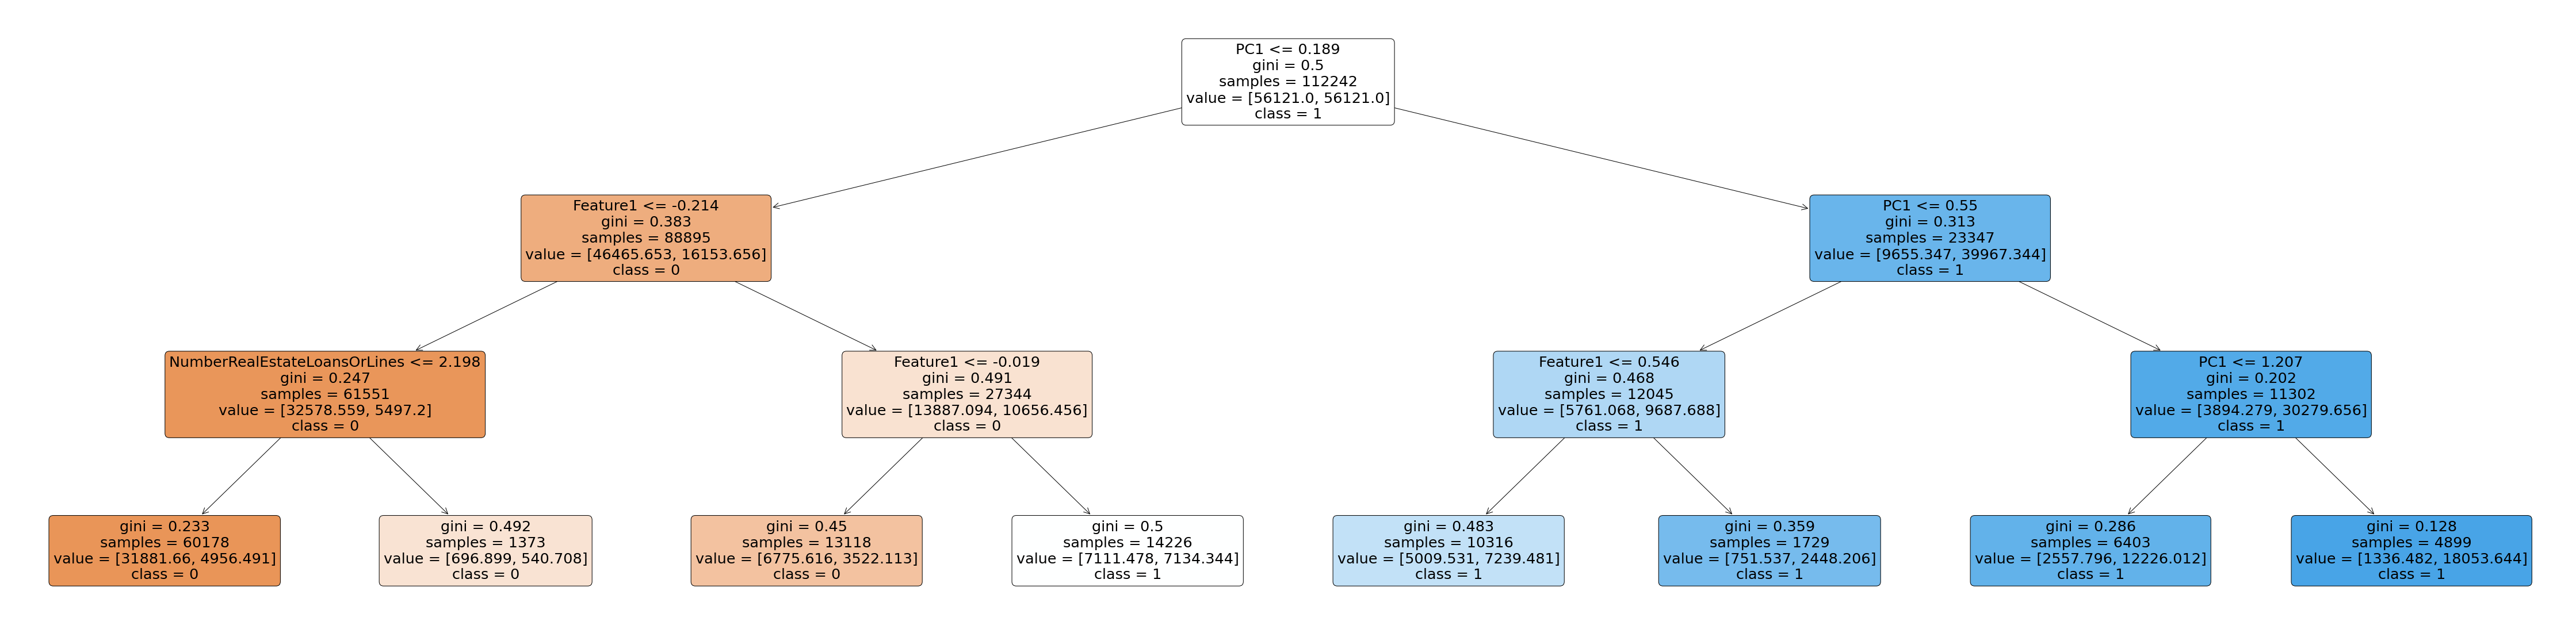

In [204]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=3, filled=True, rounded=True, class_names=['0','1']);

We should study the decision tree diagram carefully and understand what each of the terms `gini`, `samples`, `value` and `class` mean.

In [205]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- PC1 <= 0.19
|   |--- Feature1 <= -0.21
|   |   |--- NumberRealEstateLoansOrLines <= 2.20
|   |   |   |--- class: 0
|   |   |--- NumberRealEstateLoansOrLines >  2.20
|   |   |   |--- class: 0
|   |--- Feature1 >  -0.21
|   |   |--- Feature1 <= -0.02
|   |   |   |--- class: 0
|   |   |--- Feature1 >  -0.02
|   |   |   |--- class: 1
|--- PC1 >  0.19
|   |--- PC1 <= 0.55
|   |   |--- Feature1 <= 0.55
|   |   |   |--- class: 1
|   |   |--- Feature1 >  0.55
|   |   |   |--- class: 1
|   |--- PC1 >  0.55
|   |   |--- PC1 <= 1.21
|   |   |   |--- class: 1
|   |   |--- PC1 >  1.21
|   |   |   |--- class: 1



In [206]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42, class_weight='balanced')
    model.fit(X_train, y_train)
    
    preds_train = model.predict(X_train)
    preds_valid = model.predict(X_valid)

    train_acc = 1 - roc_auc_score(y_train, preds_train, average='weighted')
    val_acc = 1 - roc_auc_score(y_valid, preds_valid, average='weighted')

    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [207]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 10)])

CPU times: user 9.62 s, sys: 42.8 ms, total: 9.67 s
Wall time: 10.5 s


In [208]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.229941,0.242648
1,2,0.229941,0.242648
2,3,0.229737,0.235716
3,4,0.221146,0.236644
4,5,0.212975,0.231130
5,6,0.210649,0.230840
6,7,0.205187,0.229358
7,8,0.198412,0.234053
8,9,0.190745,0.241260


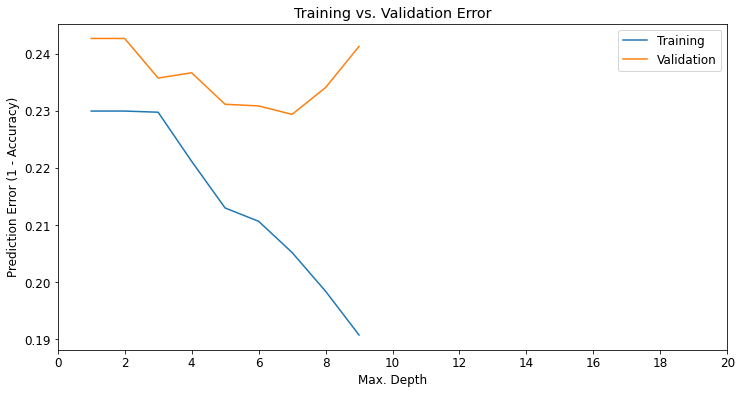

In [209]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

This is a common pattern we see with all machine learning algorithms:

<img src="https://i.imgur.com/EJCrSZw.png" width="480">





We continue to tune other hyperparameters to find the optimal fit. In the above case, it appears that a maximum depth of 6 results in the lowest validation error.

In [210]:
model = DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42).fit(X_train, y_train)

Accuracy: 79.26%
AUC Score: 0.77


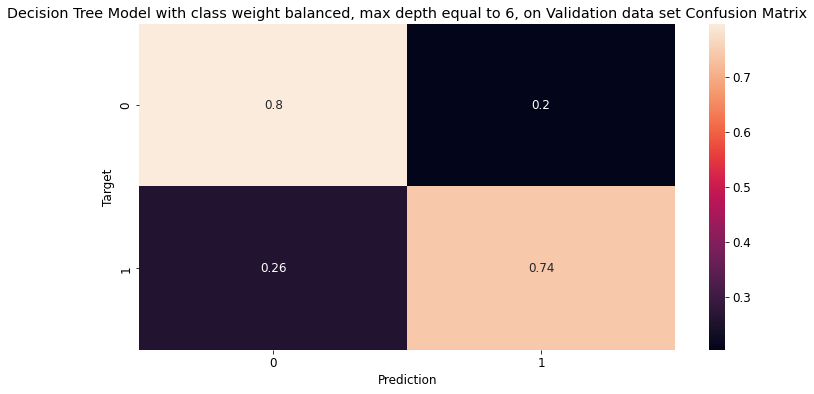

In [211]:
# Make predictions and plot of confusion matrix from Decision Tree Model with class weight balanced, max depth equal to 6, on Validation dataset
preds_valid = predict_and_plot(X_valid, y_valid, model,'Decision Tree Model with class weight balanced, max depth equal to 6, on Validation data set',normalize='true')

##### `max_leaf_nodes`

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths. 

Let's experiment with different leaf nodes using a helper function.

In [212]:
def max_leaf_nodes_error(mld):
    model = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=mld, random_state=42, class_weight='balanced')
    model.fit(X_train, y_train)
    
    preds_train = model.predict(X_train)
    preds_valid = model.predict(X_valid)

    train_acc = 1 - roc_auc_score(y_train, preds_train, average='weighted')
    val_acc = 1 - roc_auc_score(y_valid, preds_valid, average='weighted')

    return {'Max Leaf Nodes': mld, 'Training Error': train_acc, 'Validation Error': val_acc}

In [213]:
%%time
errors_df = pd.DataFrame([max_leaf_nodes_error(mld) for mld in range(5, 100, 2)])

CPU times: user 43.6 s, sys: 140 ms, total: 43.7 s
Wall time: 43.6 s


In [214]:
errors_df

,Max Leaf Nodes,Training Error,Validation Error
0,5,0.229737,0.235716
1,7,0.229737,0.235716
2,9,0.221263,0.232894
3,11,0.219071,0.231224
4,13,0.217209,0.227884
5,15,0.217209,0.227884
6,17,0.217092,0.231634
7,19,0.215642,0.231362
8,21,0.215642,0.231362
9,23,0.214460,0.231685


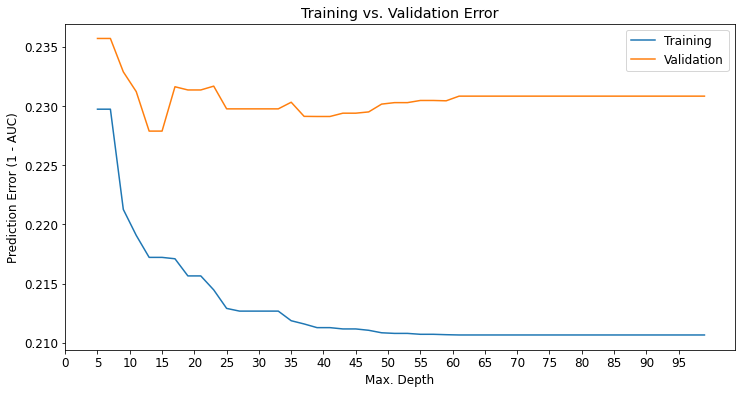

In [215]:
plt.figure()
plt.plot(errors_df['Max Leaf Nodes'], errors_df['Training Error'])
plt.plot(errors_df['Max Leaf Nodes'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0, 100, 5))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - AUC)')
plt.legend(['Training', 'Validation'])

The combination of `max_depth=6` and `max_leaf_nodes=23` is the result with the highest validation AUC.

In [216]:
model = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=23, random_state=42, class_weight="balanced")

In [217]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=23,
                       random_state=42)

Accuracy: 80.40%
AUC Score: 0.79


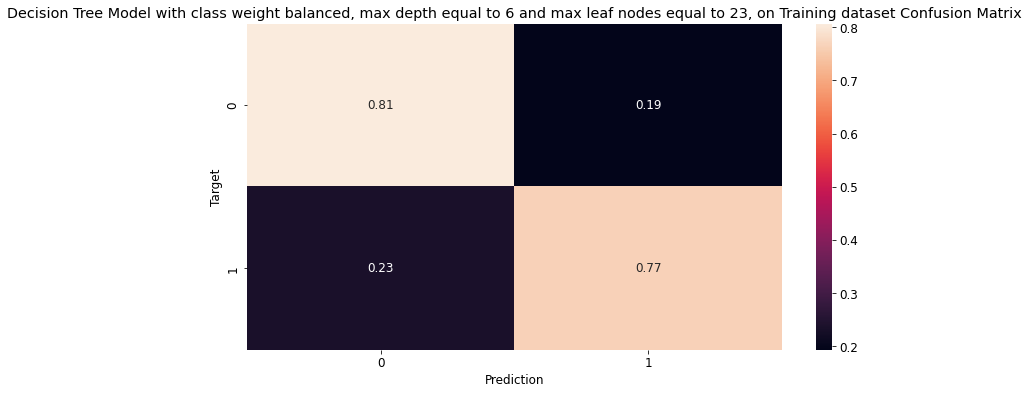

In [218]:
# Make predictions and plot of confusion matrix from Decision Tree Model with class weight balanced, max depth equal to 6 and max leaf nodes equal to 23, on Training dataset
preds_valid = predict_and_plot(X_train, y_train, model,'Decision Tree Model with class weight balanced, max depth equal to 6 and max leaf nodes equal to 23, on Training dataset')

Accuracy: 79.84%
AUC Score: 0.77


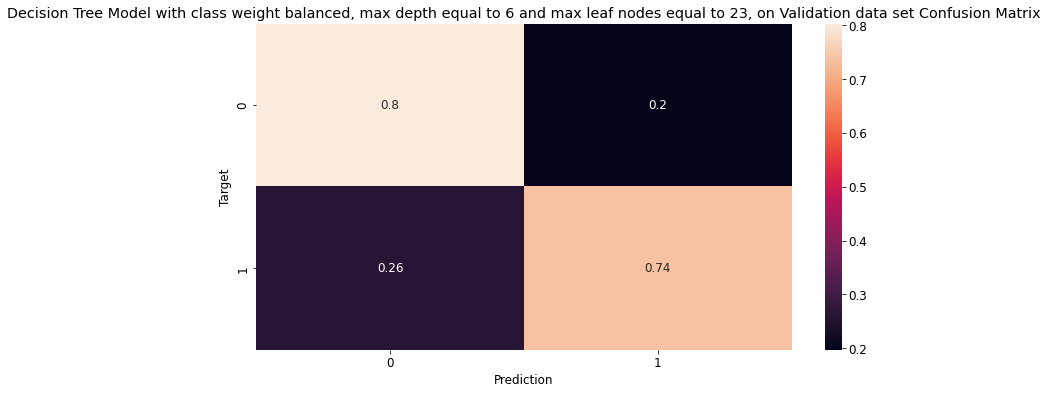

In [219]:
# Make predictions and plot of confusion matrix from Decision Tree Model with class weight balanced, max depth equal to 6 and max leaf nodes equal to 23, on Validation dataset
preds_valid = predict_and_plot(X_valid, y_valid, model,'Decision Tree Model with class weight balanced, max depth equal to 6 and max leaf nodes equal to 23, on Validation data set')

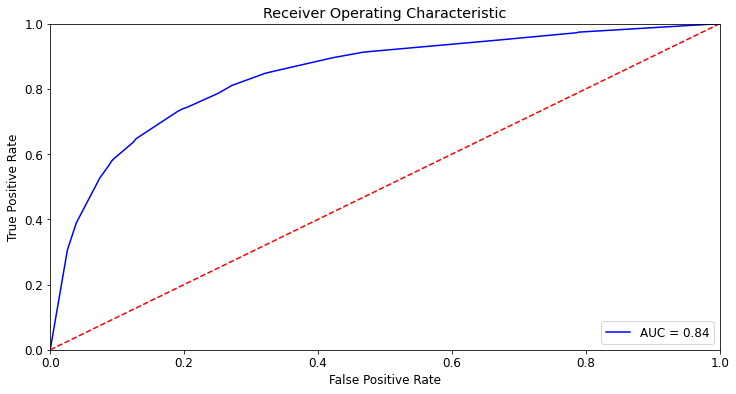

In [220]:
make_auc(model, X_valid, y_valid)

In [221]:
preds_test = model.predict(X_test)

In [222]:
#Use helper function, submit, to create a file with the predicted target
submit(preds_test, 'decision_tree_tuned_submission.csv')

,Id,Probability
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
101498,101499,0
101499,101500,0
101500,101501,0
101501,101502,1


#### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [223]:
model.feature_importances_

array([0.0014645 , 0.        , 0.00279315, 0.        , 0.01416862,
       0.        , 0.01118887, 0.00715427, 0.0097571 , 0.        ,
       0.81131078, 0.00323296, 0.        , 0.13892974])

Let's turn this into a dataframe and visualize the most important features.

In [224]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [225]:
importance_df.head(10)

,feature,importance
10,PC1,0.811311
13,Feature1,0.138930
4,age,0.014169
6,DebtRatio,0.011189
8,NumberRealEstateLoansOrLines,0.009757
7,NumberOfOpenCreditLinesAndLoans,0.007154
11,PC2,0.003233
2,NumberOfTimes90DaysLate,0.002793
0,RevolvingUtilizationOfUnsecuredLines,0.001464
1,NumberOfTime30-59DaysPastDueNotWorse,0.000000


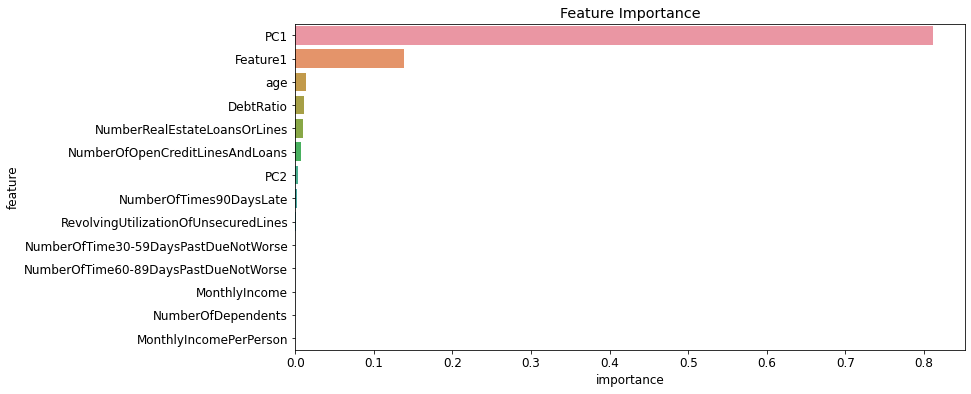

In [226]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(20), x='importance', y='feature');

Let's save our work before continuing.

In [227]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/joaopedrosdmm/credit-score


'https://jovian.ai/joaopedrosdmm/credit-score'

### Random Forest

While tuning the hyperparameters of a single decision tree may lead to some improvements, a much more effective strategy is to combine the results of several decision trees trained with slightly different parameters. This is called a random forest model. 

The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of their errors will cancel out.

A random forest works by averaging/combining the results of several decision trees:

<img src="https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif" width="640">




#### Train


In [228]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

`n_jobs` allows the random forest to use mutiple parallel workers to train decision trees, and `random_state=42` ensures that the we get the same results for each execution.

In [229]:
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

Accuracy: 99.96%
AUC Score: 1.00


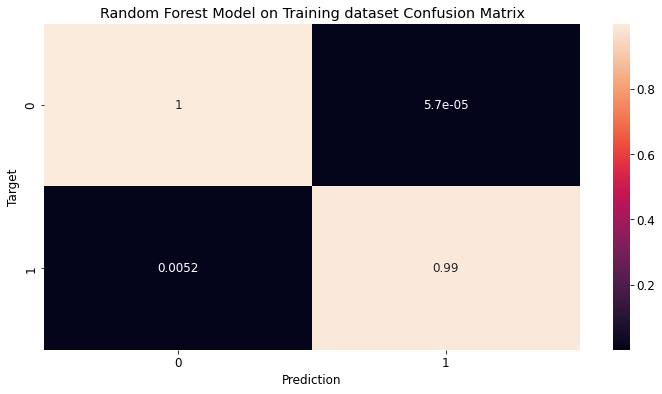

In [230]:
# Predictions and plot of confusion matrix from Random Forest Model on Training dataset
preds_train = predict_and_plot(X_train, y_train, model,'Random Forest Model on Training dataset',normalize='true')

Accuracy: 93.35%
AUC Score: 0.59


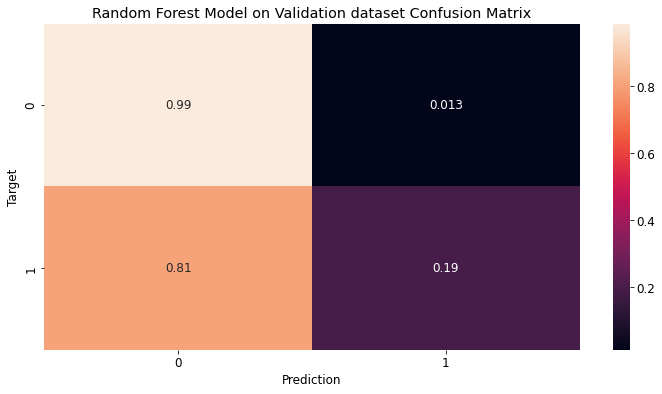

In [231]:
# Predictions and plot of confusion matrix from Random Forest Model on Training dataset
preds_valid = predict_and_plot(X_valid, y_valid, model,'Random Forest Model on Validation dataset',normalize='true')

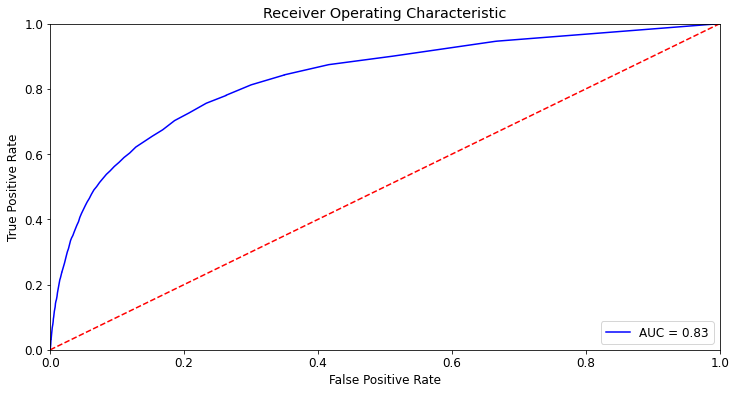

In [232]:
make_auc(model, X_valid, y_valid)

This general technique of combining the results of many models is called "ensembling", it works because most errors of individual models cancel out on averaging. Here's what it looks like visually:

<img src="https://i.imgur.com/qJo8D8b.png" width="640">


We can also look at the probabilities for the predictions. The probability of a class is simply the fraction of trees which that predicted the given class.

In [233]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.95, 0.05],
       [1.  , 0.  ],
       [0.97, 0.03],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01]])

We can can access individual decision trees using `model.estimators_`

In [234]:
model.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

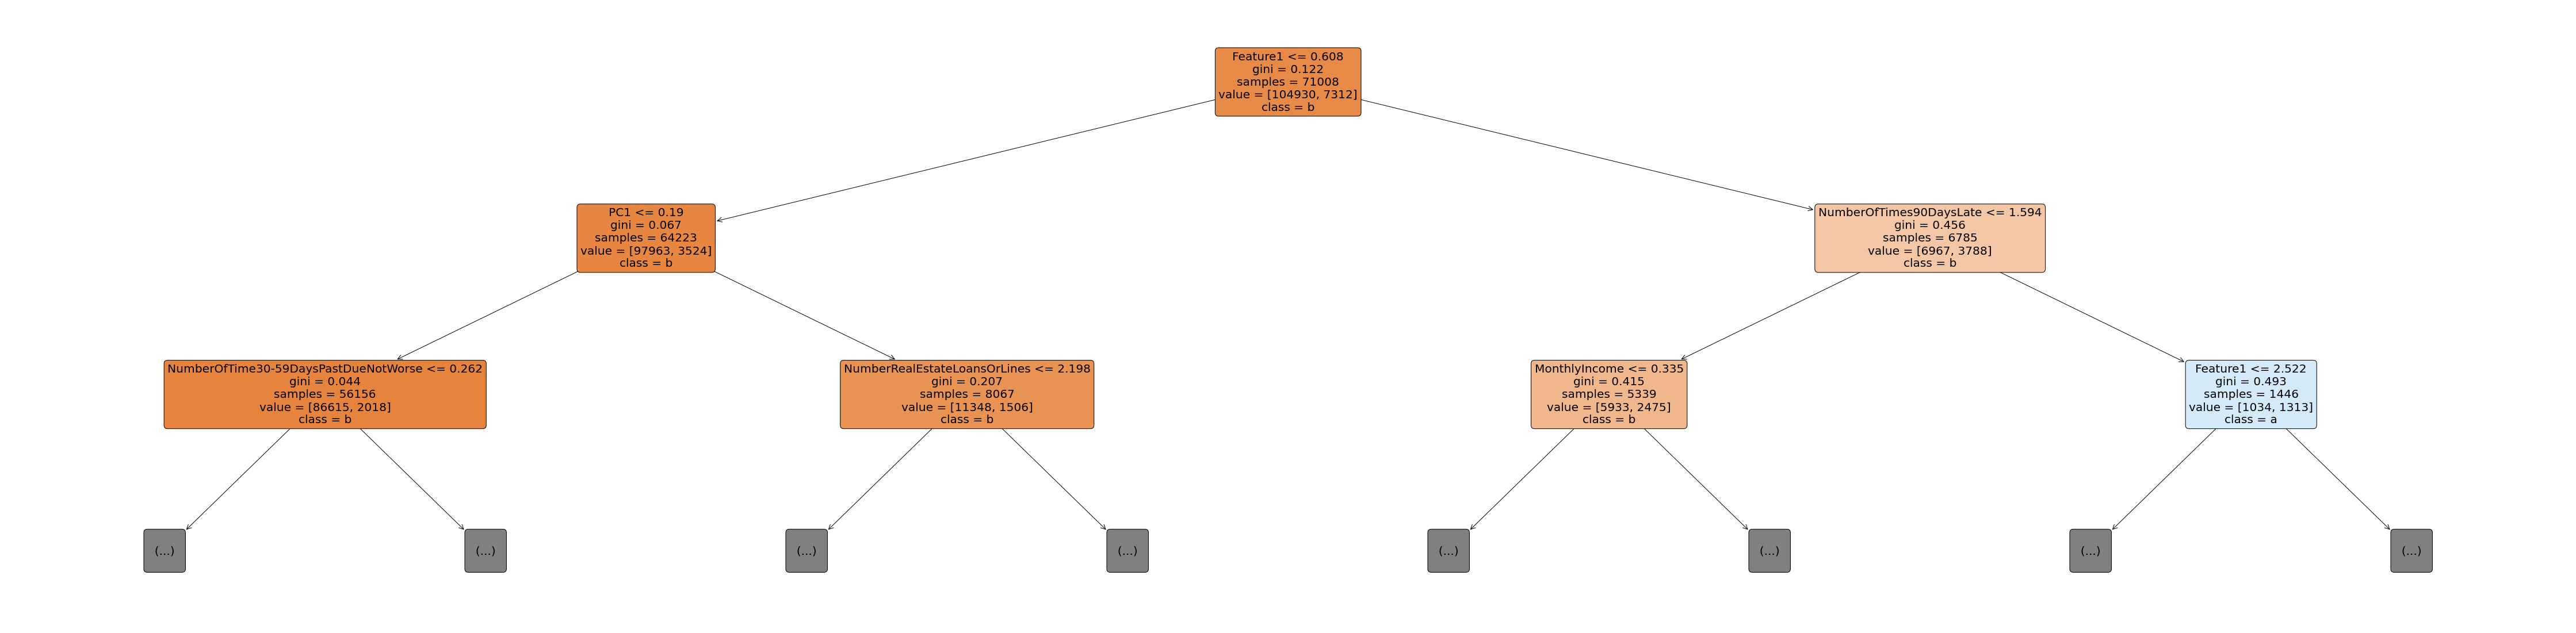

In [235]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names="balanced");

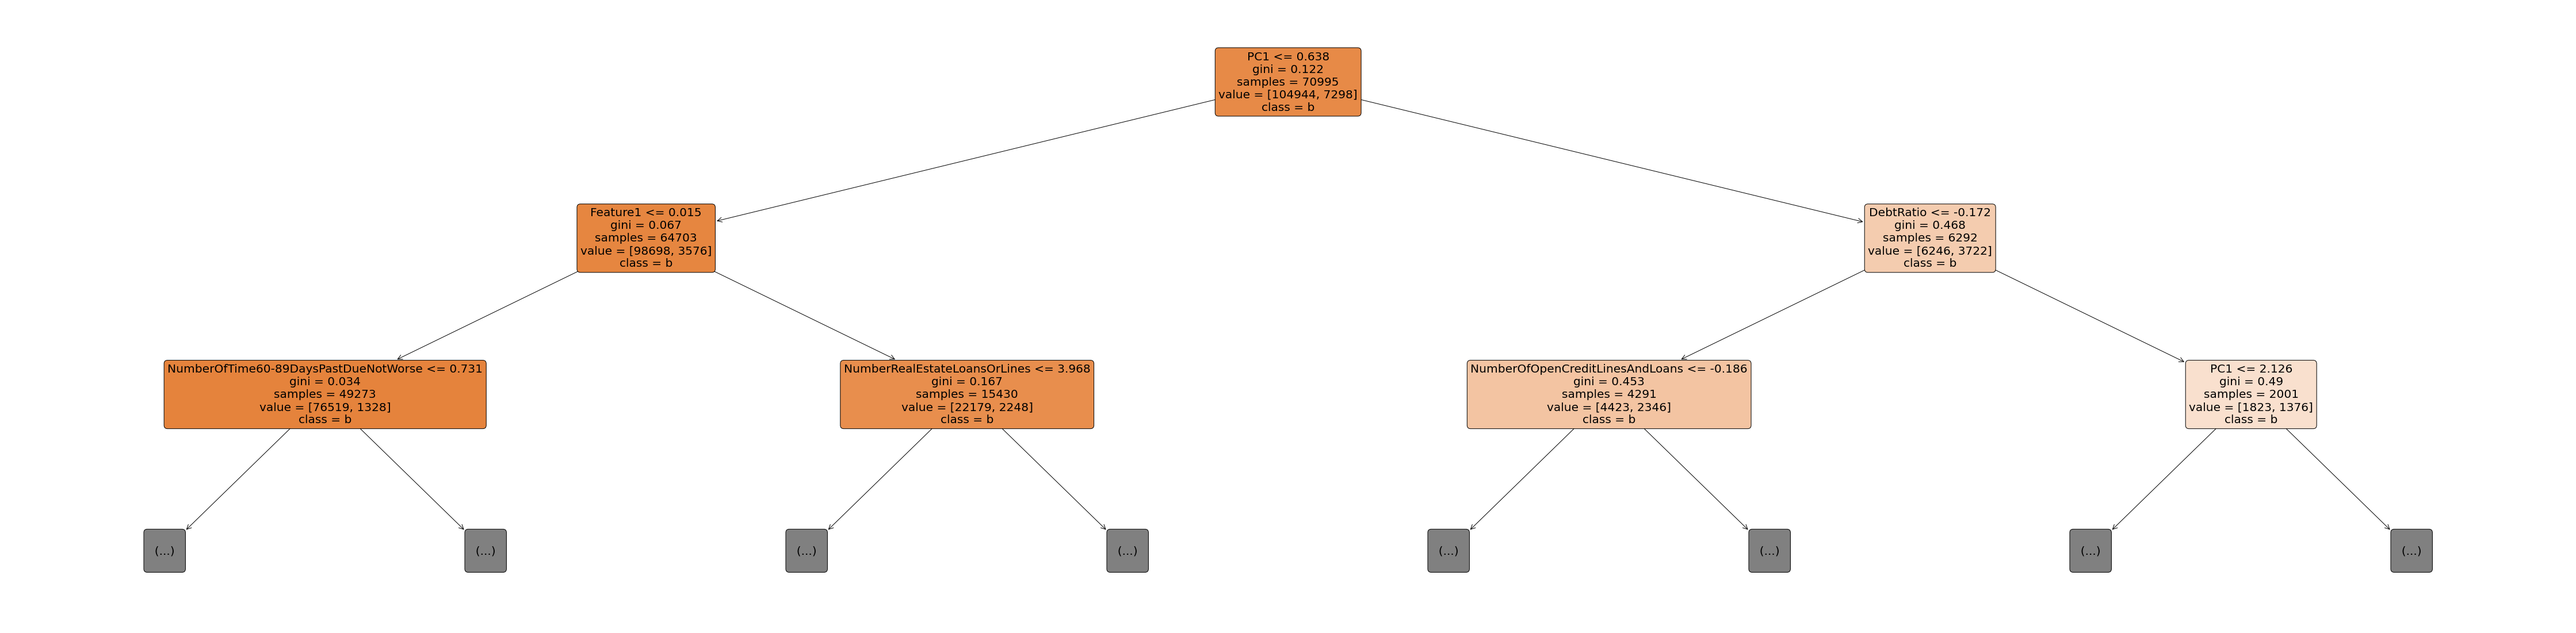

In [236]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names="balanced");

In [237]:
len(model.estimators_)

100

#### Hyperparameter Tuning

In [238]:
#?RandomForestClassifier

In [239]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, y_train)

Accuracy: 99.96%
AUC Score: 1.00


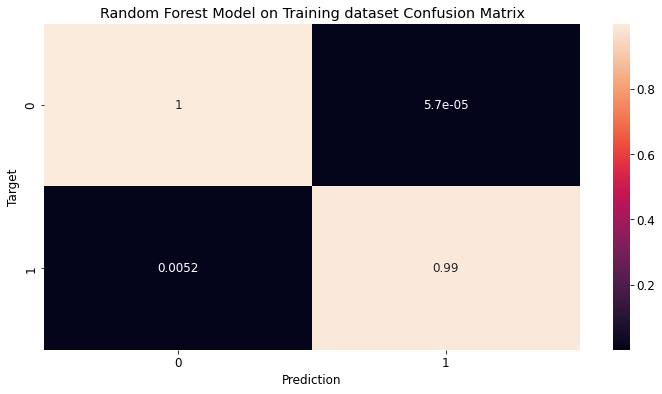

In [240]:
# Predictions and plot of confusion matrix from Random Forest Model on Training dataset
preds_train = predict_and_plot(X_train, y_train, base_model,'Random Forest Model on Training dataset',normalize='true')

Accuracy: 93.35%
AUC Score: 0.59


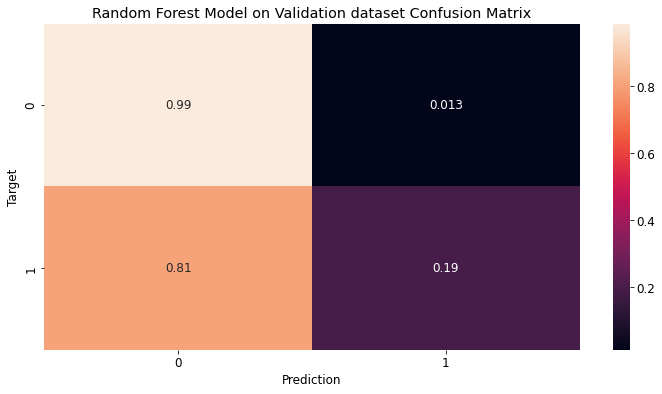

In [241]:
# Predictions and plot of confusion matrix from Random Forest Model on Validation dataset
preds_valid = predict_and_plot(X_valid, y_valid, base_model,'Random Forest Model on Validation dataset')

We can use this as a benchmark for hyperparmeter tuning.

##### Helper Fuctions

Let's define a helper function `test_params` to make it easy to test hyperparameters.

In [242]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, y_train)

    preds_train = model.predict(X_train)
    preds_valid = model.predict(X_valid)

    train_auc = 1 - roc_auc_score(y_train, preds_train, average='weighted')
    val_auc = 1 - roc_auc_score(y_valid, preds_valid, average='weighted')

    return {'Train Error (AUC)': train_auc, 'Validation Error (AUC)': val_auc}

Let's define a helper function `plot_error` to make it easy to plot and visualize

In [243]:
def plot_error(name, x_max, interval):
  plt.figure()
  plt.plot(errors_df[name], errors_df['Training Error'])
  plt.plot(errors_df[name], errors_df['Validation Error'])
  plt.title('Training vs. Validation Error')
  plt.xticks(range(0, x_max, interval))
  plt.xlabel(name)
  plt.ylabel('Prediction Error (1 - Accuracy)')
  plt.legend(['Training', 'Validation'])
  return plt.show()

##### `class_weight`

In [244]:
model.classes_

array([0, 1])

In [245]:
test_params(class_weight='balanced_subsample')

{'Train Error (AUC)': 0.0008167382322277206,
 'Validation Error (AUC)': 0.42569709108587694}

In [246]:
test_params(class_weight='balanced')

{'Train Error (AUC)': 0.0008836457660158503,
 'Validation Error (AUC)': 0.4271626898420847}

The optimal value of `class_weight` for this dataset is "balanced".

##### `max_depth`

The `max_depth` argument is passed directly to each decision tree, and controls the maximum depth of each tree. By default, no maximum depth is specified, which is why each tree has a training accuracy of 100%. we will specify a `max_depth` to reduce overfitting.


In [247]:
def max_depth_error(md):
    model =RandomForestClassifier(max_depth=md, class_weight="balanced", random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    
    preds_train = model.predict(X_train)
    preds_valid = model.predict(X_valid)

    train_acc = 1 - roc_auc_score(y_train, preds_train, average='weighted')
    val_acc = 1 - roc_auc_score(y_valid, preds_valid, average='weighted')

    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [248]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 20)])

CPU times: user 9min 42s, sys: 3.07 s, total: 9min 46s
Wall time: 5min 7s


In [249]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.227735,0.238849
1,2,0.223869,0.234632
2,3,0.222110,0.232410
3,4,0.218500,0.227966
4,5,0.214612,0.226468
5,6,0.208607,0.225758
6,7,0.203888,0.224489
7,8,0.196860,0.225366
8,9,0.187140,0.230528
9,10,0.177096,0.235286


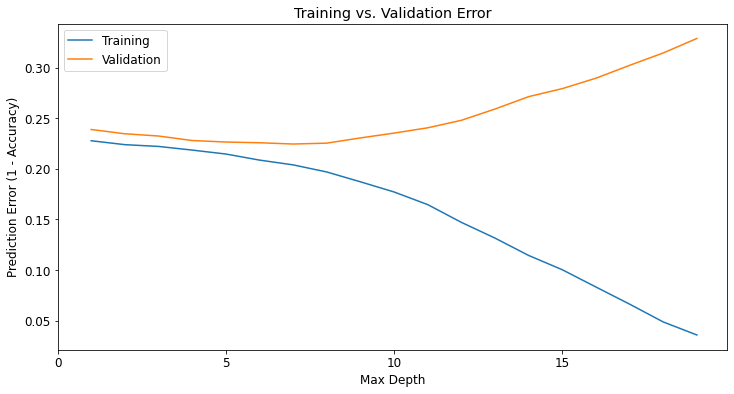

In [250]:
 plot_error('Max Depth', 20, 5)

The optimal values of `max_depth` is 7.

> Bloco com avanço



##### `max_leaf_nodes`

These arguments are passed directly to each decision tree, and control the maximum depth and max. no leaf nodes of each tree respectively. By default, no maximum depth is specified, which is why each tree has a training accuracy of 100%. You can specify a `max_depth` to reduce overfitting.


In [251]:
def max_leaf_nodes_error(me):
    model =RandomForestClassifier(max_leaf_nodes=me, max_depth=7, class_weight="balanced", random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    
    preds_train = model.predict(X_train)
    preds_valid = model.predict(X_valid)

    train_acc = 1 - roc_auc_score(y_train, preds_train, average='weighted')
    val_acc = 1 - roc_auc_score(y_valid, preds_valid, average='weighted')

    return {'Max Leaf Nodes': me, 'Training Error': train_acc, 'Validation Error': val_acc}

In [252]:
%%time
errors_df = pd.DataFrame([max_leaf_nodes_error(me) for me in range(10, 70, 2)])

CPU times: user 11min 48s, sys: 3.84 s, total: 11min 51s
Wall time: 6min 14s


In [253]:
errors_df

,Max Leaf Nodes,Training Error,Validation Error
0,10,0.217839,0.227982
1,12,0.216111,0.227250
2,14,0.215529,0.226591
3,16,0.215415,0.226326
4,18,0.214560,0.224570
5,20,0.214236,0.225415
6,22,0.212818,0.225405
7,24,0.212503,0.225168
8,26,0.212380,0.224666
9,28,0.212194,0.224265


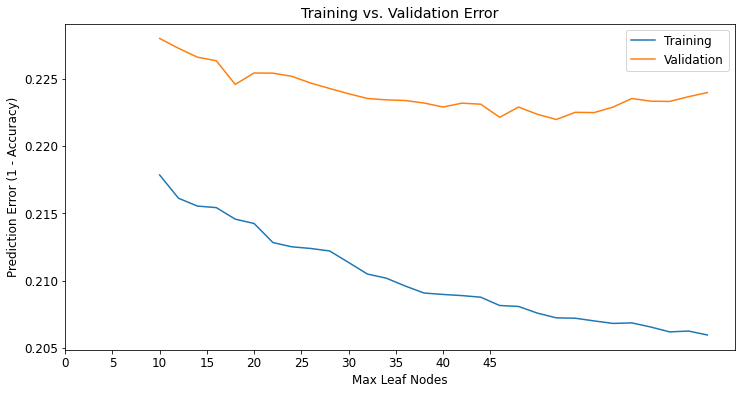

In [254]:
 plot_error('Max Leaf Nodes', 50, 5)

The optimal values of `max_leaf_nodes` is 30

##### `n_estimators`

This argument controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators. As a general rule, it's best to have as few estimators as needed. 

In [255]:
def n_estimators_error(ne):
    model = RandomForestClassifier( n_estimators=ne, max_leaf_nodes=30, max_depth=7, class_weight="balanced", random_state=42, n_jobs=-1).fit(X_train, y_train)
    
    preds_train = model.predict(X_train)
    preds_valid = model.predict(X_valid)

    train_auc = 1 - roc_auc_score(y_train, preds_train, average='weighted')
    val_auc = 1 - roc_auc_score(y_valid, preds_valid, average='weighted')

    return {'Number of Estimators': ne, 'Training Error': train_auc, 'Validation Error': val_auc}

In [256]:
%%time
errors_df = pd.DataFrame([n_estimators_error(ne) for ne in range(1, 30, 1)])

CPU times: user 1min 42s, sys: 641 ms, total: 1min 42s
Wall time: 1min


In [257]:
errors_df

,Number of Estimators,Training Error,Validation Error
0,1,0.222055,0.233848
1,2,0.215843,0.231714
2,3,0.215248,0.231657
3,4,0.216090,0.231091
4,5,0.214796,0.229902
5,6,0.214147,0.229988
6,7,0.213698,0.228325
7,8,0.211936,0.228318
8,9,0.211941,0.227927
9,10,0.210627,0.226859


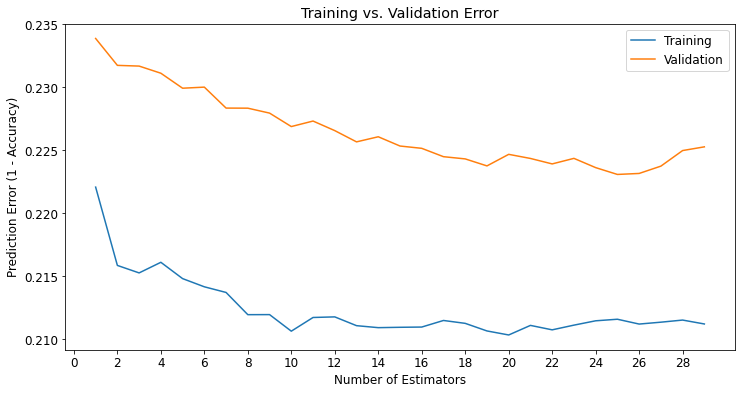

In [258]:
 plot_error('Number of Estimators', 30, 2)

The optimal values of `n_estimators` is 23



Let's define a new helper function `test_params` to the new hyperparameters.

In [259]:
def test_params(**params):
    model = RandomForestClassifier( **params, n_estimators=23, max_leaf_nodes=30, max_depth=6, class_weight="balanced", random_state=42, n_jobs=-1).fit(X_train, y_train)

    preds_train = model.predict(X_train)
    preds_valid = model.predict(X_valid)

    train_auc = 1 - roc_auc_score(y_train, preds_train, average='weighted')
    val_auc = 1 - roc_auc_score(y_valid, preds_valid, average='weighted')

    return {'Train Error (AUC)': train_auc, 'Validation Error (AUC)': val_auc}

##### `max_features`

Instead of picking all features (columns) for every split, we can specify that only a fraction of features be chosen randomly to figure out a split.

Notice that the default value `auto` causes only $\sqrt{n}$ out of total features ( $n$ ) to be chosen randomly at each split. This is the reason each decision tree in the forest is different. While it may seem counterintuitive, choosing all features for every split of every tree will lead to identical trees, so the random forest will not generalize well. 

In [260]:
test_params(max_features='auto')

{'Train Error (AUC)': 0.21284187143240052,
 'Validation Error (AUC)': 0.22481612248253613}

In [261]:
test_params(max_features='log2')

{'Train Error (AUC)': 0.21284187143240052,
 'Validation Error (AUC)': 0.22481612248253613}

In [262]:
test_params(max_features=3)

{'Train Error (AUC)': 0.21284187143240052,
 'Validation Error (AUC)': 0.22481612248253613}

In [263]:
test_params(max_features=6)

{'Train Error (AUC)': 0.20917552326958122,
 'Validation Error (AUC)': 0.22329333191641254}

In [264]:
test_params(max_features=8)

{'Train Error (AUC)': 0.20990466844151046,
 'Validation Error (AUC)': 0.2221793489274414}

The optimal values of `max_features` for this dataset is "auto".

##### `min_samples_split` and `min_samples_leaf`

By default, the decision tree classifier tries to split every node that has 2 or more. You can increase the values of these arguments to change this behavior and reduce overfitting, especially for very large datasets.

In [265]:
test_params(min_samples_split=3, min_samples_leaf=2)

{'Train Error (AUC)': 0.21284187143240052,
 'Validation Error (AUC)': 0.22481612248253613}

In [266]:
test_params(min_samples_split=5, min_samples_leaf=5)

{'Train Error (AUC)': 0.21273697242035938,
 'Validation Error (AUC)': 0.2245760310271756}

In [267]:
test_params(min_samples_split=7, min_samples_leaf=7)

{'Train Error (AUC)': 0.21277515165276595,
 'Validation Error (AUC)': 0.22471576981458885}

In [268]:
test_params(min_samples_split=10, min_samples_leaf=10)

{'Train Error (AUC)': 0.21291373912439326,
 'Validation Error (AUC)': 0.2246584254329046}

It seems that tuning `min_samples_split` and `min_samples_leaf`, doesn't result in improvement of AUC.

##### `min_impurity_decrease`

This argument is used to control the threshold for splitting nodes. A node will be split if this split induces a decrease of the impurity (Gini index) greater than or equal to this value. It's default value is 0, and you can increase it to reduce overfitting.



In [269]:
test_params(min_impurity_decrease=1e-5)

{'Train Error (AUC)': 0.21284187143240052,
 'Validation Error (AUC)': 0.22481612248253613}

In [270]:
test_params(min_impurity_decrease=1e-2)

{'Train Error (AUC)': 0.22460112099422158,
 'Validation Error (AUC)': 0.23626505712416968}

It seems that tuning `min_samples_split` and `min_samples_leaf`, doesn't result in improvement of AUC.

The optimal values of `min_impurity_decrease` for this dataset.

##### `bootstrap`, `max_samples` 

By default, a random forest doesn't use the entire dataset for training each decision tree. Instead it applies a technique called bootstrapping. For each tree, rows from the dataset are picked one by one randomly, with replacement i.e. some rows may not show up at all, while some rows may show up multiple times.


Bootstrapping helps the random forest generalize better, because each decision tree only sees a fraction of th training set, and some rows randomly get higher weightage than others.

In [271]:
test_params(bootstrap=False)

{'Train Error (AUC)': 0.21153842653719657,
 'Validation Error (AUC)': 0.2257662320906597}

When bootstrapping is enabled, you can also control the number or fraction of rows to be considered for each bootstrap using `max_samples`. This can further generalize the model.

In [272]:
test_params(max_samples=0.9)

{'Train Error (AUC)': 0.2130000179056155,
 'Validation Error (AUC)': 0.22635687131087823}

Learn more about bootstrapping here: https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710

##### Putting it together

Let's train a random forest with customized hyperparameters based on our learnings.

In [273]:
model = RandomForestClassifier(bootstrap=False, min_samples_split=7, min_samples_leaf=7, max_features=8, n_estimators=23, max_leaf_nodes=30, max_depth=7, class_weight="balanced", random_state=42, n_jobs=-1).fit(X_train, y_train)

Accuracy: 79.85%
AUC Score: 0.79


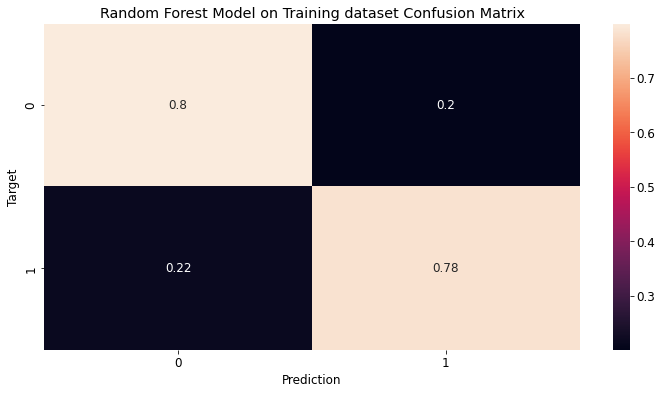

In [274]:
# Predictions and plot of confusion matrix from Random Forest Model on Training dataset
preds_train = predict_and_plot(X_train, y_train, model,'Random Forest Model on Training dataset',normalize='true')

Accuracy: 79.28%
AUC Score: 0.78


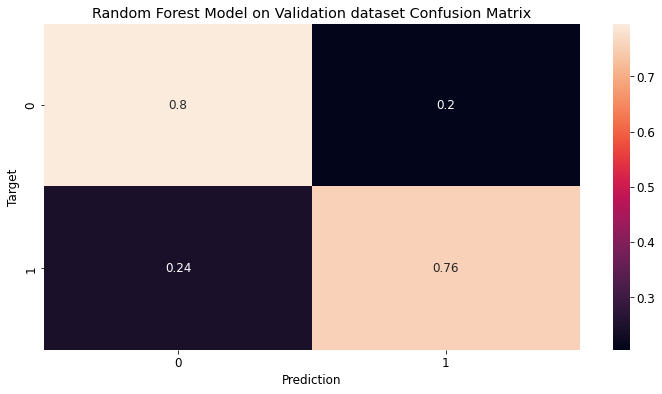

In [275]:
# Predictions and plot of confusion matrix from Random Forest Model on Validation dataset
preds_valid = predict_and_plot(X_valid, y_valid, model,'Random Forest Model on Validation dataset',normalize='true')

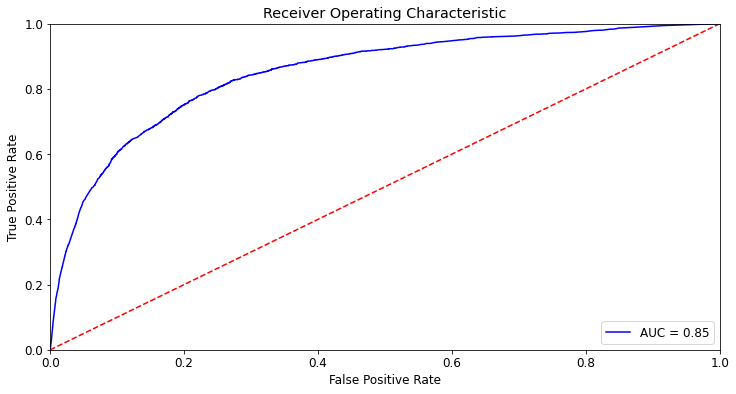

In [276]:
make_auc(model, X_valid, y_valid)

In [277]:
preds_test = model.predict(X_test)

In [278]:
#Use helper function, submit, to create a file with the predicted target
submit(preds_test, 'random_forest_initial_tuned_submission.csv')

,Id,Probability
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
101498,101499,0
101499,101500,0
101500,101501,0
101501,101502,0


We've increased the AUC from 76% with a single decision tree to 77% with a well-tuned random forest. Depending on the dataset and the kind of problem, you may or may not a see a significant improvement with hyperparameter tuning. 

In [279]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/joaopedrosdmm/credit-score


'https://jovian.ai/joaopedrosdmm/credit-score'

##### Feature Importance

Just like decision tree, random forests also assign an "importance" to each feature, by combining the importance values from individual trees.

In [280]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [281]:
importance_df.head(10)

,feature,importance
10,PC1,0.583803
13,Feature1,0.231081
0,RevolvingUtilizationOfUnsecuredLines,0.093696
3,NumberOfTime60-89DaysPastDueNotWorse,0.017018
4,age,0.015717
7,NumberOfOpenCreditLinesAndLoans,0.013975
2,NumberOfTimes90DaysLate,0.009516
11,PC2,0.008903
8,NumberRealEstateLoansOrLines,0.008655
6,DebtRatio,0.008440


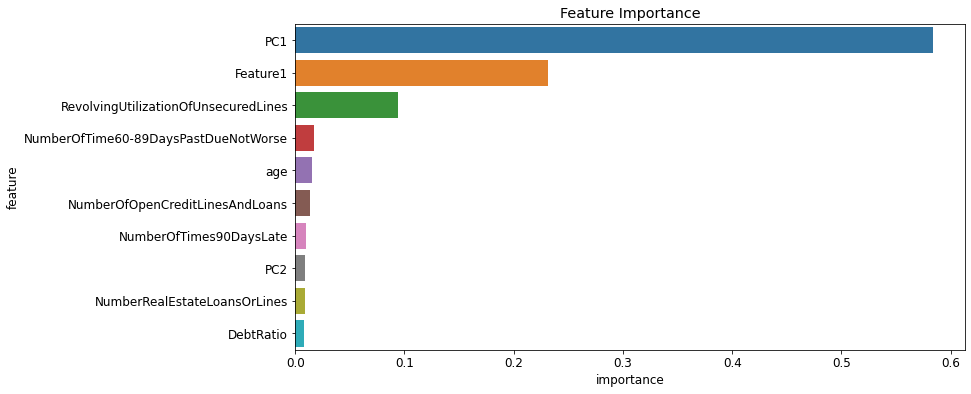

In [282]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Notice that the distribution is a lot less skewed than that for a single decision tree.

In [283]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/joaopedrosdmm/credit-score


'https://jovian.ai/joaopedrosdmm/credit-score'

### XGBoost

XGBoost is a machine learning algorithm using the decision tree ensemble method under the gradient boosting framework.

##### Train

In [284]:
#?XGBClassifier

In [285]:
model = XGBClassifier(n_jobs=-1, 
                      random_state = 42,
                      eval_metric="auc",
                      scale_pos_weight=13.9,
                      n_estimator=1000)

In [286]:
%%time
model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_valid, y_valid)], verbose=False )

CPU times: user 17.9 s, sys: 55.3 ms, total: 17.9 s
Wall time: 9.24 s


XGBClassifier(eval_metric='auc', n_estimator=1000, n_jobs=-1, random_state=42,
              scale_pos_weight=13.9)

* **early_stopping_rounds**, offers a way to automatically find the ideal value for n_estimators. Early stopping causes the model to stop iterating when the validation score stops improving, even if we aren't at the hard stop for n_estimators. It's smart to set a high value for n_estimators and then use early_stopping_rounds to find the optimal time to stop iterating.

Accuracy: 79.71%
AUC Score: 0.79


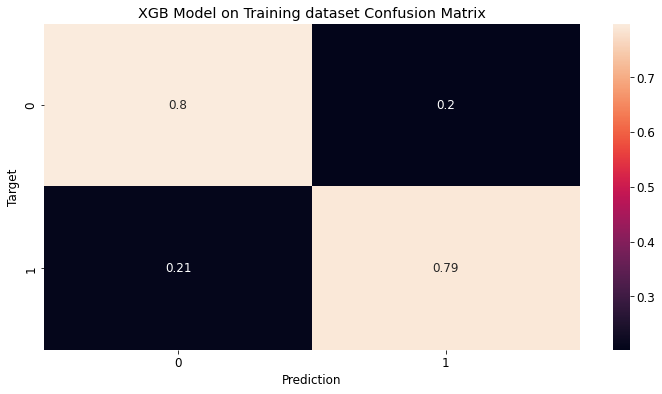

In [287]:
# Predictions and plot of confusion matrix from XGB Model on Training dataset
preds_train = predict_and_plot(X_train, y_train, model,'XGB Model on Training dataset')

Accuracy: 79.21%
AUC Score: 0.78


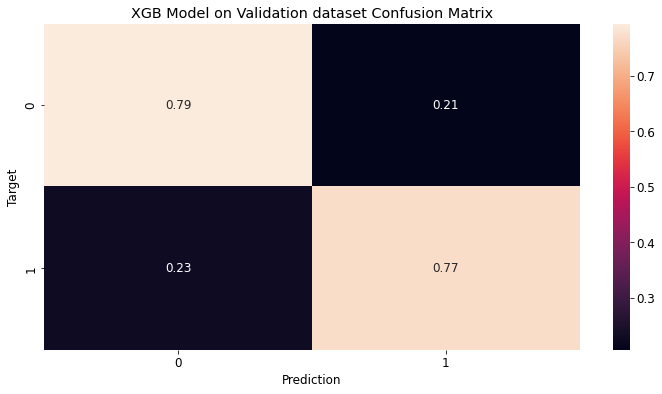

In [288]:
# Predictions and plot of confusion matrix from XGB Model on Validation dataset
preds_valid = predict_and_plot(X_valid, y_valid, model,'XGB Model on Validation dataset')

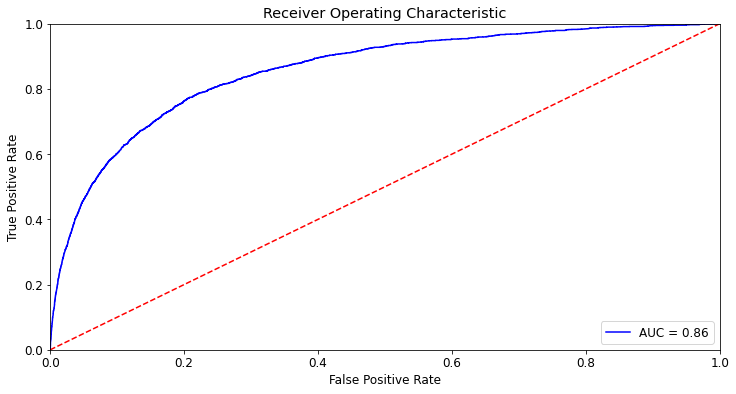

In [289]:
make_auc(model, X_valid, y_valid)

##### Visualization

We can visualize individual trees using `plot_tree` (note: this requires the `graphviz` library to be installed).

In [290]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

#rcParams['figure.figsize'] = 30,30

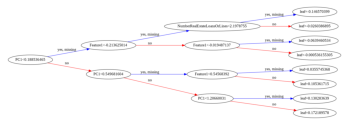

In [291]:
plot_tree(model, rankdir='LR');

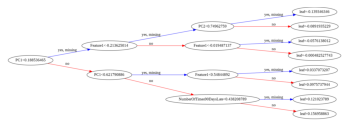

In [292]:
plot_tree(model, rankdir='LR', num_trees=1);

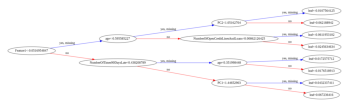

In [293]:
plot_tree(model, rankdir='LR', num_trees=19);

Notice how the trees only compute residuals, and not the actual target value. We can also visualize the tree as text.

In [294]:
trees = model.get_booster().get_dump()

In [295]:
len(trees)

98

In [296]:
print(trees[0])

0:[PC1<0.188536465] yes=1,no=2,missing=1
	1:[Feature1<-0.213625014] yes=3,no=4,missing=3
		3:[NumberRealEstateLoansOrLines<2.1978755] yes=7,no=8,missing=7
			7:leaf=-0.146570399
			8:leaf=-0.0260386895
		4:[Feature1<-0.019487137] yes=9,no=10,missing=9
			9:leaf=-0.0639460534
			10:leaf=-0.000536155305
	2:[PC1<0.549681604] yes=5,no=6,missing=5
		5:[Feature1<0.54568392] yes=11,no=12,missing=11
			11:leaf=0.0355745368
			12:leaf=0.105361715
		6:[PC1<1.20660031] yes=13,no=14,missing=13
			13:leaf=0.130283639
			14:leaf=0.172189578



#### Hyperparmeters Tuning

We have 7 tunable parameters as follows:

- **max_depth**: this parameter affects the maximum number of branches each tree can grow during any boosting round. It must be a positive integer value

- **learning rate**: this affects the model's speed fitting the residual error. e.g. a high learning rate will require more or less boosting rounds to achieve the same reduction in residual error as an XGBoost model with a low learning rate

- **n_estimators**: this parameter is used to control the number of trees to be used in the process.

- gamma: this parameter controls  if a given node on a base learner will split based on the expected reduction in the loss that would occur after performing the split, which results in fewer splits if this parameter has high values.

- subsample: This parameter controls the fraction of the total training set that can be used for any given boosting around. It must be a value between 0 and 1. If the value is low, the model may have a problem with underfitting because a small fraction of the total training set is used for each boosting round. Overfitting may occur if the value is high 

- colsample_bytree: the parameter controls the fraction of features. As we know from the random forest, feature selection is random. The value must be between 0 and 1. A large value means that almost all features can build a tree during a given boosting around. Fewer features would be selected to train the model for a small value. Smaller `colsample_bytree` can consider giving additional regularization to the model, because using all columns may lead to an overfitting trained model.


This section will focus on tuning `n_estimator`, `learning_rate` and `max_depth`.

In [297]:
def test_params(ModelClass, **params):
    #Trains a model with the given parameters and returns training & validation AUC
    model = ModelClass(**params).fit(X_train, y_train)
    print(params)

    preds_train = model.predict(X_train)
    preds_valid = model.predict(X_valid)

    train_auc = 1 - roc_auc_score(y_train, preds_train, average='weighted')
    val_auc = 1 - roc_auc_score(y_valid, preds_valid, average='weighted')

    return  train_auc, val_auc

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    #Trains multiple models by varying the value of param_name according to param_values
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_auc, val_auc = test_params(ModelClass, **params)
        train_errors.append(train_auc)
        val_errors.append(val_auc)


    min_value = min(val_errors)
    min_index = val_errors.index(min_value)
    best_param = param_values[min_index]
    print(best_param)
 
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

    return best_param

    # {param_name: param_values, 'Training Error': train_errors, 'Validation Error': val_errors}

In [298]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    "eval_metric":"auc",
    "scale_pos_weight":13.9,
}

##### No. of Estimators

{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 15}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 30}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 50}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 75}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 150}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 195}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 200}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 250}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_

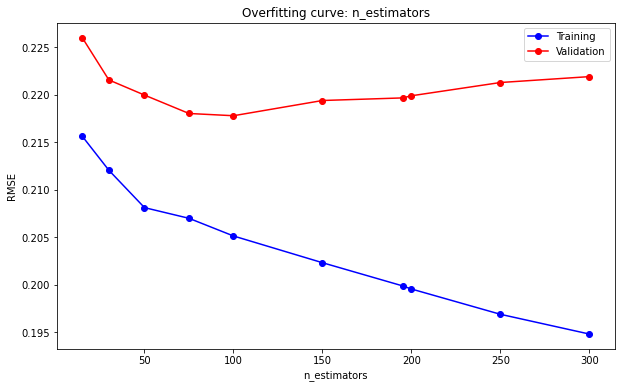

In [299]:
%%time 
best_params['n_estimators']  = test_param_and_plot(XGBClassifier, 'n_estimators', [15, 30, 50, 75, 100, 150, 195, 200, 250, 300], **best_params)

##### Max Depth

{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100, 'max_depth': 1}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100, 'max_depth': 2}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100, 'max_depth': 3}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100, 'max_depth': 4}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100, 'max_depth': 5}
3
CPU times: user 1min 27s, sys: 184 ms, total: 1min 27s
Wall time: 45.1 s


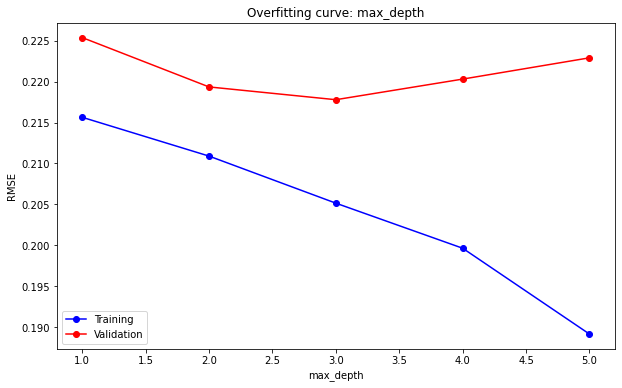

In [300]:
%%time 
best_params['max_depth'] = test_param_and_plot(XGBClassifier, 'max_depth', [ 1, 2, 3, 4, 5 ], **best_params)

##### Learning Rate

{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.001}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.005}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.025}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.08}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.09}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.

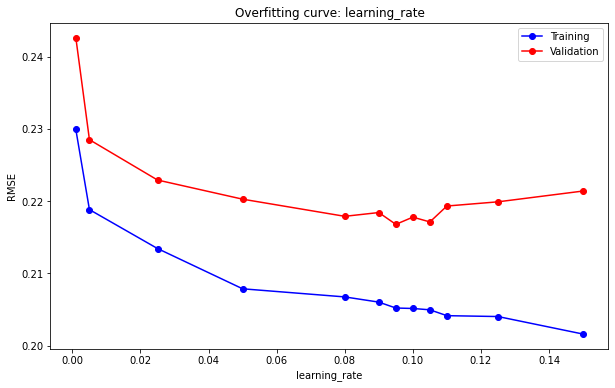

In [301]:
%%time
best_params['learning_rate'] = test_param_and_plot(XGBClassifier, 'learning_rate', [0.001, 0.005, 0.025, 0.05, 0.08, 0.09, 0.095, 0.1, 0.105, 0.110, 0.125, 0.15 ], **best_params)

##### Sub Sample

{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.095, 'subsample': 0.5}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.095, 'subsample': 0.65}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.095, 'subsample': 0.8}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.095, 'subsample': 0.85}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.095, 'subsample': 0.9}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.095, 'subsample': 0.95}
{'random_state': 42, 'n_j

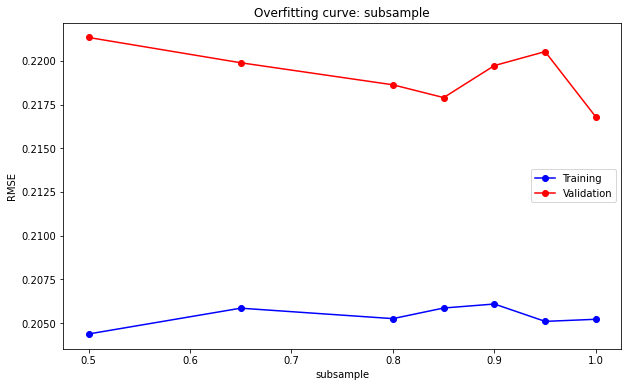

In [302]:
%%time
best_params['subsample'] = test_param_and_plot(XGBClassifier, 'subsample', [ 0.5, 0.65, 0.8 , 0.85, 0.9 , 0.95, 1 ], **best_params)

##### colsample_bytree

{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.095, 'subsample': 1, 'colsample_bytree': 0.5}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.095, 'subsample': 1, 'colsample_bytree': 0.65}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.095, 'subsample': 1, 'colsample_bytree': 0.8}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.095, 'subsample': 1, 'colsample_bytree': 0.85}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.095, 'subsample': 1, 'colsample_bytree': 0.9}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weigh

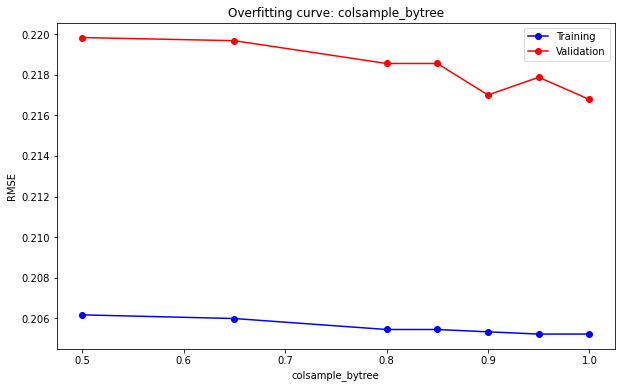

In [303]:
%%time
best_params['colsample_bytree'] = test_param_and_plot(XGBClassifier, 'colsample_bytree', [ 0.5, 0.65, 0.8 , 0.85, 0.9 , 0.95, 1 ], **best_params)

##### gamma

In [ ]:
%%time
best_params['gamma'] = test_param_and_plot(XGBClassifier, 'gamma', [0, 0.5, 0.75, 1, 1.25], **best_params)

{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.095, 'subsample': 1, 'colsample_bytree': 1, 'gamma': 0}
{'random_state': 42, 'n_jobs': -1, 'eval_metric': 'auc', 'scale_pos_weight': 13.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.095, 'subsample': 1, 'colsample_bytree': 1, 'gamma': 0.5}


##### Final Model

In [ ]:
best_params

In [ ]:
model = XGBClassifier(**best_params)

In [ ]:
%%time
model.fit(X_train, y_train)

In [ ]:
# Predictions and plot of confusion matrix from XGB Model on Training dataset
preds_train = predict_and_plot(X_train, y_train, model,'XGB Model on Training dataset')

In [ ]:
# Predictions and plot of confusion matrix from Random Forest Model on Validation dataset
preds_valid = predict_and_plot(X_valid, y_valid, model,'Random Forest Model on Validation dataset')

In [ ]:
make_auc(model, X_valid, y_valid)

In [ ]:
preds_test = model.predict(X_test)

In [ ]:
#Use helper function, submit, to create a file with the predicted target
submit(preds_test, 'XGB_tuned_submission.csv')

##### Feature importance

Just like decision trees and random forests, XGBoost also provides a feature importance score for each column in the input.

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(25), x='importance', y='feature');

## Conclusion

It seems all models performed well enough, but none performed outstandingly well (>80 AUC ratio on test data-set). 

I spent a lot of time working on feature engineering to see if I could improve the AUC ratio of the overall models. I did succeed in improving the AUC ratio for all models except for XBG. It seems that XBG gives a disproportional amount of feature importance to one of the new features and thus lacks the critical information from the other features, reducing the validation AUC ratio.

Ways to improve the models:

1) To improve the results, we could try an auto tuner for doing the hyper parameter tuning for us, although the way we did it should have been enough.

2) We could also try a deep learning algorithm, although I don't think it would help a lot because the data we were provided with, is structured data, and deep learning algorithms work best with unstructured data.

3) Additionally, we could try to improve even further our feature engineering.

4) Finally, the more reasonable approach would be to try and find better data since this data-set had a lot of class imbalance and other issues. We could even try to build a generative model to create synthetic data based on this data-set to improve our results. 

In conclusion, machine Learning is an iterative process. We need to try a lot of different thinks to get better results. I could try all of the above, but I run out of time for this project, maybe in the next one.


In [ ]:
jovian.commit()